# СБОР ДАННЫХ ЧЕРЕЗ АПИ MOEX

In [1]:
import requests
import pandas as pd
import time

попробовал на 50 акциях

In [7]:
def get_moex_stock_data(ticker, start_date, end_date):
    base_url = f"https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/TQBR/securities/{ticker}.json"
    all_data = []

    params = {
        'from': start_date,
        'till': end_date,
        'start': 0
    }

    while True:
        response = requests.get(base_url, params=params)
        data = response.json()

        if 'history' not in data or not data['history']['data']:
            break

        all_data.extend(data['history']['data'])
        params['start'] += 100
        time.sleep(0.7)

    columns = data['history']['columns']
    df = pd.DataFrame(all_data, columns=columns)

    df = df[['TRADEDATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']]
    df['TRADEDATE'] = pd.to_datetime(df['TRADEDATE'])
    df['TICKER'] = ticker
    return df

def load_multiple_stocks(tickers, start_date, end_date):
    all_stocks_data = pd.DataFrame()

    for ticker in tickers:
        print(f"Загружаю данные для {ticker}...")
        stock_data = get_moex_stock_data(ticker, start_date, end_date)
        all_stocks_data = pd.concat([all_stocks_data, stock_data], ignore_index=True)
        time.sleep(1.5)

    return all_stocks_data

tickers = [
    "GAZP", "SBER", "LKOH", "ROSN", "NVTK", "TATN", "GMKN", "VTBR",
    "ALRS", "MAGN", "CHMF", "MTSS", "SNGS", "YNDX", "AFLT", "RTKM",
    "MOEX", "PLZL", "RUAL", "PHOR", "TRNFP", "PIKK", "DSKY", "IRAO",
    "HYDR", "FEES", "MRKU", "TGKA", "UPRO", "FIVE", "MVID", "LSRG",
    "OGKB", "MRKC", "SIBN", "MSTT", "RNFT", "ENRU", "UTII", "MSNG",
    "RSTI", "KAZT", "RASP", "KBTK", "BSPB", "TGKB", "LSNG", "DVEC",
    "NKNC", "CHEP", "NMTP"
]

start_date = "2024-01-01"
end_date = "2024-10-31"

df_all = load_multiple_stocks(tickers, start_date, end_date)

df_all.to_csv("moex_top50_data.csv", index=False)
print("Данные успешно сохранены в файл moex_top50_data.csv")


Загружаю данные для GAZP...
Загружаю данные для SBER...
Загружаю данные для LKOH...
Загружаю данные для ROSN...
Загружаю данные для NVTK...
Загружаю данные для TATN...
Загружаю данные для GMKN...
Загружаю данные для VTBR...
Загружаю данные для ALRS...
Загружаю данные для MAGN...
Загружаю данные для CHMF...
Загружаю данные для MTSS...
Загружаю данные для SNGS...
Загружаю данные для YNDX...
Загружаю данные для AFLT...
Загружаю данные для RTKM...
Загружаю данные для MOEX...
Загружаю данные для PLZL...
Загружаю данные для RUAL...
Загружаю данные для PHOR...
Загружаю данные для TRNFP...
Загружаю данные для PIKK...
Загружаю данные для DSKY...
Загружаю данные для IRAO...
Загружаю данные для HYDR...
Загружаю данные для FEES...
Загружаю данные для MRKU...
Загружаю данные для TGKA...
Загружаю данные для UPRO...
Загружаю данные для FIVE...
Загружаю данные для MVID...
Загружаю данные для LSRG...
Загружаю данные для OGKB...
Загружаю данные для MRKC...
Загружаю данные для SIBN...
Загружаю данные для

<ipython-input-7-dc1c45a98604>:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_stocks_data = pd.concat([all_stocks_data, stock_data], ignore_index=True)


Загружаю данные для UTII...


<ipython-input-7-dc1c45a98604>:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_stocks_data = pd.concat([all_stocks_data, stock_data], ignore_index=True)


Загружаю данные для MSNG...
Загружаю данные для RSTI...


<ipython-input-7-dc1c45a98604>:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_stocks_data = pd.concat([all_stocks_data, stock_data], ignore_index=True)


Загружаю данные для KAZT...
Загружаю данные для RASP...
Загружаю данные для KBTK...


<ipython-input-7-dc1c45a98604>:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_stocks_data = pd.concat([all_stocks_data, stock_data], ignore_index=True)


Загружаю данные для BSPB...
Загружаю данные для TGKB...
Загружаю данные для LSNG...
Загружаю данные для DVEC...
Загружаю данные для NKNC...
Загружаю данные для CHEP...


<ipython-input-7-dc1c45a98604>:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_stocks_data = pd.concat([all_stocks_data, stock_data], ignore_index=True)


Загружаю данные для NMTP...
Данные успешно сохранены в файл moex_top50_data.csv


решил собрать все 253 тикера

In [8]:
import requests
import pandas as pd
import time

def get_moex_stock_data(ticker, start_date, end_date):
    base_url = f"https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/TQBR/securities/{ticker}.json"
    all_data = []

    params = {
        'from': start_date,
        'till': end_date,
        'start': 0
    }

    while True:
        response = requests.get(base_url, params=params)
        data = response.json()

        if 'history' not in data or not data['history']['data']:
            break

        all_data.extend(data['history']['data'])
        params['start'] += 100
        time.sleep(1)

    columns = data['history']['columns']
    df = pd.DataFrame(all_data, columns=columns)


    if not df.empty:
        df = df[['TRADEDATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']]
        df['TRADEDATE'] = pd.to_datetime(df['TRADEDATE'])
        df['TICKER'] = ticker
    return df

def load_large_ticker_list(tickers, start_date, end_date):
    all_data = pd.DataFrame()
    failed_tickers = []

    group_size = 40
    for i in range(0, len(tickers), group_size):
        ticker_group = tickers[i:i + group_size]
        print(f"Загружаю данные для группы тикеров {i+1}-{i+group_size}...")


        for ticker in ticker_group:
            print(f"Загружаю данные для {ticker}...")
            stock_data = get_moex_stock_data(ticker, start_date, end_date)

            if stock_data.empty:
                print(f"Данные для {ticker} не найдены или отсутствуют.")
                failed_tickers.append(ticker)
            else:
                all_data = pd.concat([all_data, stock_data], ignore_index=True)
                time.sleep(3)

        time.sleep(10)
        print(f"Группа {i+1}-{i+group_size} завершена.")

    print("Загрузка завершена.")
    if failed_tickers:
        print("Для следующих тикеров данные не были найдены:", ", ".join(failed_tickers))

    return all_data

tickers = [
    "SBER", "SBERP", "ROSN", "LKOH", "SIBN", "NVTK", "GAZP", "GMKN", "PLZL", "TATN",
    "TATNP", "YDEX", "SNGS", "SNGSP", "CHMF", "NLMK", "GAZT", "OZON", "FIVE", "PHOR",
    "IRKT", "MGNT", "MAGN", "AKRN", "RUAL", "MOEX", "PIKK", "TCSG", "VTBR", "MTSS",
    "ALRS", "BANE", "BANEP", "UNAC", "IRAO", "VSMO", "SVCB", "RTKM", "RTKMP", "HYDR",
    "FLOT", "ENPG", "HHRU", "CBOM", "AFLT", "TRNFP", "AFKS", "FEES", "FESH", "POSI",
    "GCHE", "FIXP", "UGLD", "RASP", "AGRO", "TRMK", "BSPB", "BSPBP", "KZOS", "KZOSP",
    "NMTP", "GAZS", "SMLT", "NKNC", "NKNCP", "LSNG", "LSNGP", "SFIN", "ROSB", "GAZC",
    "LENT", "KAZT", "KAZTP", "RGSS", "MGTS", "MGTSP", "UTAR", "UPRO", "POLY", "ASTR",
    "LEAS", "KUBE", "VKCO", "MSNG", "GLTR", "MTLR", "MTLRP", "KMAZ", "VSEH", "APTK",
    "ELMT", "PRMD", "BELU", "LSRG", "VJGZ", "VJGZP", "AQUA", "USBN", "MBNK", "YAKG",
    "MDMG", "INGR", "GEMC", "AVAN", "SELG", "NKHP", "MSRS", "VEON-RX", "MRKS", "CIAN",
    "DIAS", "RNFT", "DELI", "OGKB", "RENI", "MSTT", "MFGS", "MFGSP", "UKUZ", "SOFL",
    "DVEC", "OMZZP", "MRKK", "TNSE", "KCHE", "KCHEP", "RKKE", "MRKU", "AMEZ", "SGZH",
    "MRKP", "RTSB", "RTSBP", "VRSB", "VRSBP", "VSYD", "VSYDP", "ETLN", "TGKA", "WUSH",
    "HNFG", "MVID", "SVAV", "ROLO", "BLNG", "IVAT", "JNOS", "JNOSP", "ABRD", "CHMK",
    "KROT", "KROTP", "GTRK", "ELFV", "NNSB", "NNSBP", "MRKC", "WTCM", "WTCMP", "EUTR",
    "SPBE", "ZAYM", "TTLK", "YRSB", "YRSBP", "TGKB", "TGKBP", "LNZL", "LNZLP", "BRZL",
    "URKZ", "CHKZ", "TGKN", "QIWI", "SAGO", "SAGOP", "MRKV", "KRSB", "KRSBP", "KOGK",
    "PMSB", "PMSBP", "MRKY", "KRKN", "KRKNP", "RUSI", "IGST", "IGSTP", "EELT", "ZILL",
    "MISB", "MISBP", "PRMB", "ABIO", "KBSB", "MRKZ", "RZSB", "OKEY", "NSVZ", "KGKC",
    "KGKCP", "HIMCP", "RBCM", "NAUK", "YKEN", "YKENP", "KLVZ", "VGSB", "VGSBP", "KMEZ",
    "SLEN", "ZVEZ", "CARM", "RTGZ", "RDRB", "PRFN", "NKSH", "STSB", "STSBP", "UNKL",
    "TORS", "TORSP", "MGKL", "SARE", "SAREP", "CHGZ", "TASB", "TASBP", "MGNZ", "GECO",
    "NFAZ", "CNTL", "CNTLP", "ROST", "MAGE", "MAGEP", "KLSB", "GEMA", "LVHK", "ASSB",
    "TUZA", "ACKO", "ARSA", "DZRD", "DZRDP", "DIOD", "VLHZ", "MRSB", "KUZB", "KRKOP",
    "SVET", "SVETP", "BISVP"
]

start_date = "2023-10-30"
end_date = "2024-10-30"

df_all = load_large_ticker_list(tickers, start_date, end_date)

df_all.to_csv("moex_all_last_year.csv", index=False)
print("Данные сохранены в moex_all_last_year.csv")


Загружаю данные для группы тикеров 1-40...
Загружаю данные для SBER...
Загружаю данные для SBERP...
Загружаю данные для ROSN...
Загружаю данные для LKOH...
Загружаю данные для SIBN...
Загружаю данные для NVTK...
Загружаю данные для GAZP...
Загружаю данные для GMKN...
Загружаю данные для PLZL...
Загружаю данные для TATN...
Загружаю данные для TATNP...
Загружаю данные для YDEX...
Загружаю данные для SNGS...
Загружаю данные для SNGSP...
Загружаю данные для CHMF...
Загружаю данные для NLMK...
Загружаю данные для GAZT...
Загружаю данные для OZON...
Загружаю данные для FIVE...
Загружаю данные для PHOR...
Загружаю данные для IRKT...
Загружаю данные для MGNT...
Загружаю данные для MAGN...
Загружаю данные для AKRN...
Загружаю данные для RUAL...
Загружаю данные для MOEX...
Загружаю данные для PIKK...
Загружаю данные для TCSG...
Загружаю данные для VTBR...
Загружаю данные для MTSS...
Загружаю данные для ALRS...
Загружаю данные для BANE...
Загружаю данные для BANEP...
Загружаю данные для UNAC...
З

<ipython-input-8-b6a234c5c415>:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat([all_data, stock_data], ignore_index=True)


Загружаю данные для GECO...
Загружаю данные для NFAZ...
Загружаю данные для CNTL...
Загружаю данные для CNTLP...
Загружаю данные для ROST...
Загружаю данные для MAGE...
Загружаю данные для MAGEP...
Загружаю данные для KLSB...
Загружаю данные для GEMA...
Загружаю данные для LVHK...
Загружаю данные для ASSB...
Группа 201-240 завершена.
Загружаю данные для группы тикеров 241-280...
Загружаю данные для TUZA...
Загружаю данные для ACKO...


<ipython-input-8-b6a234c5c415>:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat([all_data, stock_data], ignore_index=True)


Загружаю данные для ARSA...
Загружаю данные для DZRD...
Загружаю данные для DZRDP...
Загружаю данные для DIOD...
Загружаю данные для VLHZ...
Загружаю данные для MRSB...
Загружаю данные для KUZB...
Загружаю данные для KRKOP...
Загружаю данные для SVET...
Загружаю данные для SVETP...
Загружаю данные для BISVP...
Группа 241-280 завершена.
Загрузка завершена.
Для следующих тикеров данные не были найдены: VEON
Данные сохранены в moex_all_last_year.csv


пропустил VEON-RX

In [10]:
def get_moex_stock_data(ticker, start_date, end_date):
    base_url = f"https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/TQBR/securities/{ticker}.json"
    all_data = []

    params = {
        'from': start_date,
        'till': end_date,
        'start': 0
    }

    while True:
        response = requests.get(base_url, params=params)
        data = response.json()

        if 'history' not in data or not data['history']['data']:
            break

        all_data.extend(data['history']['data'])
        params['start'] += 100
        time.sleep(1)

    columns = data['history']['columns']
    df = pd.DataFrame(all_data, columns=columns)

    if not df.empty:
        df = df[['TRADEDATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']]
        df['TRADEDATE'] = pd.to_datetime(df['TRADEDATE'])
        df['TICKER'] = ticker
    return df

ticker = "VEON-RX"
start_date = "2024-01-01"
end_date = "2024-10-31"

veon_data = get_moex_stock_data(ticker, start_date, end_date)

if veon_data.empty:
    print(f"Данные для {ticker} не найдены.")
else:
    existing_data = pd.read_csv("moex_all_last_year.csv")

    updated_data = pd.concat([existing_data, veon_data], ignore_index=True)

    updated_data.to_csv("moex_all_last_year.csv", index=False)
    print("Данные для VEON-RX успешно добавлены в файл moex_all_last_year.csv")


Данные для VEON-RX успешно добавлены в файл moex_all_last_year.csv



# EDA
---



In [147]:
file_url = "https://drive.google.com/uc?id=1Rn3-XWfgK-fs7-8G2HM9bkLQ9utTA4wJ"

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = pd.read_csv(file_url)

### 1. Изучение структуры данных.

**1.1 Проверка структуры данных**



In [43]:
data.head()

TRADEDATE    OPEN    HIGH     LOW   CLOSE    VOLUME TICKER
0  2023-10-30  269.90  271.55  268.60  269.89  33345990   SBER
1  2023-10-31  270.00  270.50  266.87  268.35  26210450   SBER
2  2023-11-01  268.29  270.30  267.60  269.68  20609480   SBER
3  2023-11-02  270.00  270.98  268.50  269.06  25751530   SBER
4  2023-11-03  269.07  269.78  267.20  268.54  20981280   SBER

данные содержат ожидаемые столбцы — TRADEDATE, OPEN, HIGH, LOW, CLOSE, VOLUME, TICKER.

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63082 entries, 0 to 63081
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TRADEDATE  63082 non-null  object 
 1   OPEN       61427 non-null  float64
 2   HIGH       61427 non-null  float64
 3   LOW        61427 non-null  float64
 4   CLOSE      61427 non-null  float64
 5   VOLUME     63082 non-null  int64  
 6   TICKER     63082 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 3.4+ MB


In [30]:
data.describe()

OPEN           HIGH            LOW          CLOSE  \
count   61427.000000   61427.000000   61427.000000   61427.000000   
mean     2343.490049    2381.416982    2302.517633    2336.842483   
std      8156.296722    8257.001680    8048.401108    8143.095545   
min         0.006682       0.006802       0.006602       0.006682   
25%        12.020000      12.300000      11.735000      11.975000   
50%       133.000000     135.100000     130.200000     132.400000   
75%       844.450000     856.850000     827.700000     841.550000   
max    167000.000000  167950.000000  165550.000000  166850.000000   

             VOLUME  
count  6.308200e+04  
mean   4.021137e+08  
std    6.657310e+09  
min    0.000000e+00  
25%    1.430000e+04  
50%    2.337540e+05  
75%    2.736122e+06  
max    4.615482e+11

**1.2 Проверка частоты данных**

In [149]:
data['TRADEDATE'] = pd.to_datetime(data['TRADEDATE'], errors='coerce')

date_counts = data['TRADEDATE'].value_counts().sort_index()
print("Распределение данных по датам:\n", date_counts)

Распределение данных по датам:
 TRADEDATE
2023-10-30    235
2023-10-31    235
2023-11-01    235
2023-11-02    236
2023-11-03    236
             ... 
2024-10-24    247
2024-10-25    247
2024-10-28    247
2024-10-29    247
2024-10-30    247
Name: count, Length: 257, dtype: int64


Данные имеют дневной таймфрейм

**1.3 Анализ пропусков**

Проверяем, есть ли пропуски, их количество и доля от общего числа записей.

In [150]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
print("Пропуски в данных:\n", missing_values[missing_values > 0])
print("Процент пропусков:\n", missing_percentage[missing_percentage > 0])

data.dropna(subset=['TRADEDATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME'], inplace=True)


Пропуски в данных:
 TRADEDATE     213
OPEN         1655
HIGH         1655
LOW          1655
CLOSE        1655
dtype: int64
Процент пропусков:
 TRADEDATE    0.337656
OPEN         2.623569
HIGH         2.623569
LOW          2.623569
CLOSE        2.623569
dtype: float64


На основе представленных данных о пропусках можно сделать следующие выводы:

- В столбце TRADEDATE наблюдается 213 пропусков, что соответствует 33.76% от - общего объёма данных.
- В столбцах OPEN, HIGH, LOW, и CLOSE по 1655 пропусков в каждом, что составляет около 2.62% от общего объёма данных.
- Пропуски в дате (TRADEDATE): Высокий процент пропусков в столбце с датами может существенно повлиять на анализ временных рядов. Без данных о датах невозможно корректно ресемплировать или агрегировать данные по времени, что делает этот столбец критически важным для анализа.
- Пропуски в ценах (OPEN, HIGH, LOW, CLOSE): Хотя процент пропусков в ценовых данных относительно низкий (2.62%), наличие пропусков в этих столбцах может повлиять на точность вычислений, таких как скользящие средние, тренды и другие статистические характеристики.

In [151]:
tickers = data['TICKER'].unique()
print(f"Количество уникальных тикеров: {len(tickers)}")

Количество уникальных тикеров: 250


### 2. Первичная визуализация

**2.1 Визуализация для выявления трендов и сезонности**

<ipython-input-152-4bb11b2c19d2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_tier_data['TRADEDATE'] = pd.to_datetime(first_tier_data['TRADEDATE'])


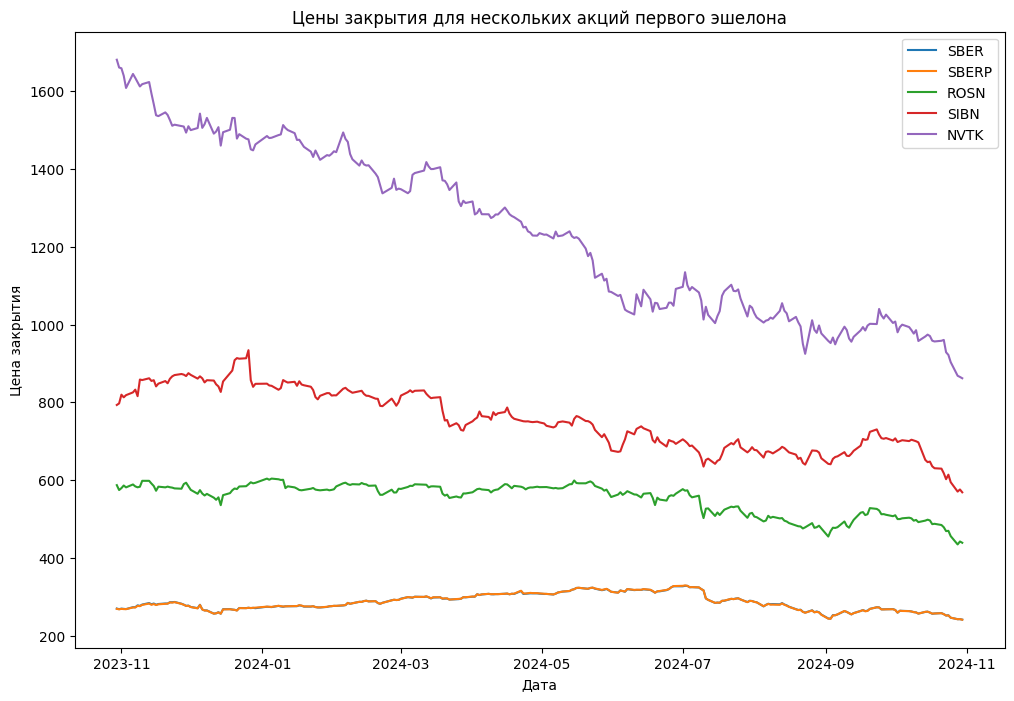

In [152]:
first_tier_tickers = ["SBER", "SBERP", "ROSN",  "SIBN", "NVTK", "LKOH", "GAZP", "GMKN",
                      "PLZL", "TATN", "TATNP", "YDEX", "SNGS", "SNGSP", "CHMF", "NLMK"]

first_tier_data = data[data['TICKER'].isin(first_tier_tickers)]

first_tier_data['TRADEDATE'] = pd.to_datetime(first_tier_data['TRADEDATE'])
first_tier_data.set_index('TRADEDATE', inplace=True)

plt.figure(figsize=(12, 8))
for ticker in first_tier_tickers[:5]:
    ticker_data = first_tier_data[first_tier_data['TICKER'] == ticker]
    plt.plot(ticker_data.index, ticker_data['CLOSE'], label=ticker)
plt.title('Цены закрытия для нескольких акций первого эшелона')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.legend()
plt.show()


Графики цен закрытия позволяют выявить общие тренды и волатильность. Для некоторых акций могут быть выбросы, которые потребуют дальнейшего анализа.

Выберем тикеры из первого эшелона и построим графики для анализа трендов, сезонности и выбросов.

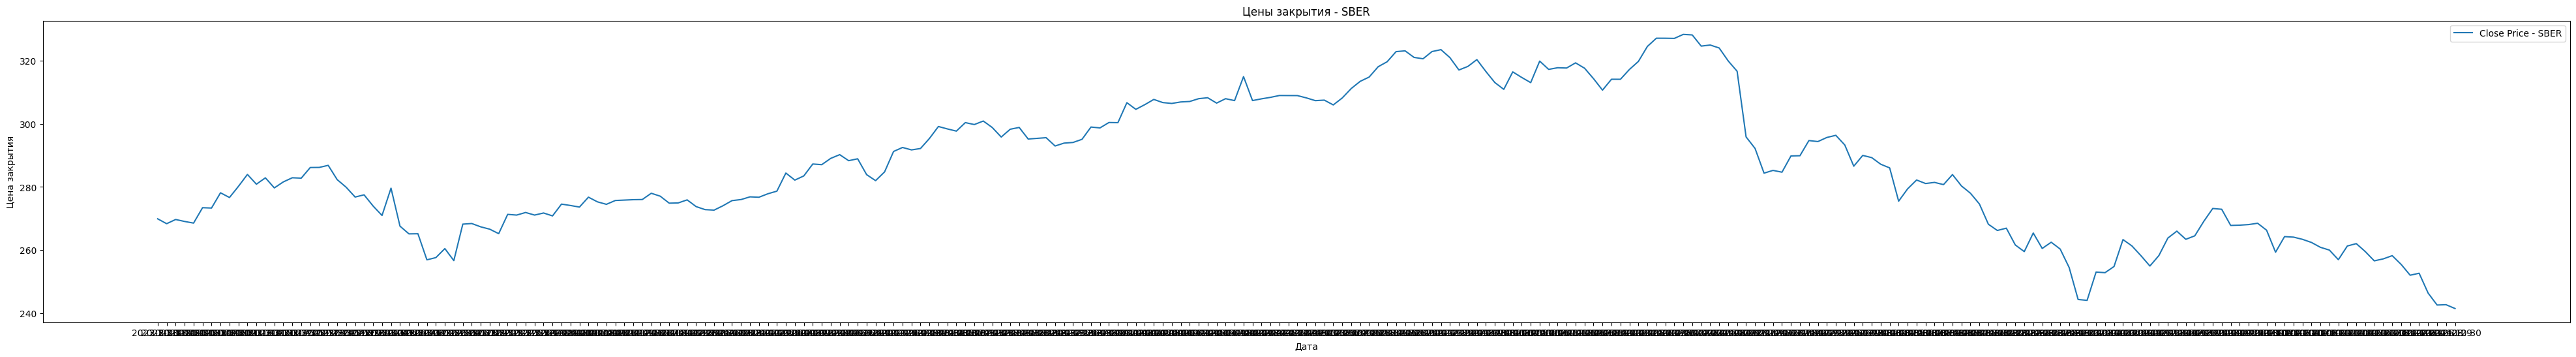

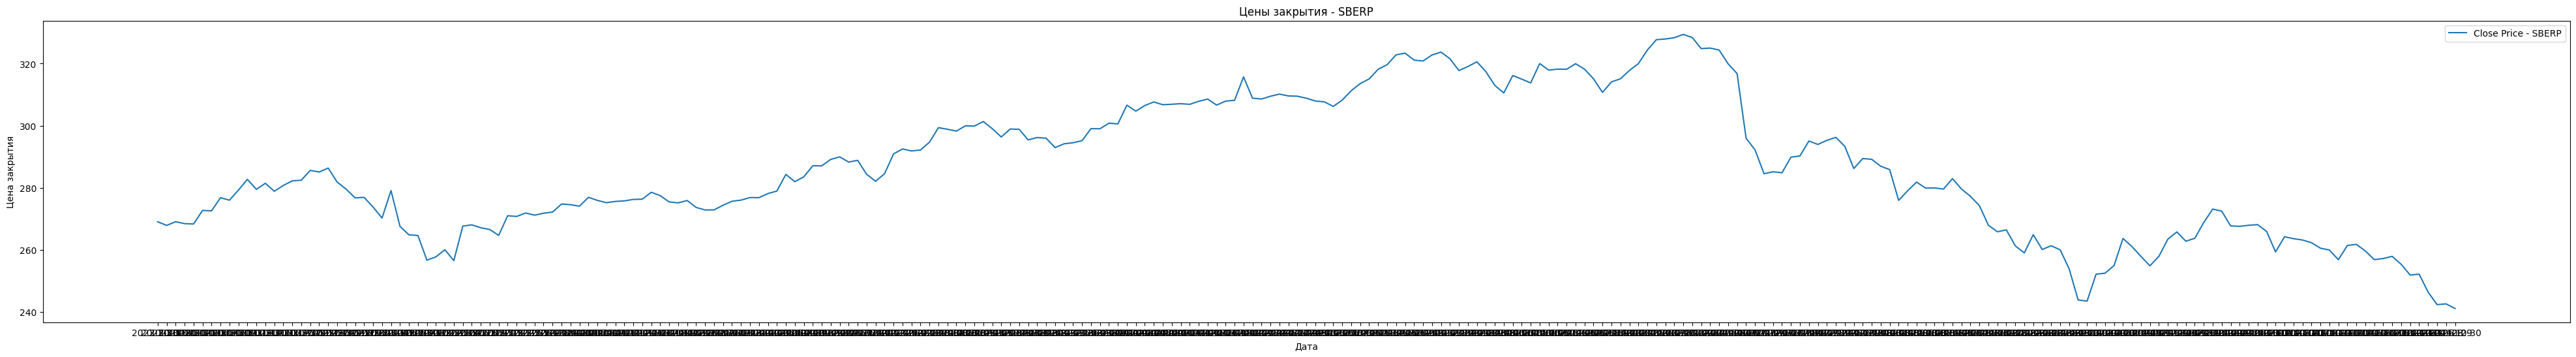

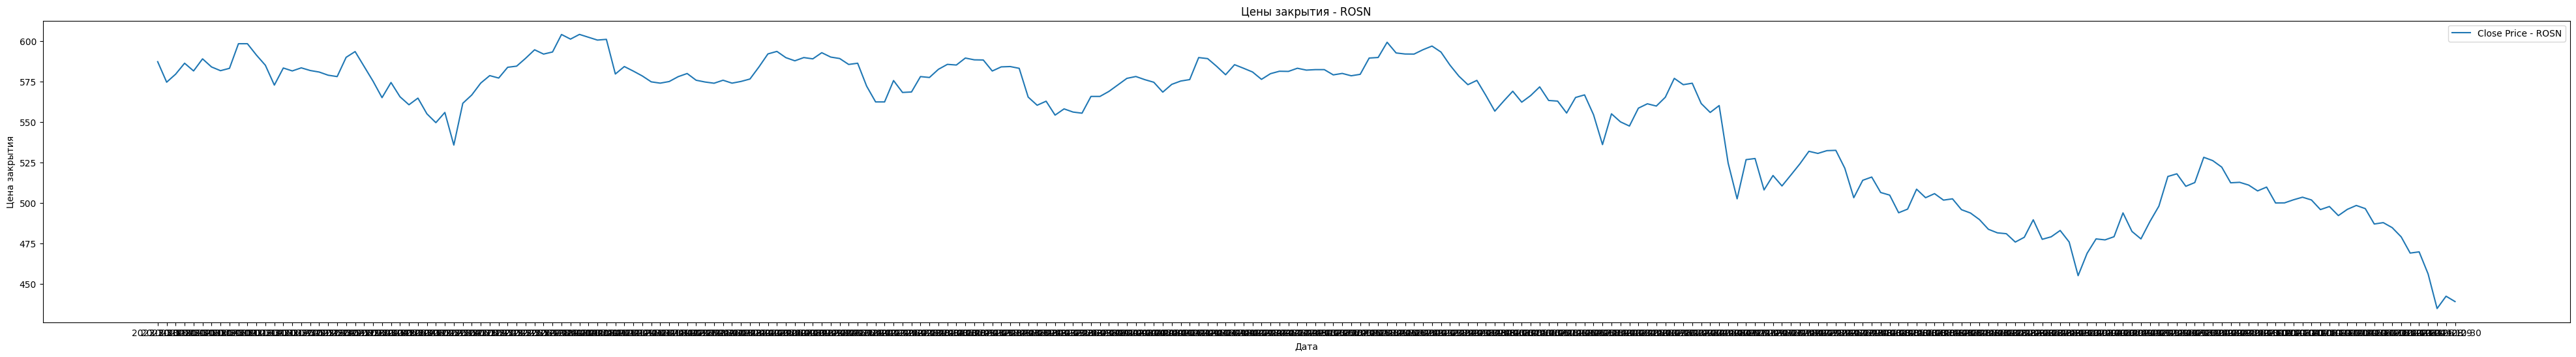

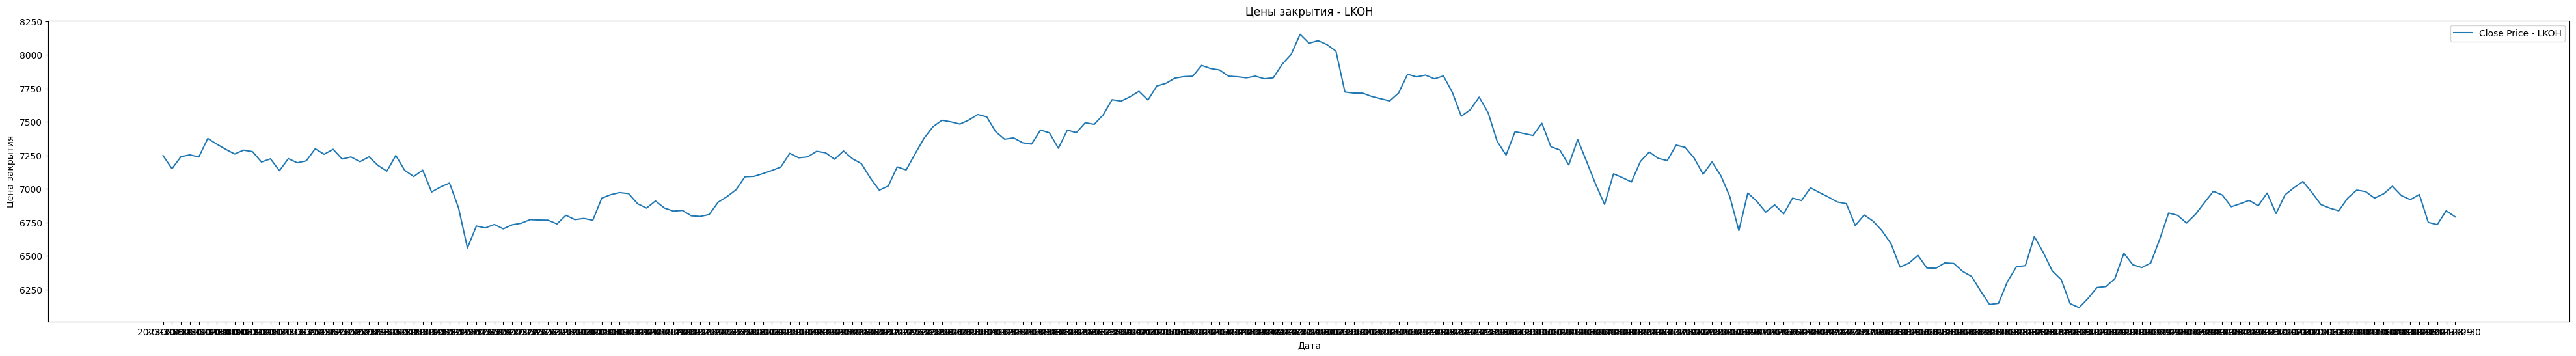

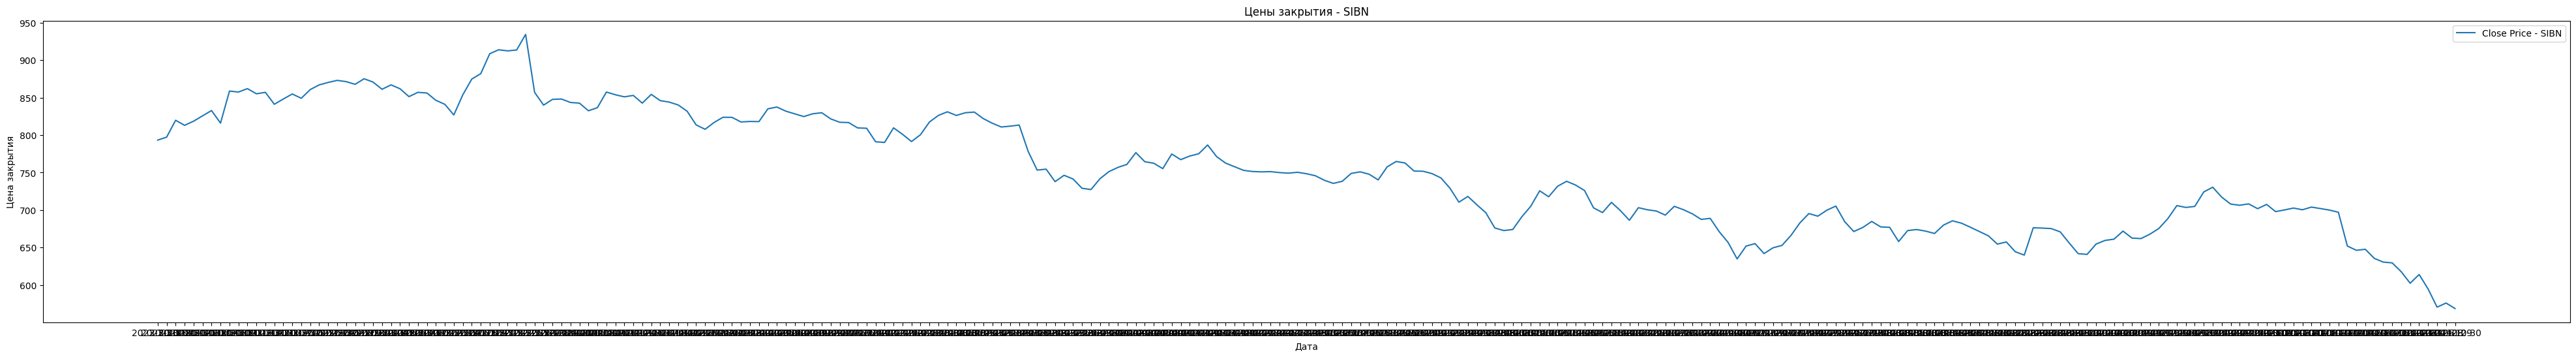

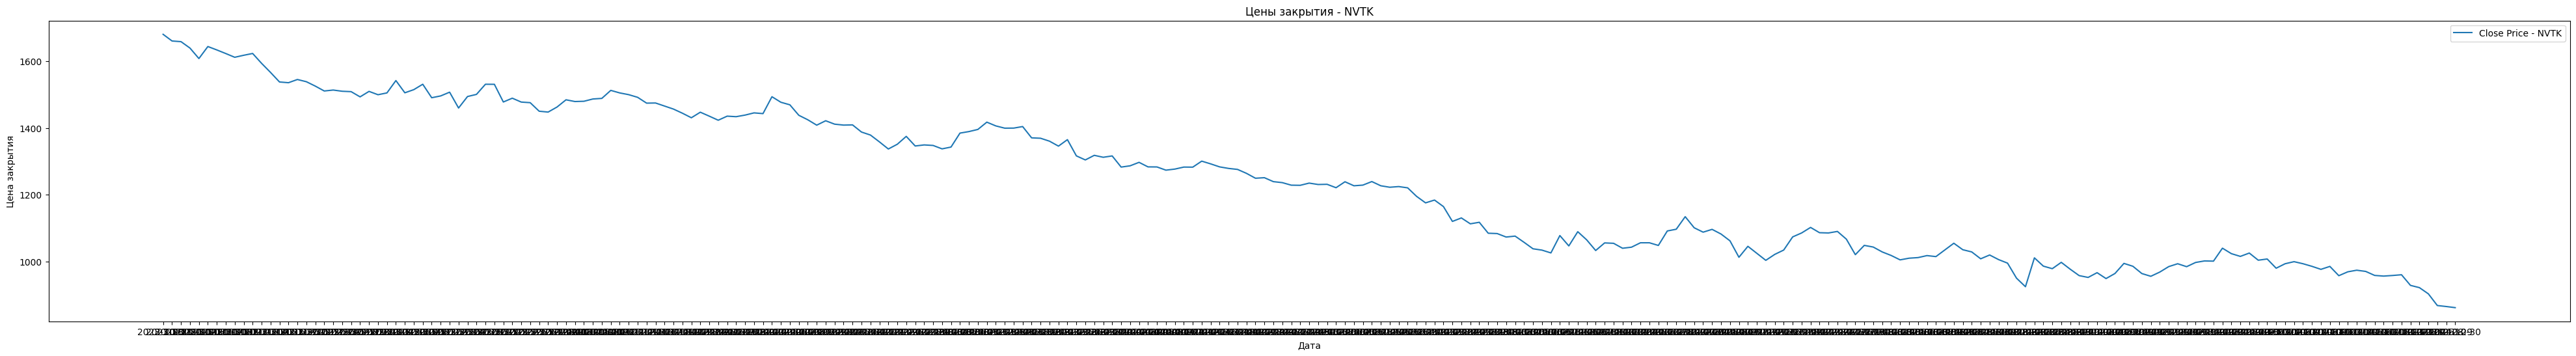

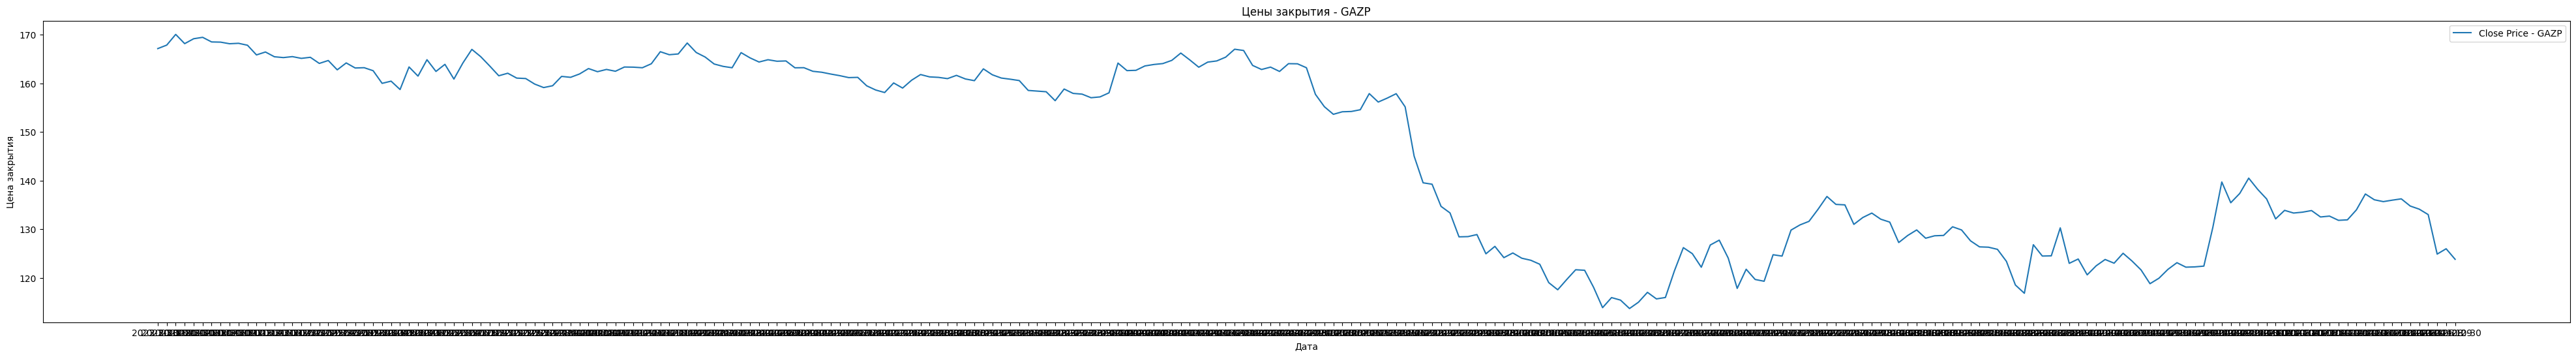

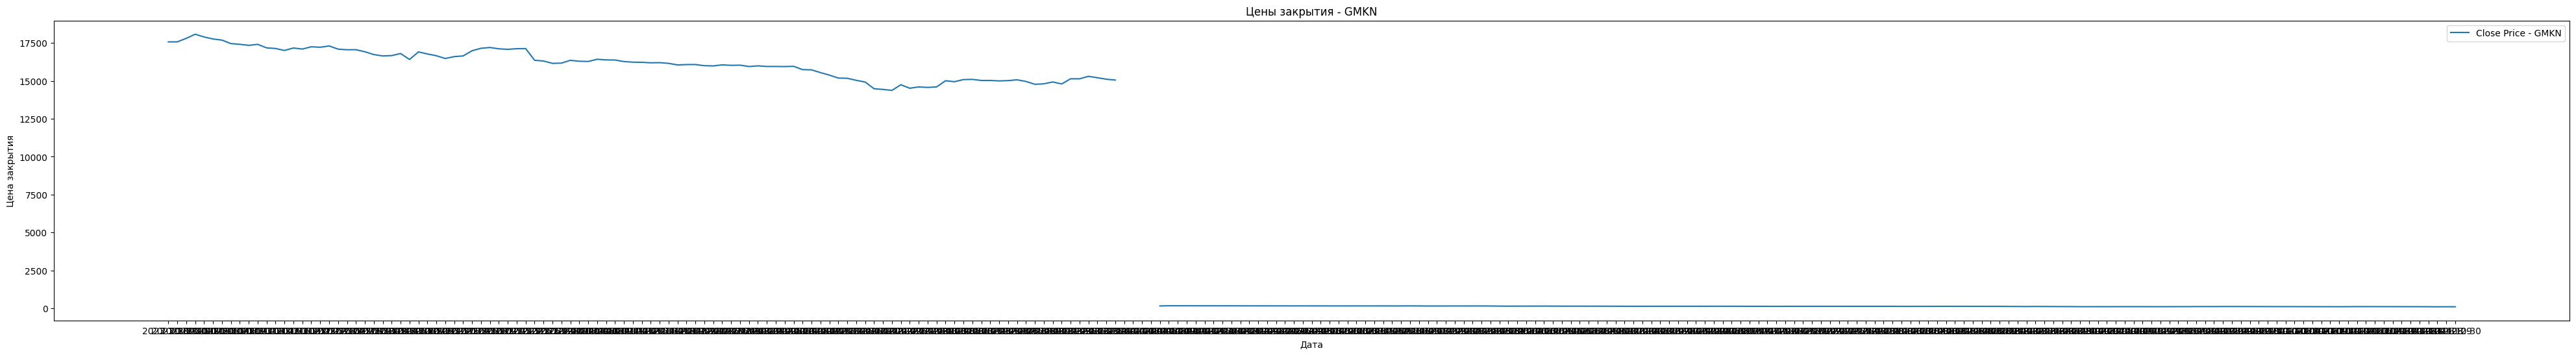

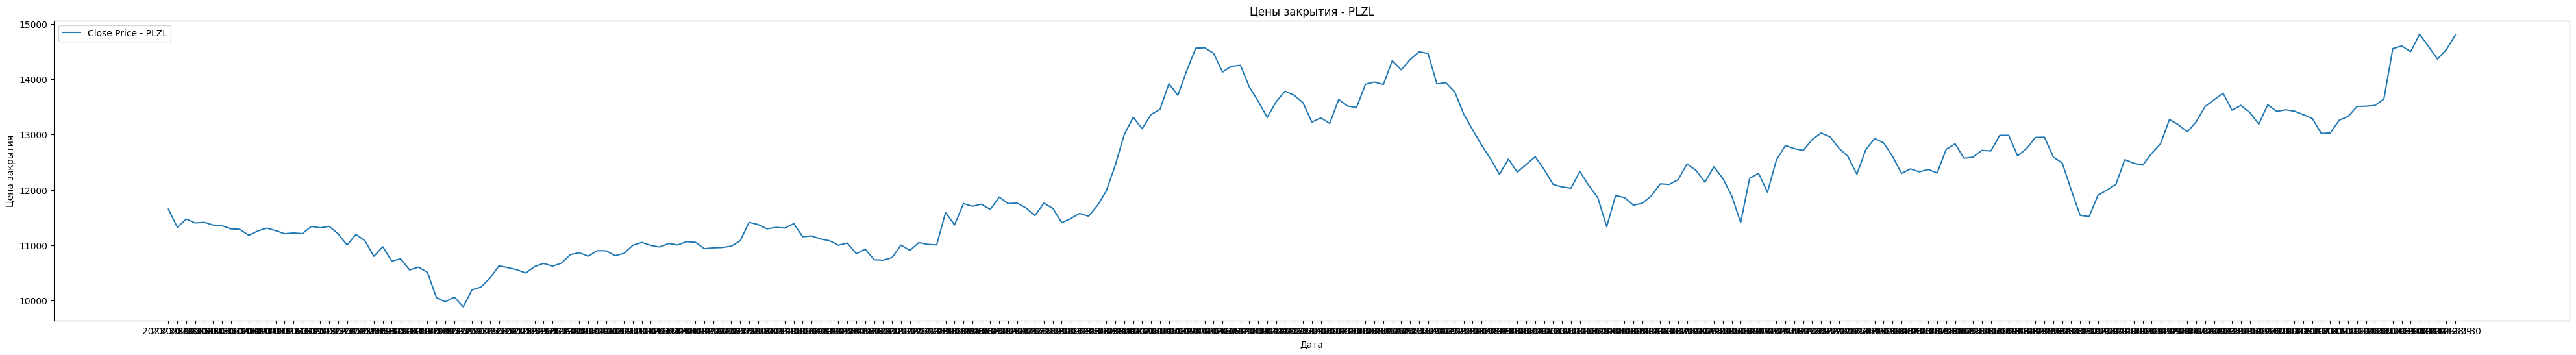

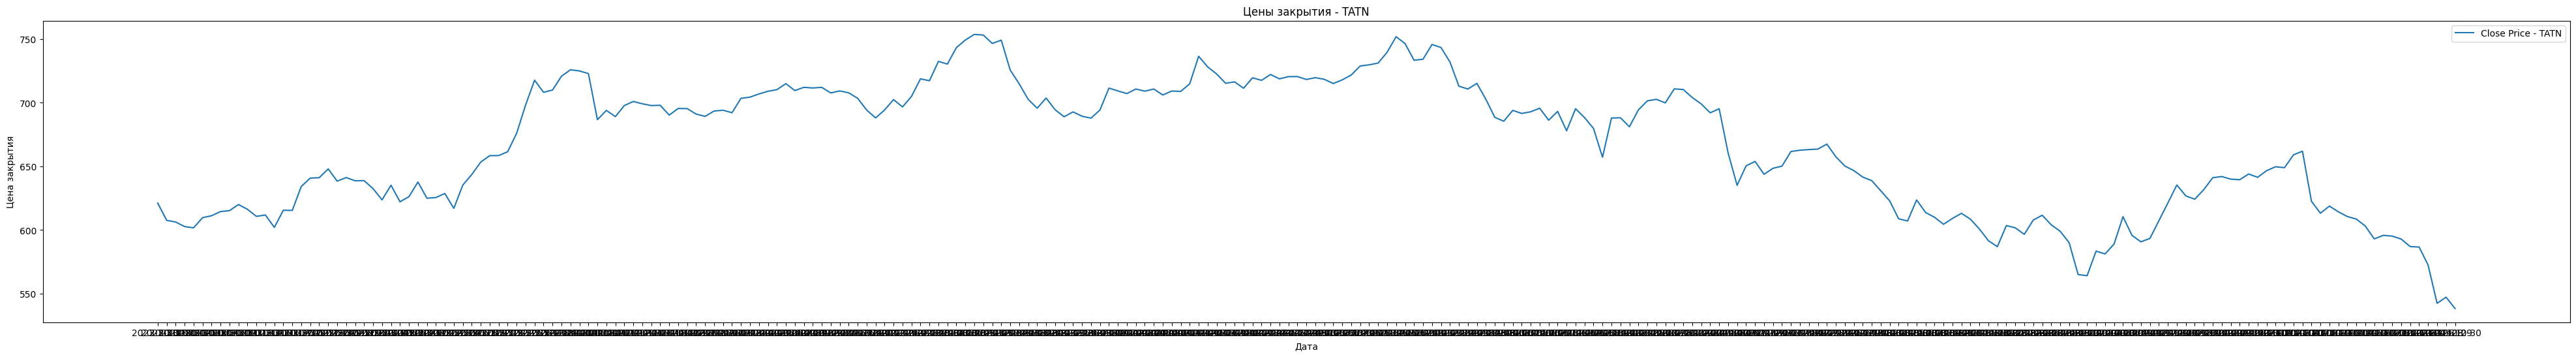

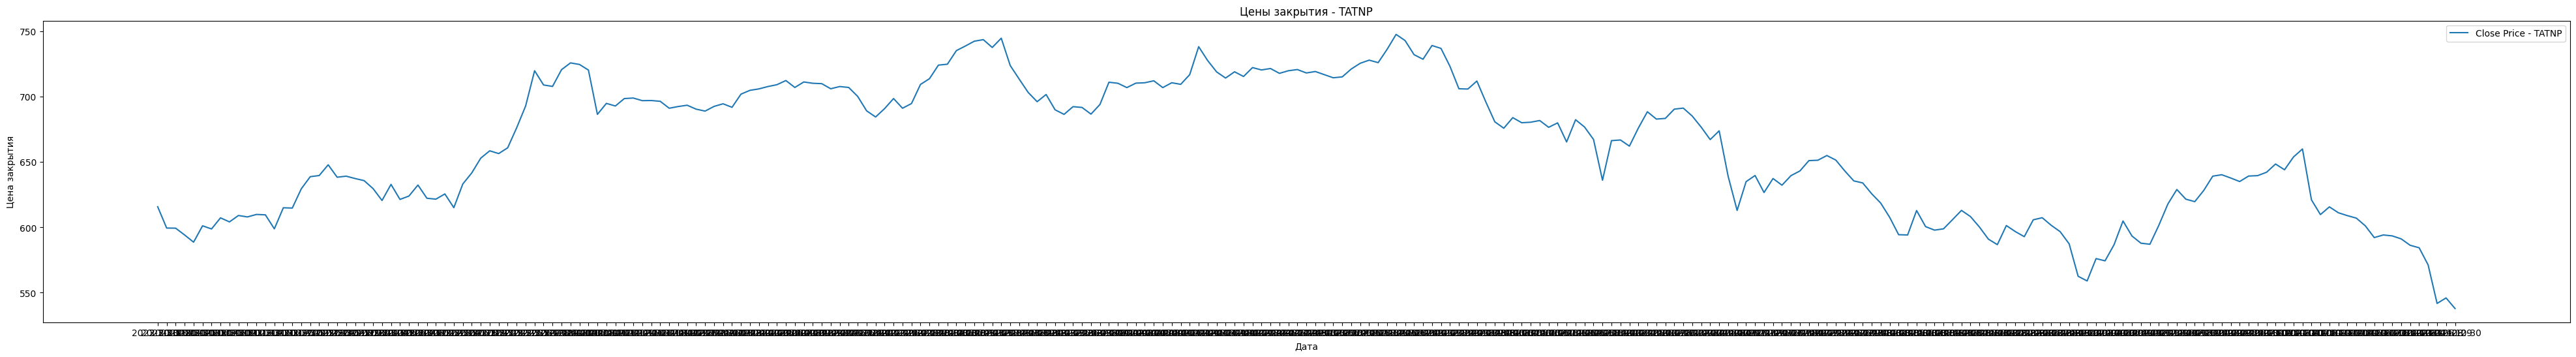

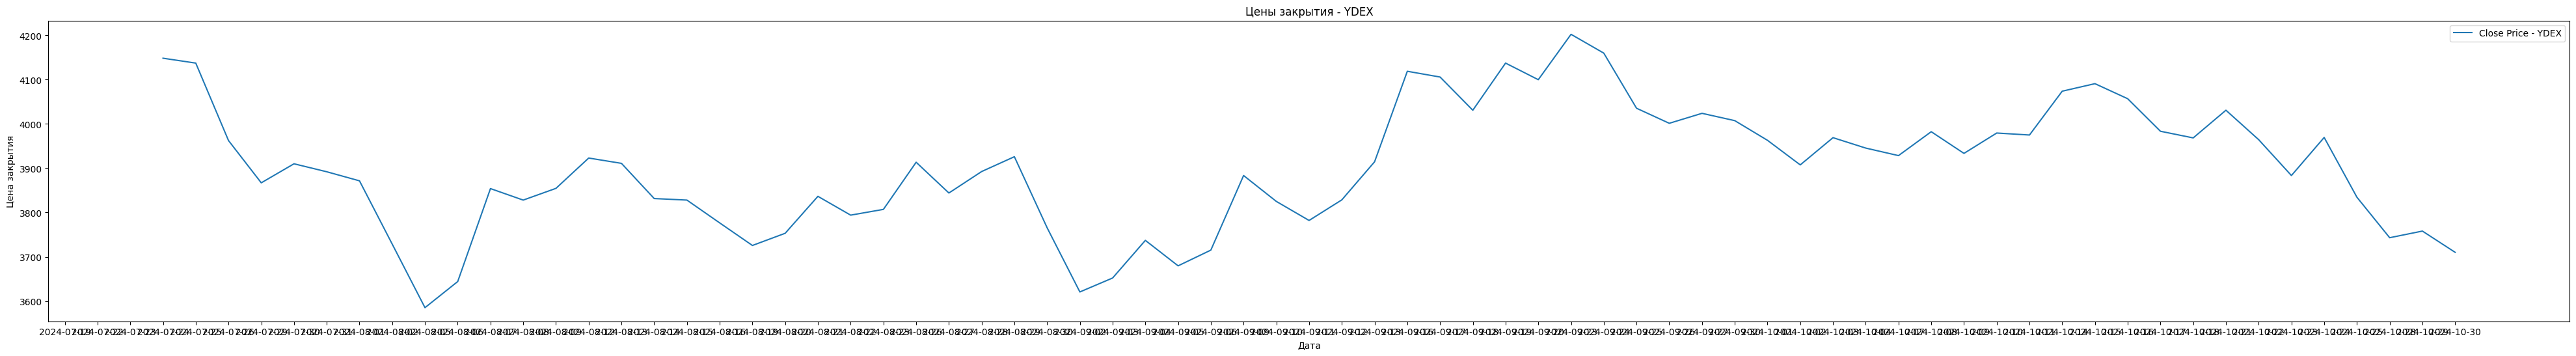

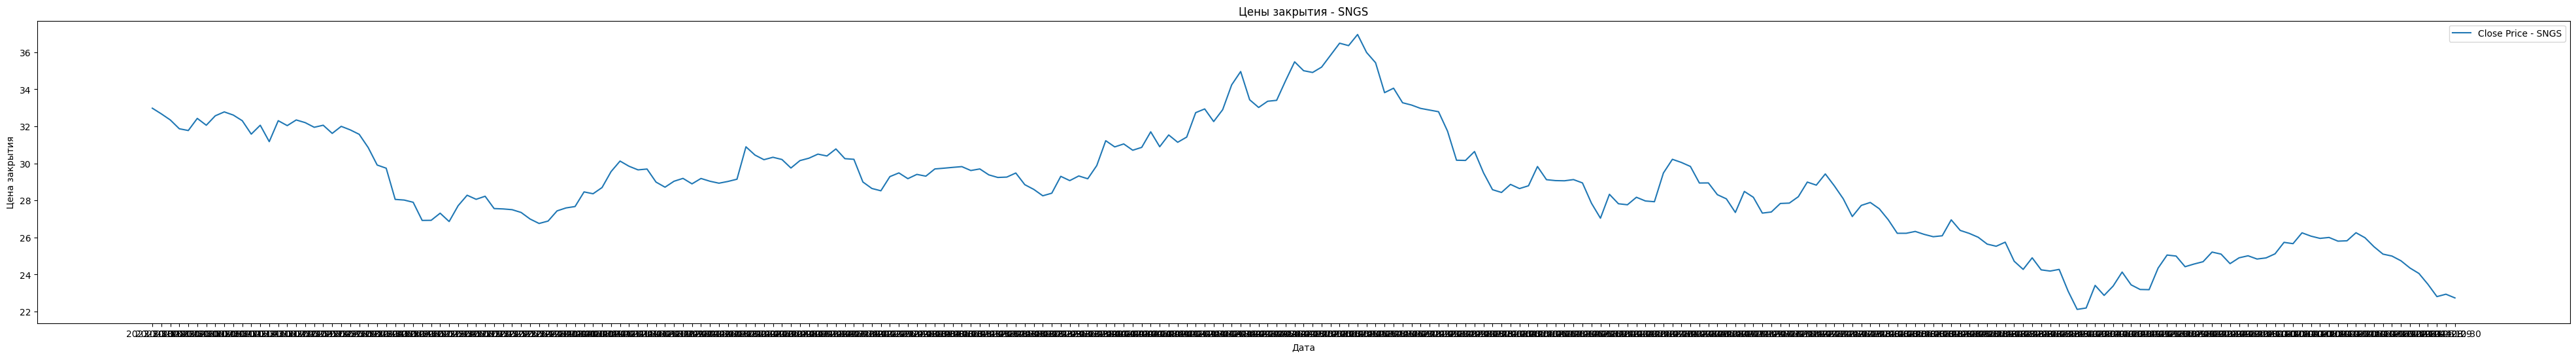

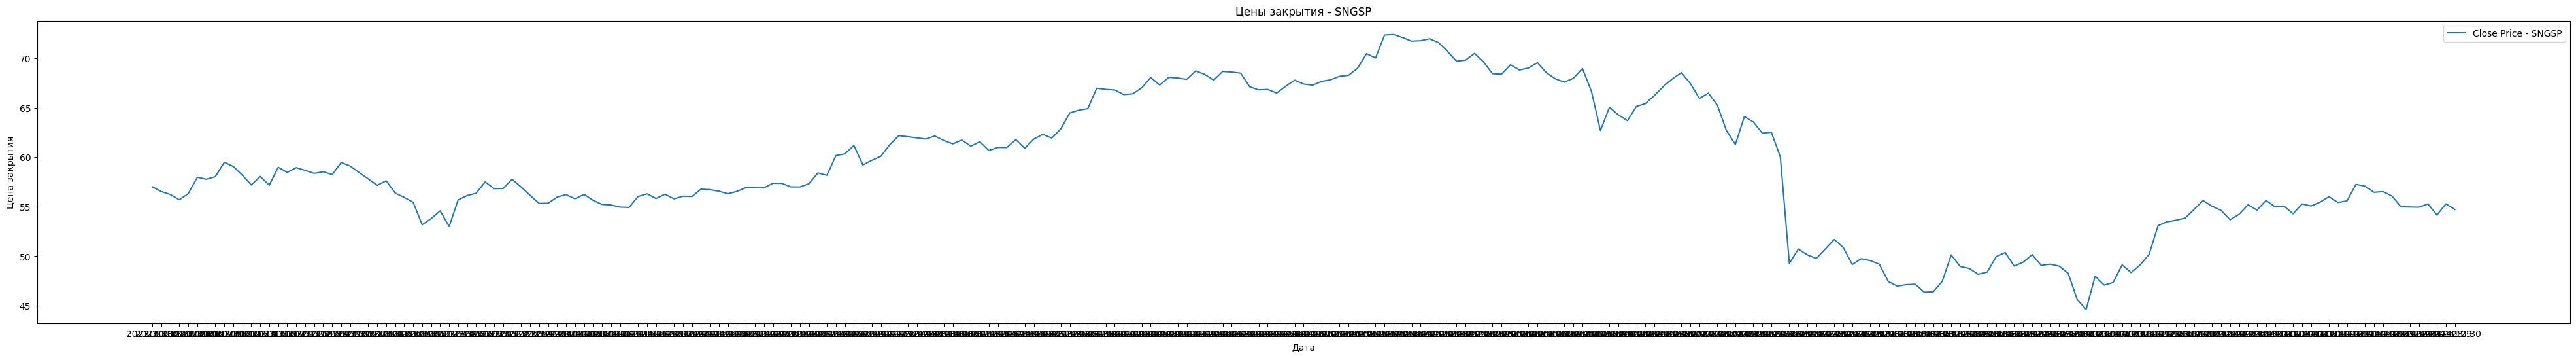

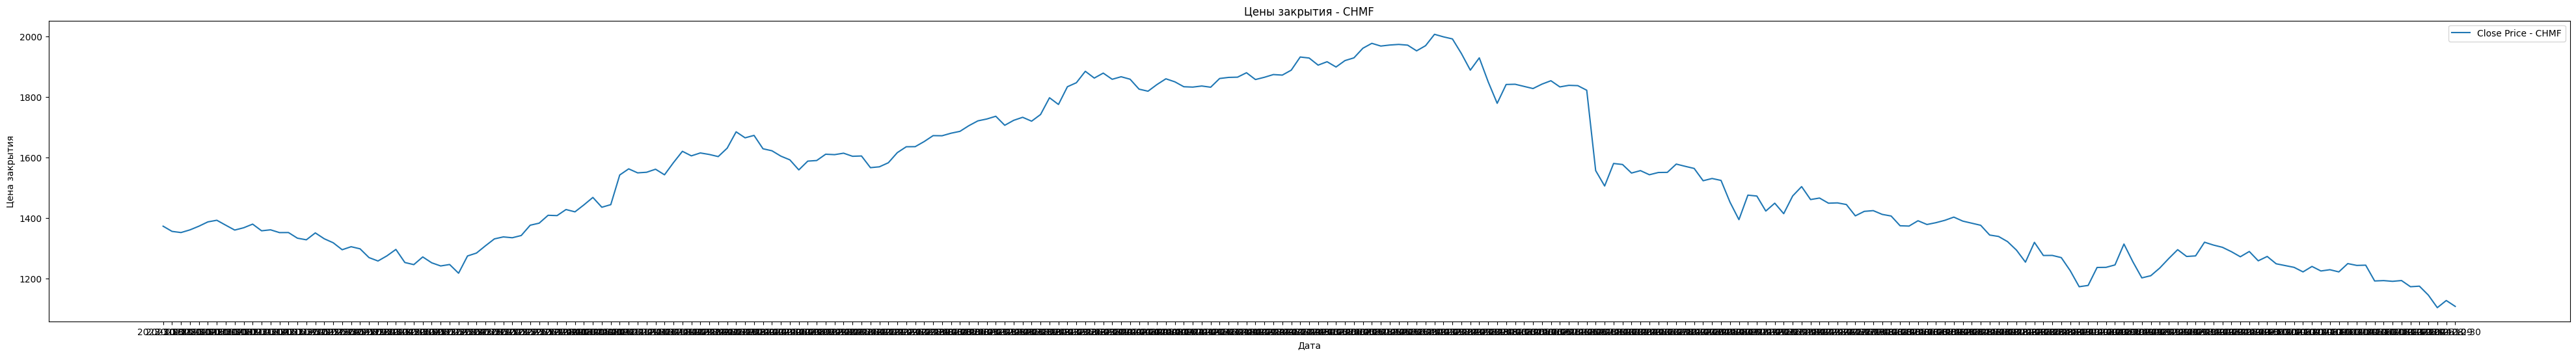

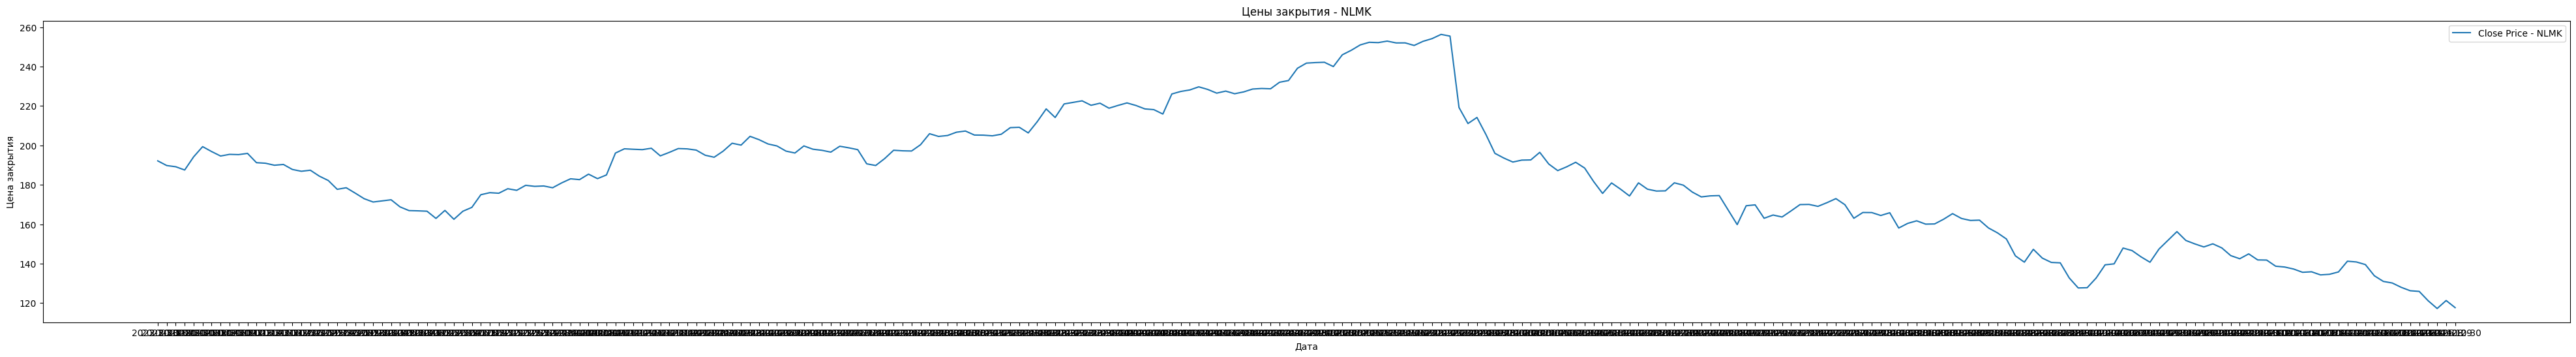

In [92]:
top_tickers = ["SBER", "SBERP", "ROSN", "LKOH", "SIBN", "NVTK", "GAZP", "GMKN", "PLZL", "TATN", "TATNP", "YDEX", "SNGS", "SNGSP", "CHMF", "NLMK"]

for ticker in top_tickers:
    ticker_data = data[data['TICKER'] == ticker]
    plt.figure(figsize=(50, 6))
    plt.plot(ticker_data['TRADEDATE'], ticker_data['CLOSE'], label=f'Close Price - {ticker}')
    plt.title(f'Цены закрытия - {ticker}')
    plt.xlabel('Дата')
    plt.ylabel('Цена закрытия')
    plt.legend()
    plt.show()


Графики дают общее представление о трендах и волатильности цен для акций из первого эшелона. При необходимости, данные можно ресэмплировать.

Общая динамика цен и объемов: графики для нескольких случайных тикеров для оценки трендов, сезонности и выбросов.

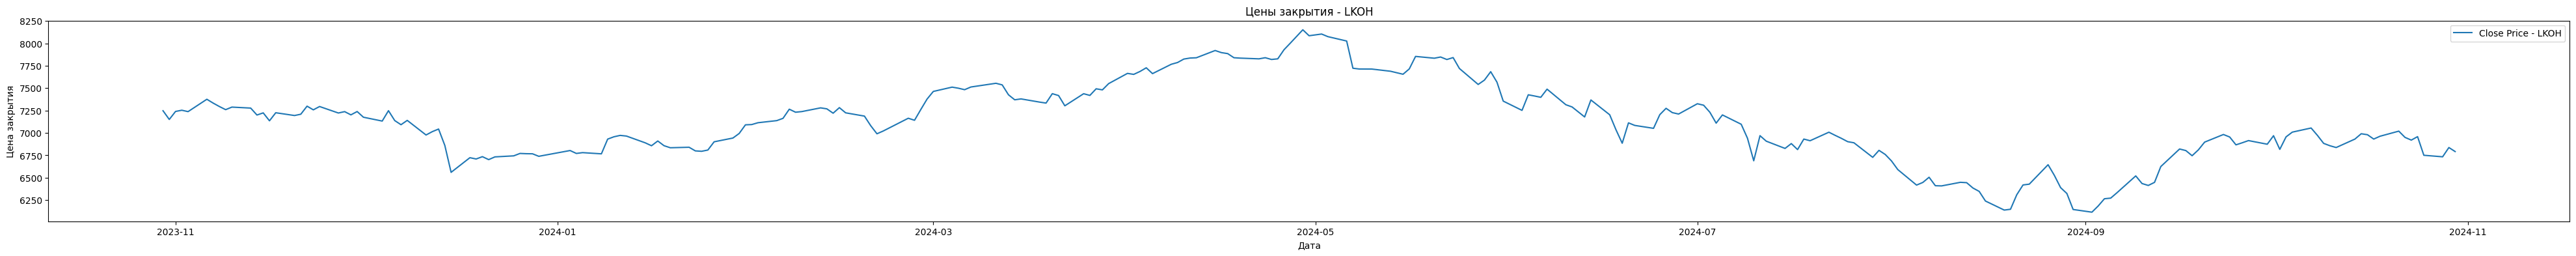

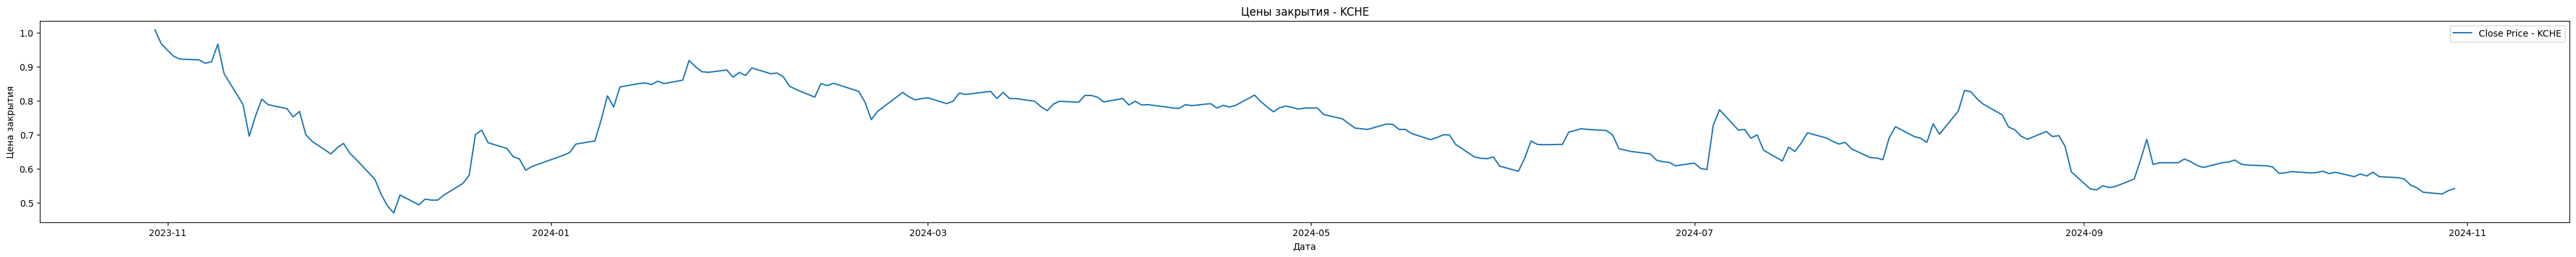

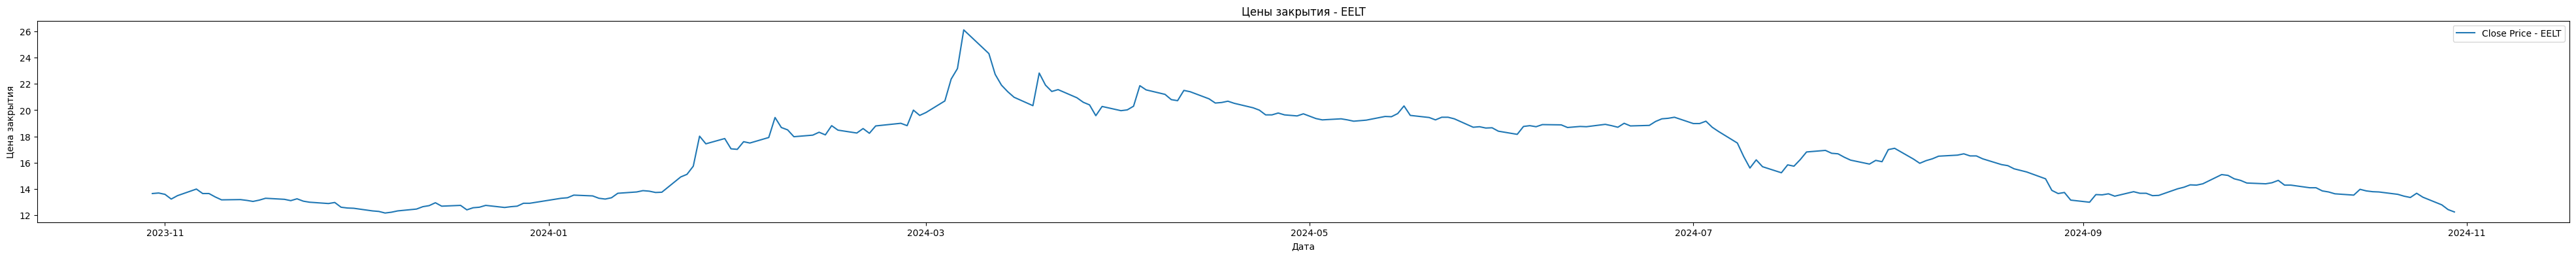

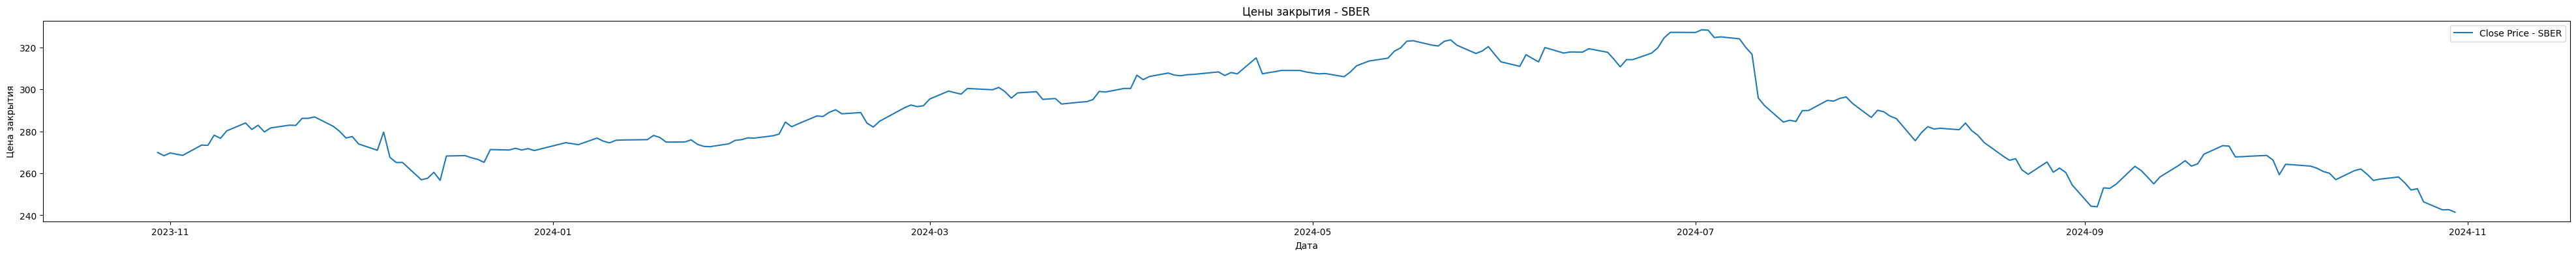

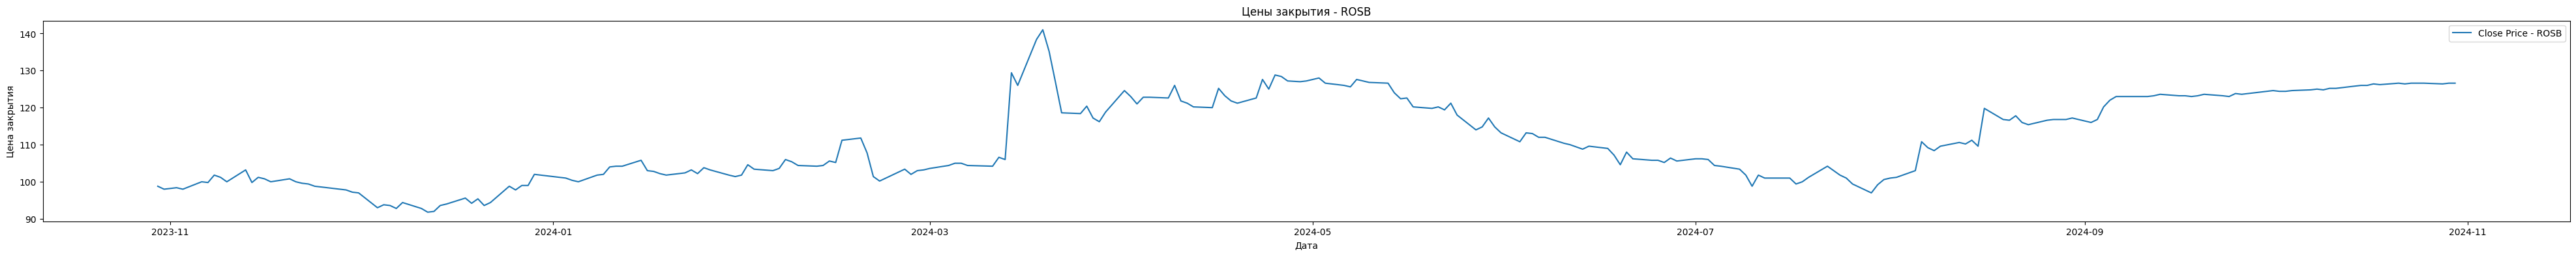

In [49]:
#  взял также несколько случайных тикеров а не 1й эшелон
sample_tickers = np.random.choice(tickers, 5, replace=False)

for ticker in sample_tickers:
    ticker_data = data[data['TICKER'] == ticker]
    plt.figure(figsize=(50, 4))
    plt.plot(ticker_data['TRADEDATE'], ticker_data['CLOSE'], label=f'Close Price - {ticker}')
    plt.title(f'Цены закрытия - {ticker}')
    plt.xlabel('Дата')
    plt.ylabel('Цена закрытия')
    plt.legend()
    plt.show()


**Тренды**

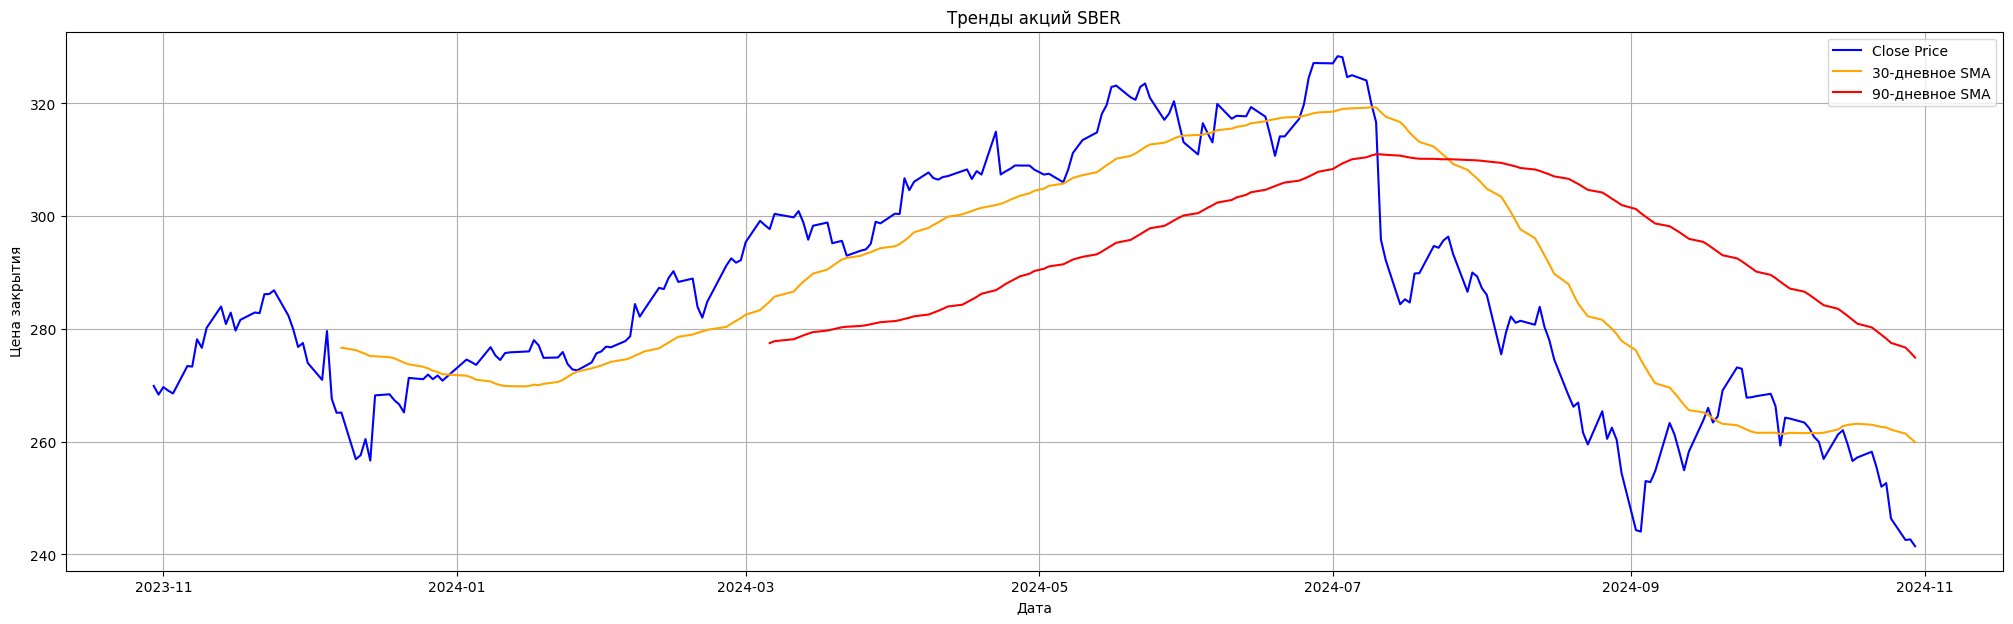

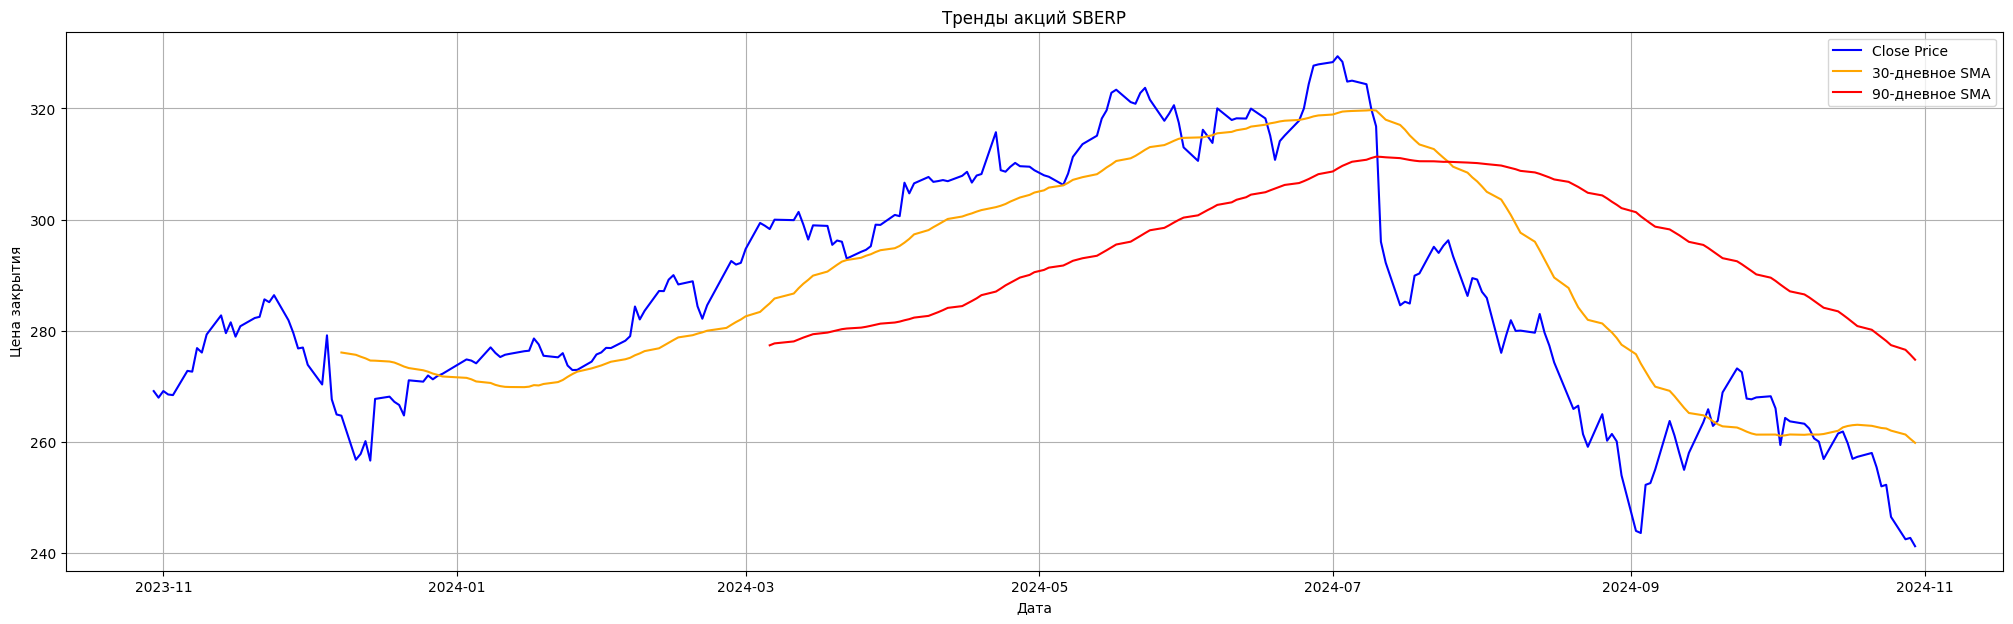

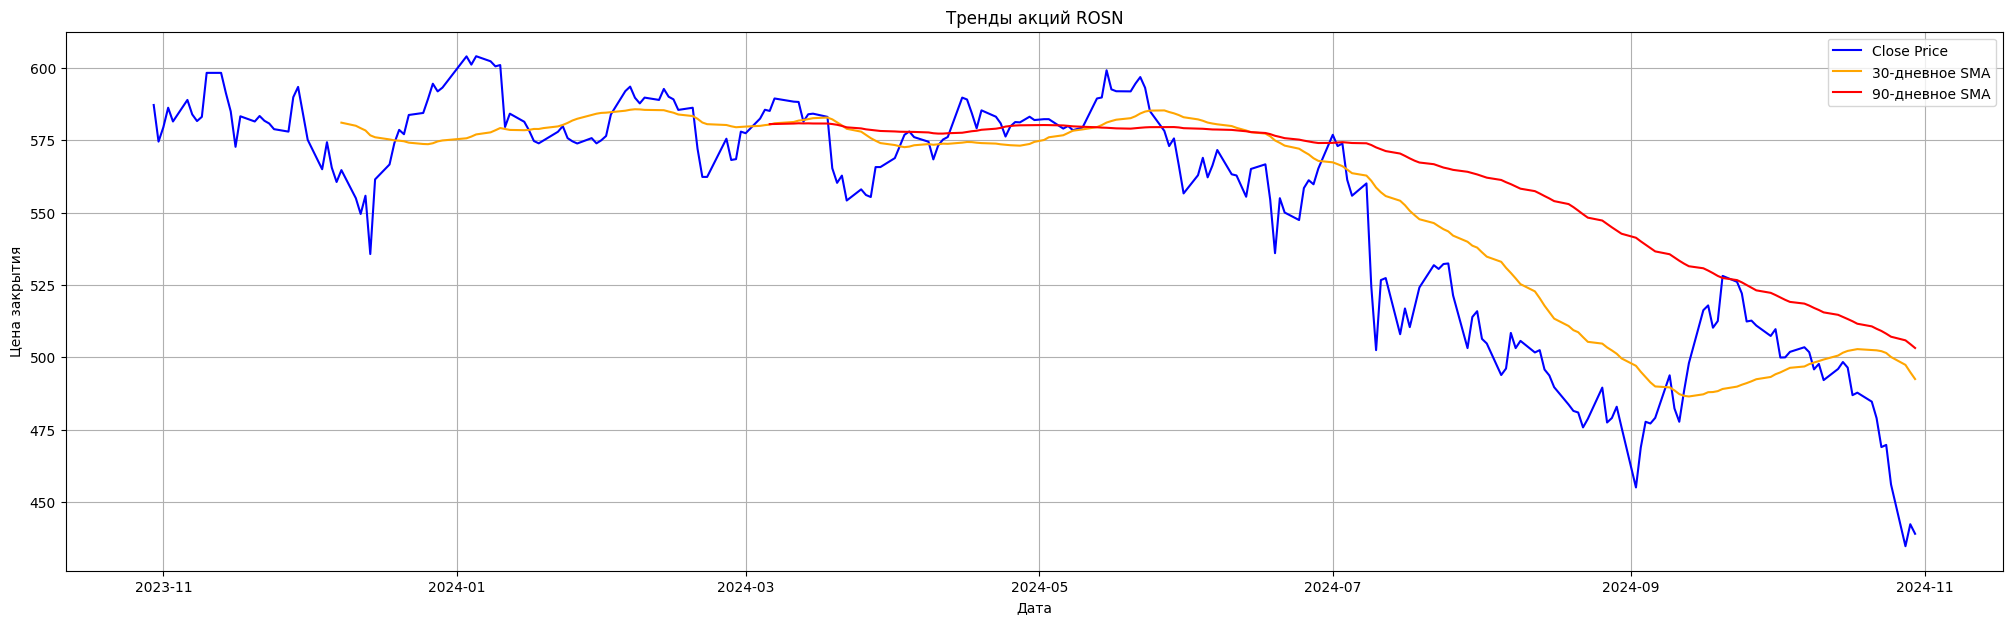

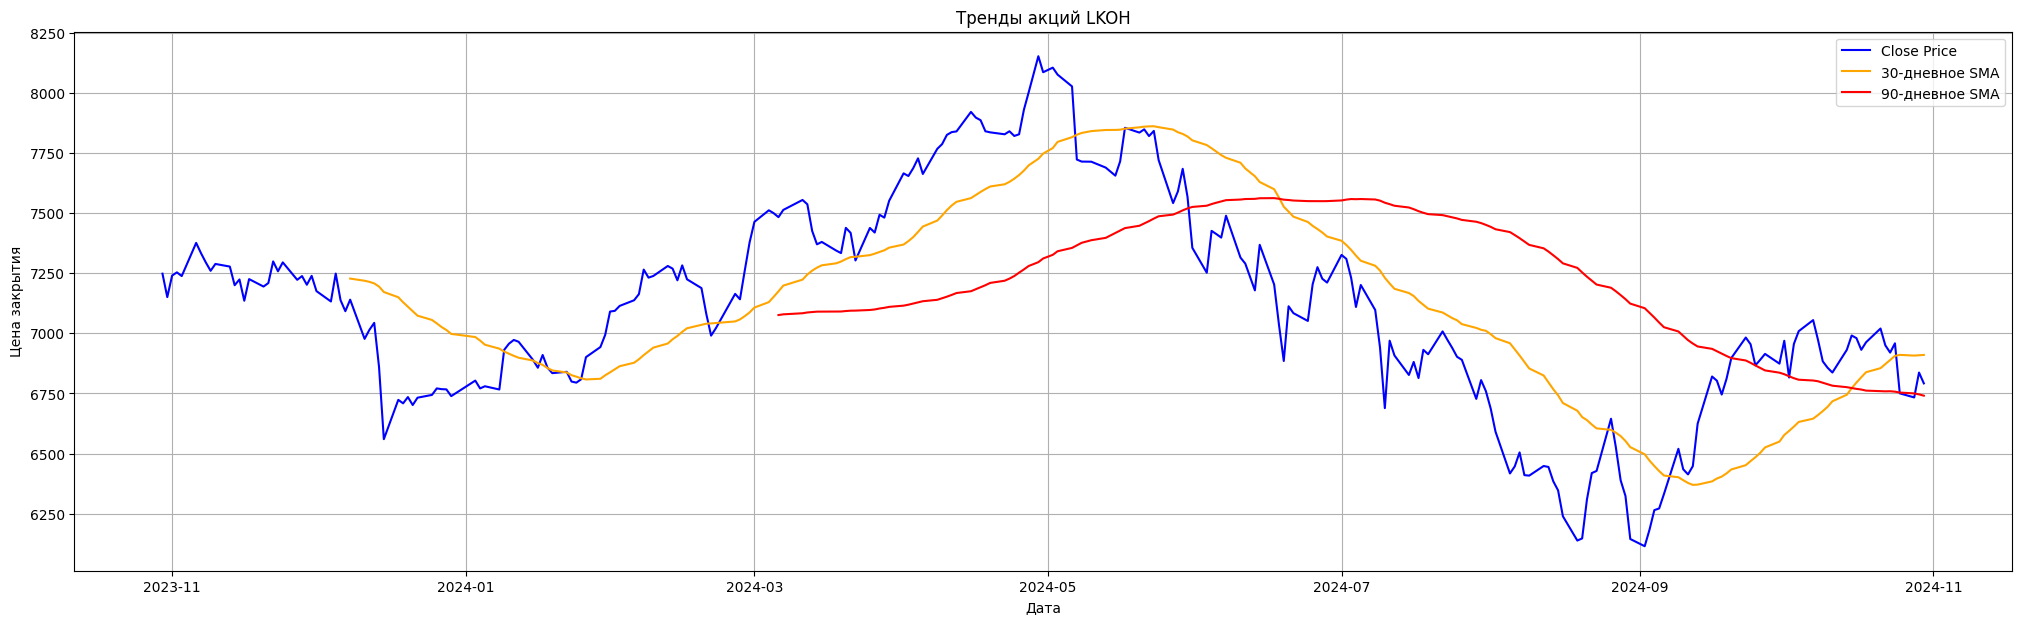

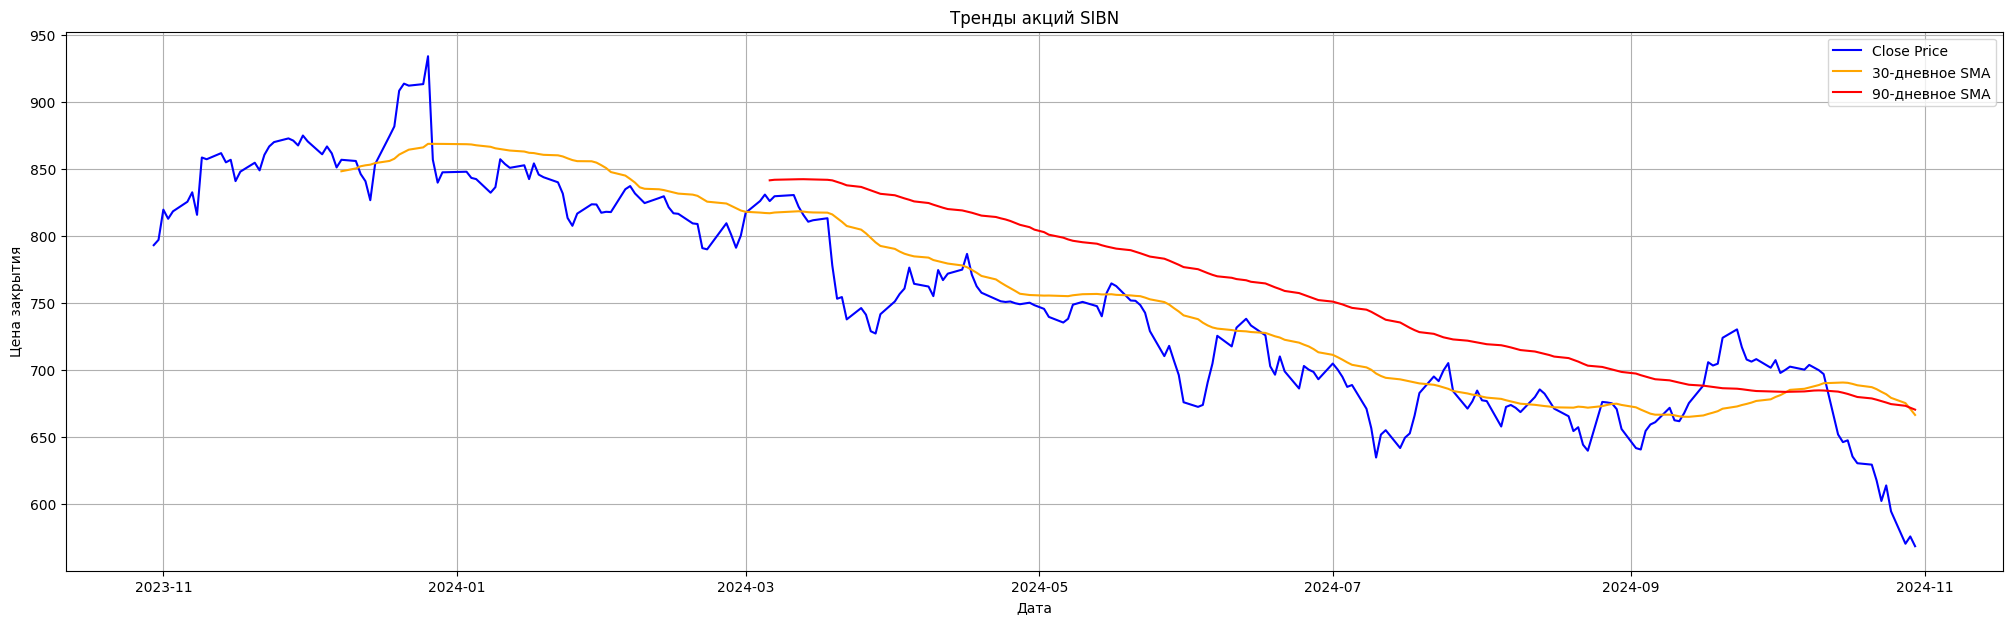

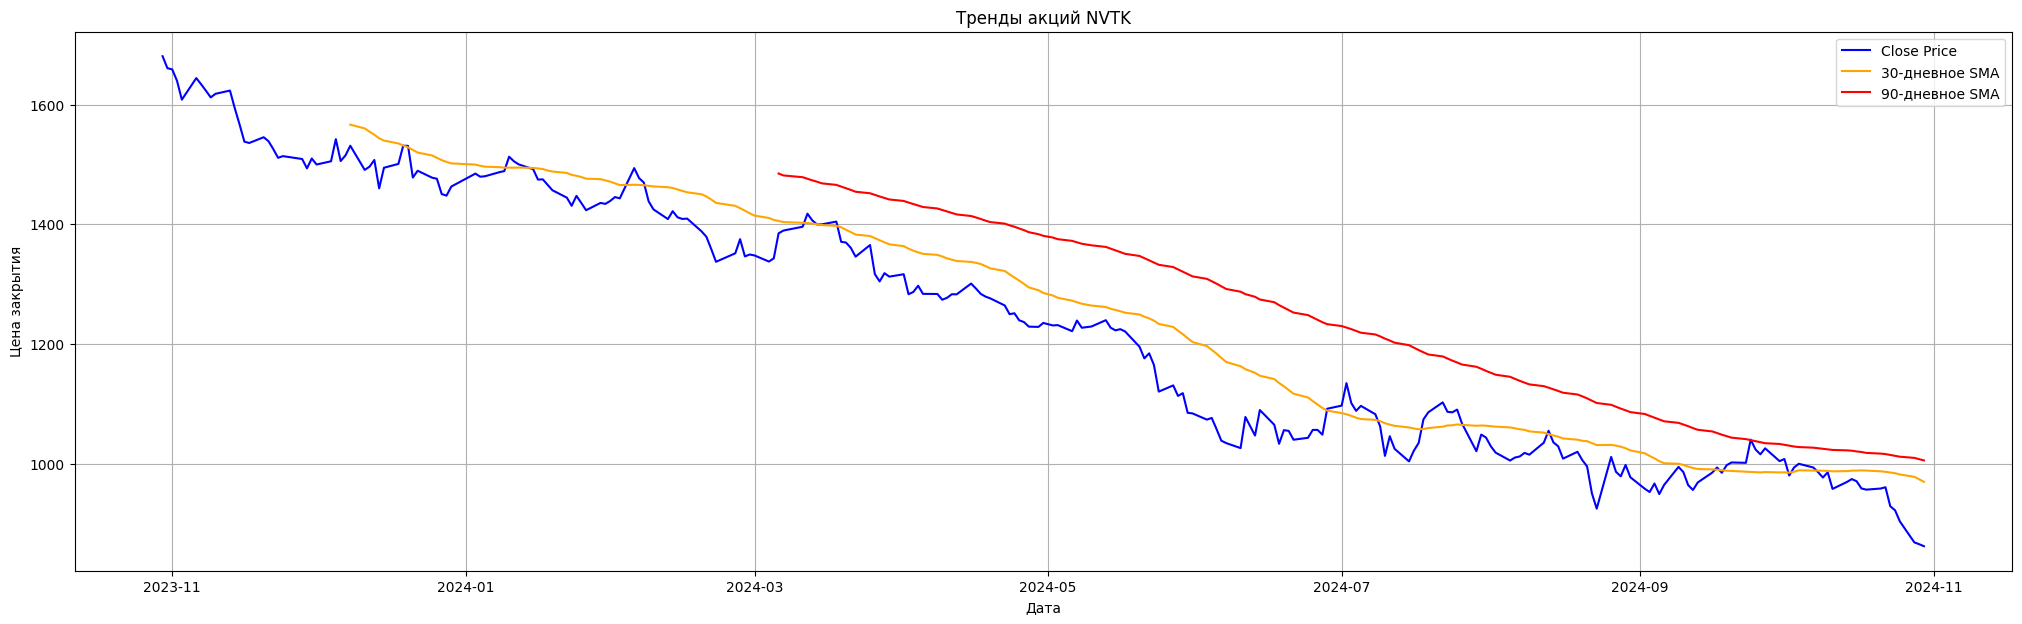

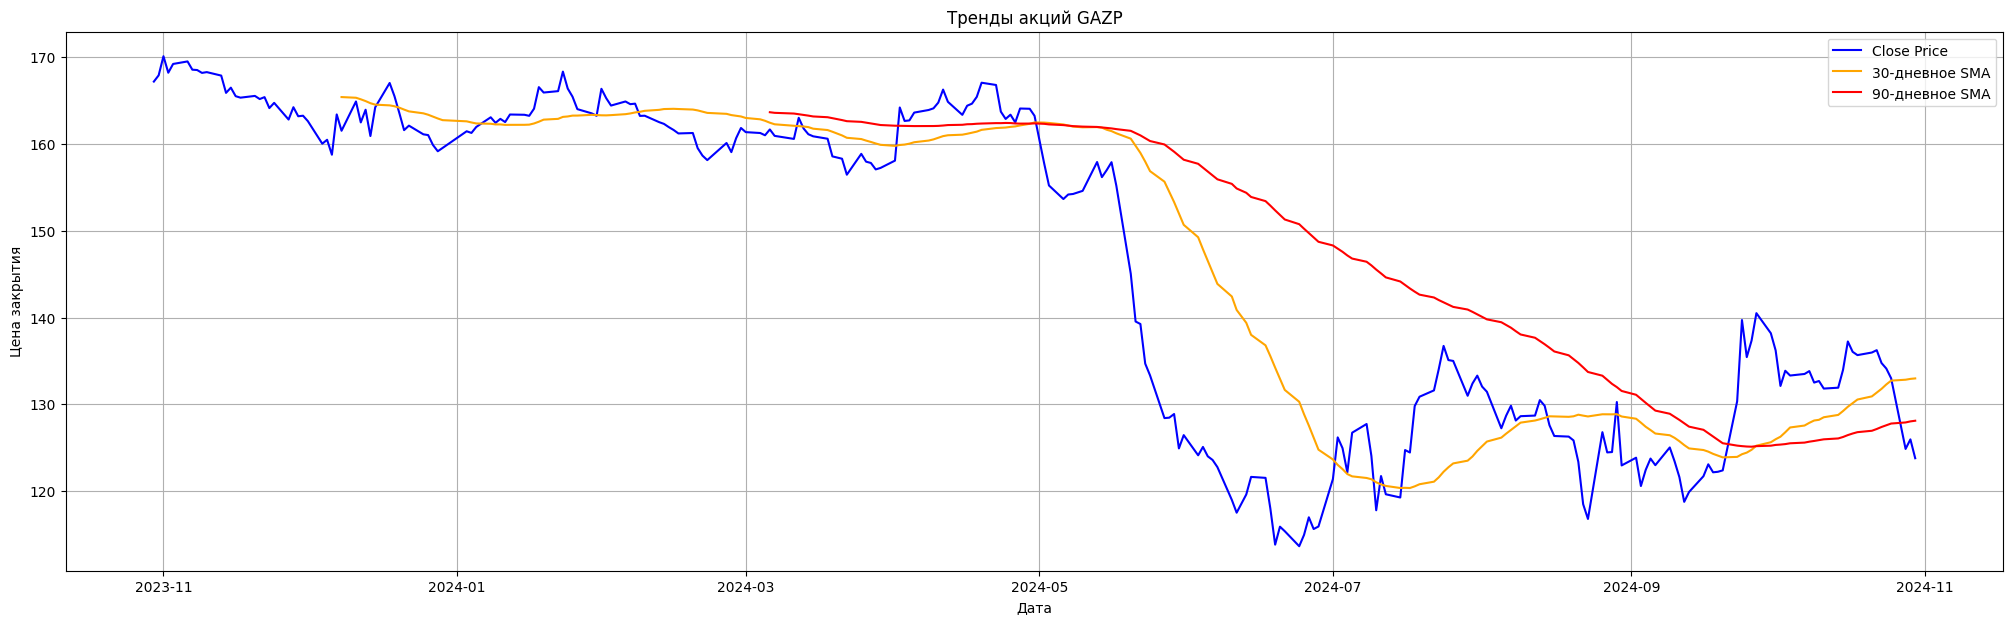

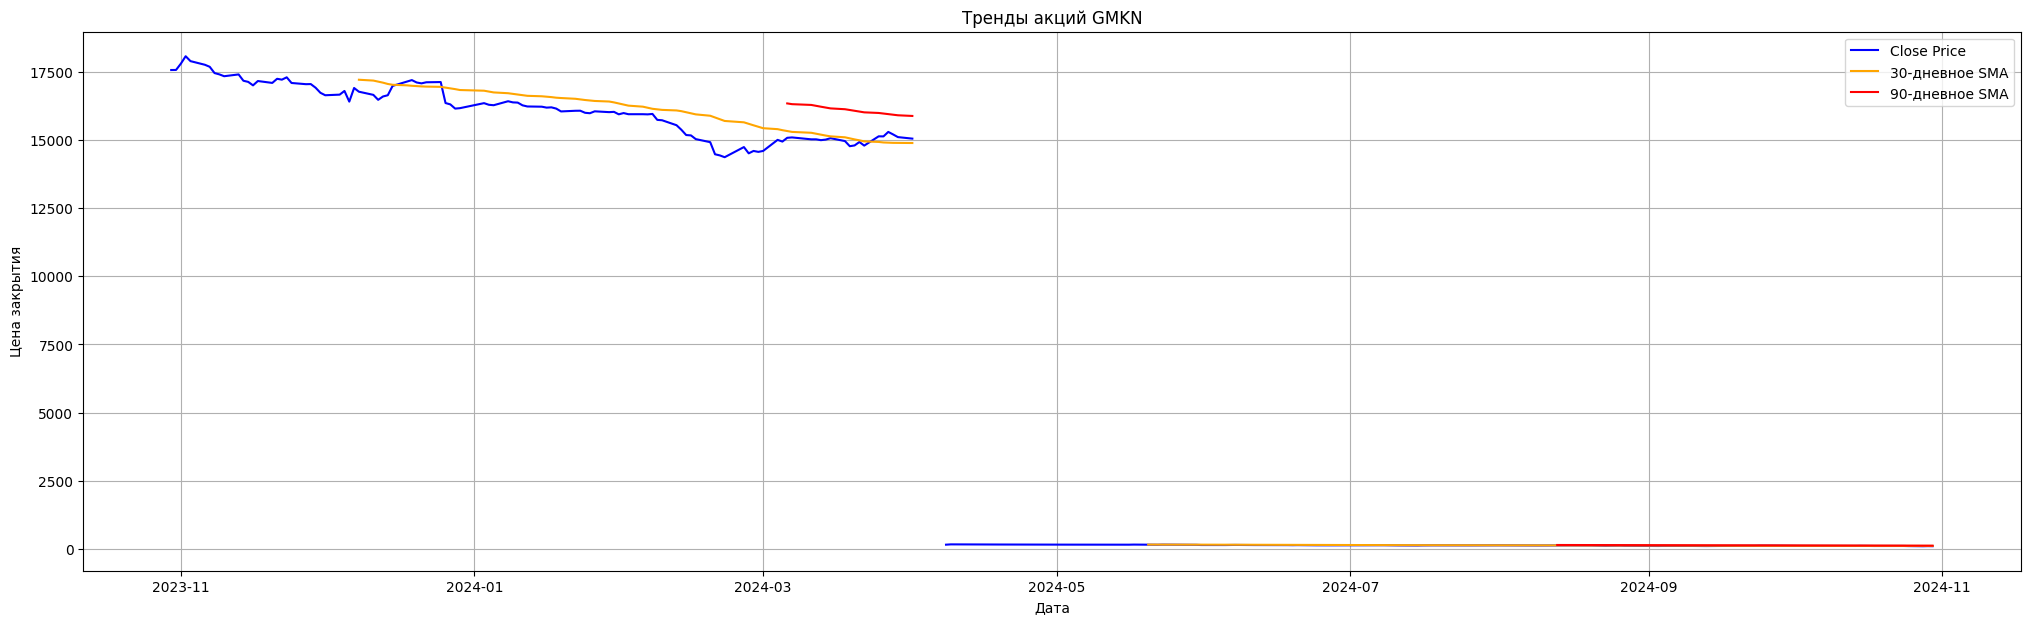

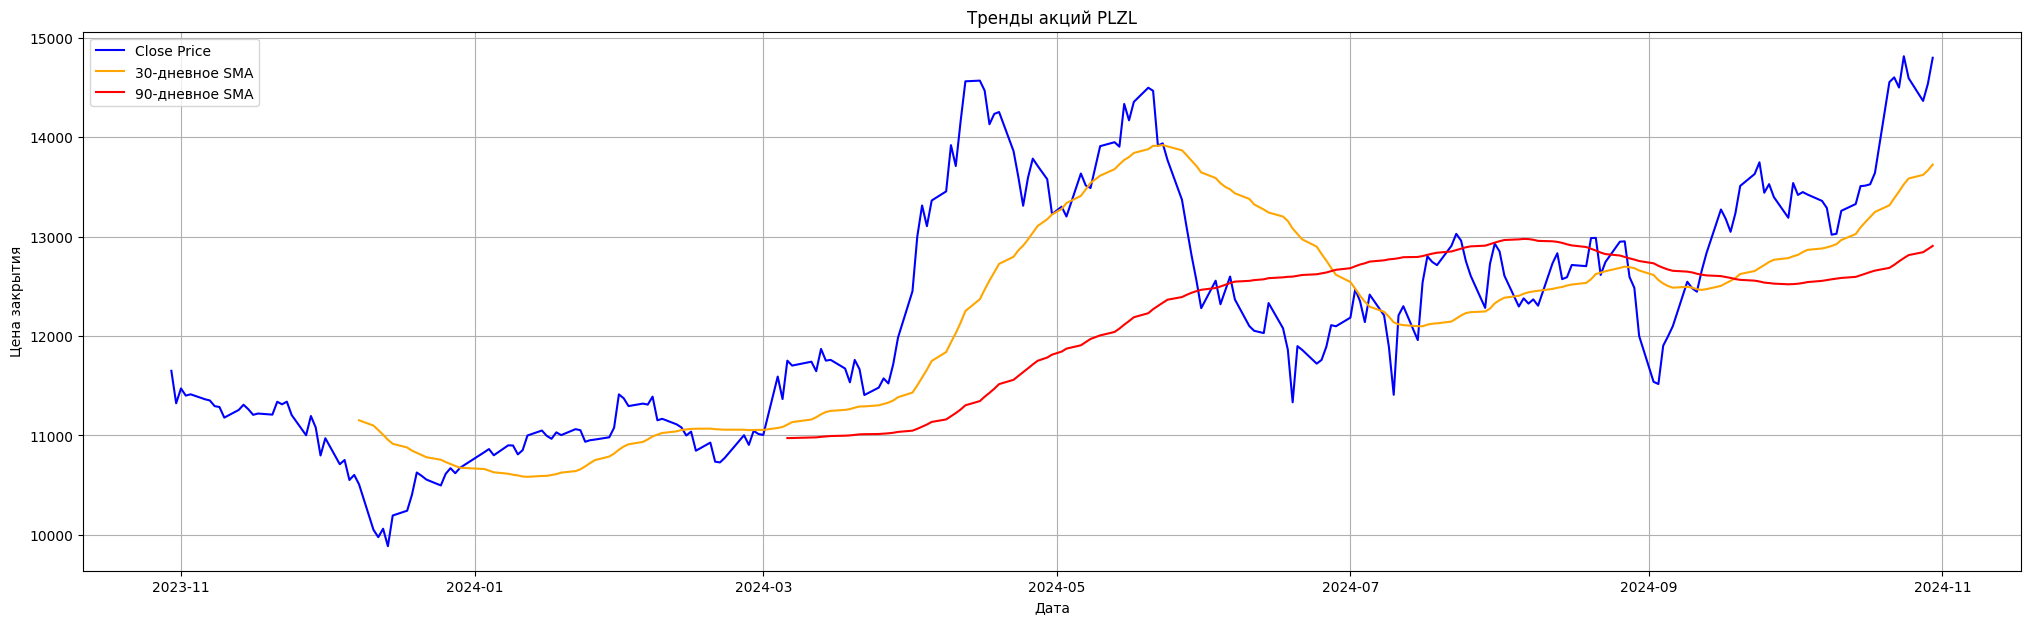

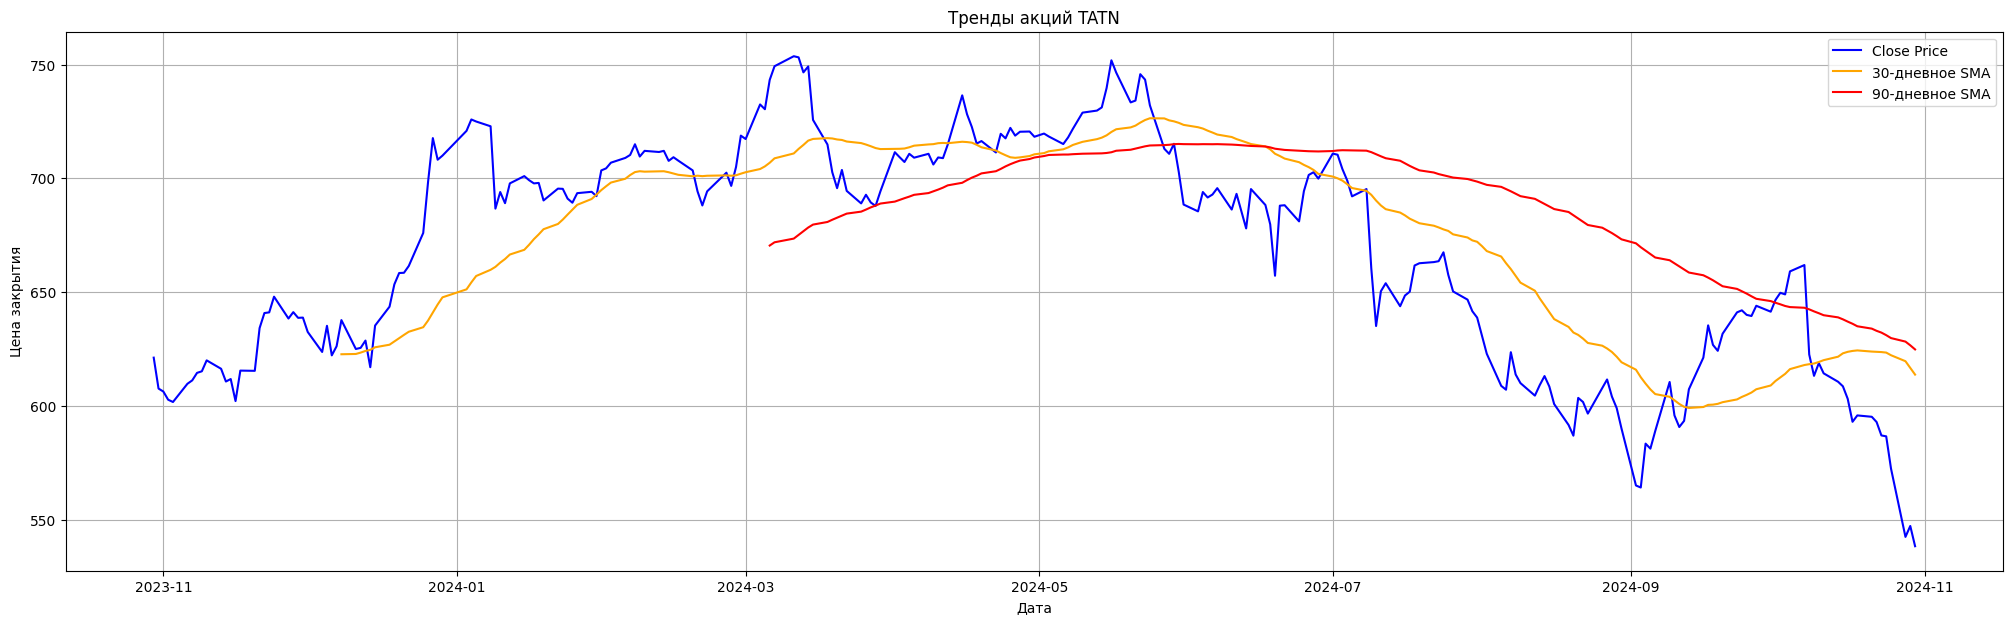

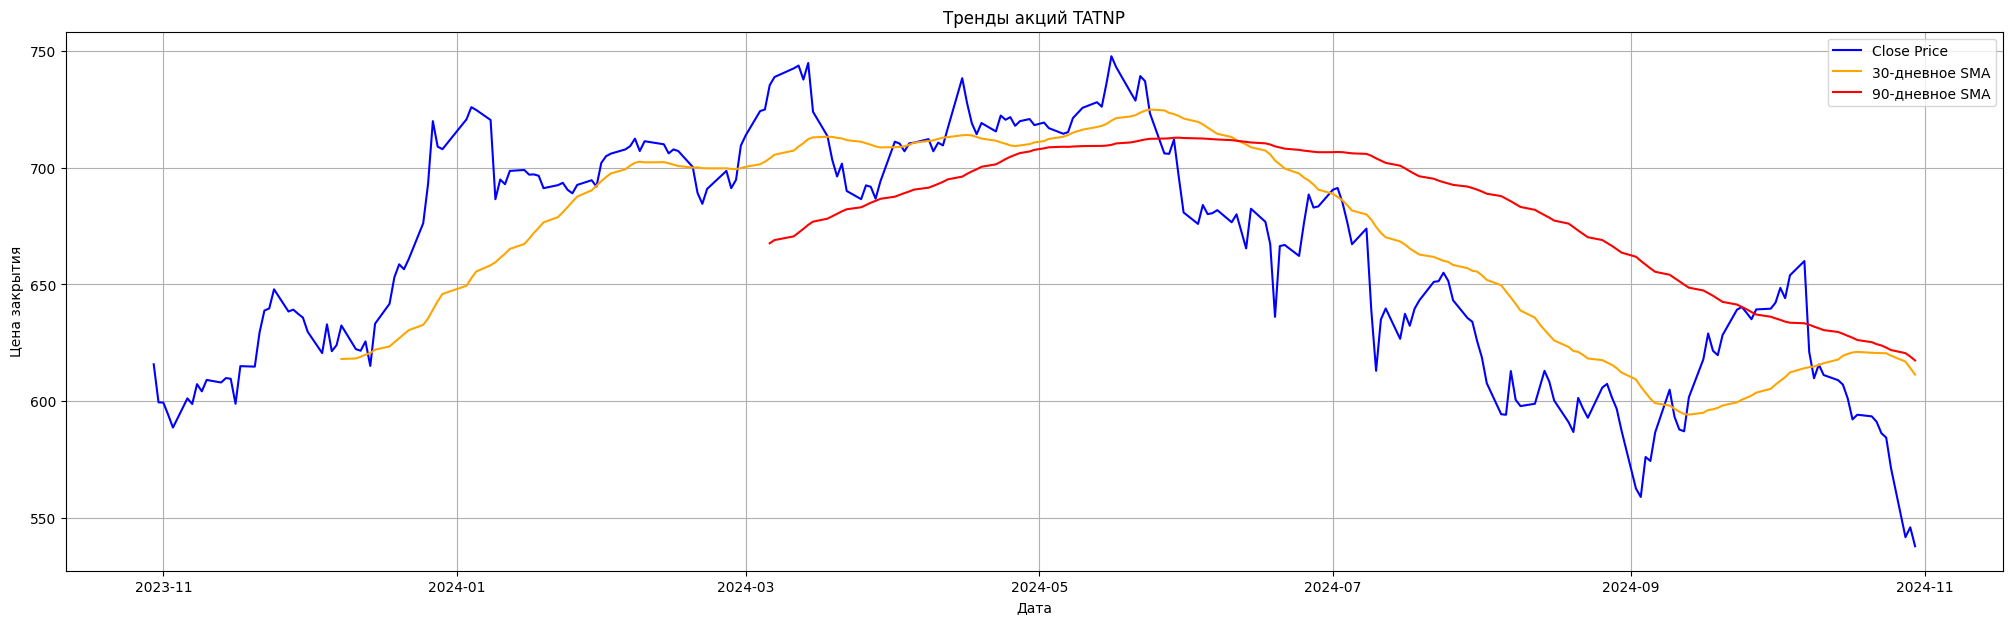

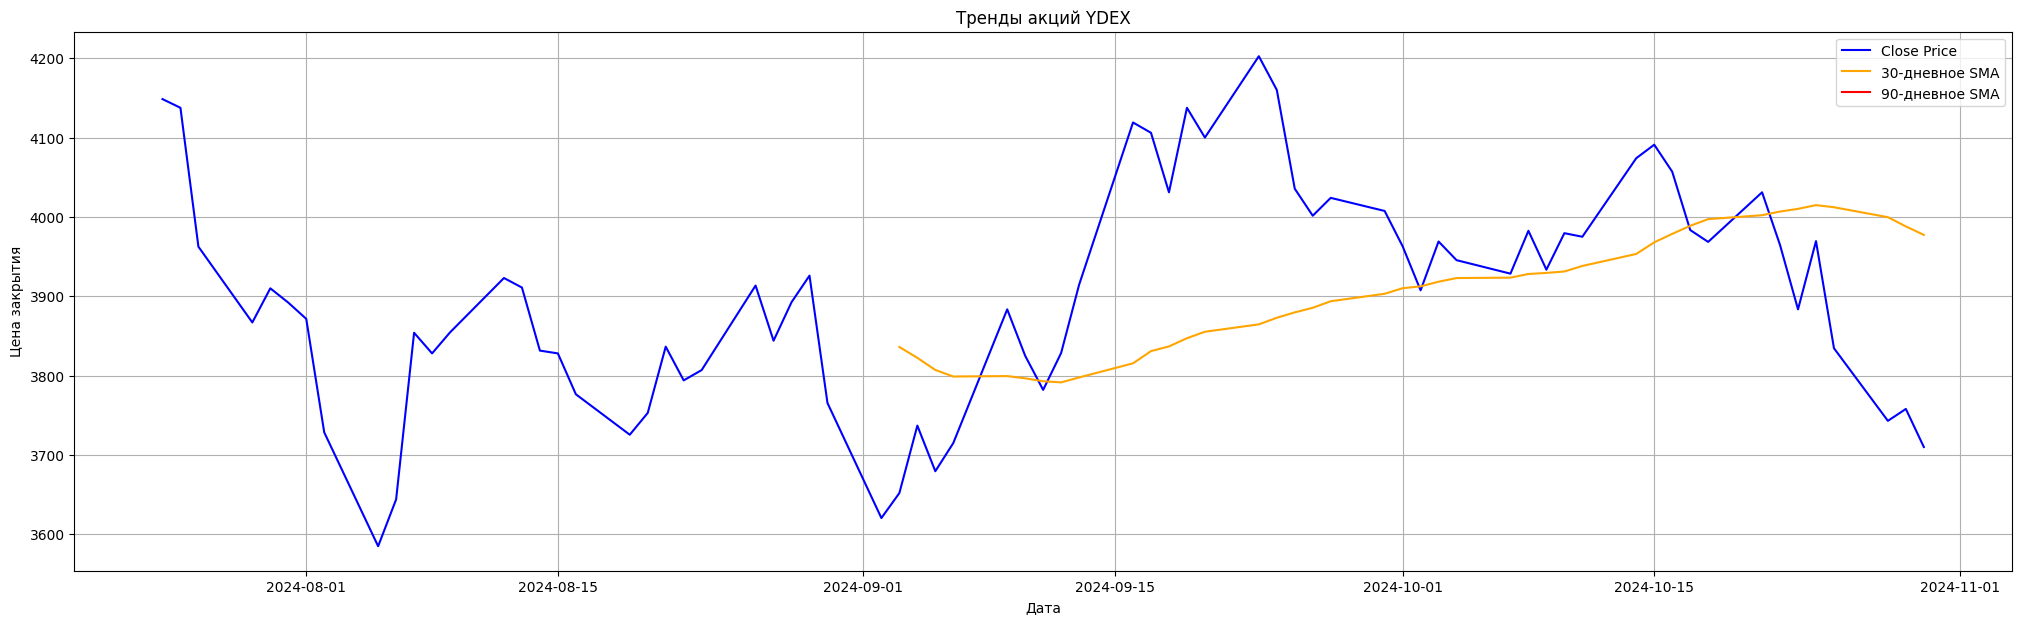

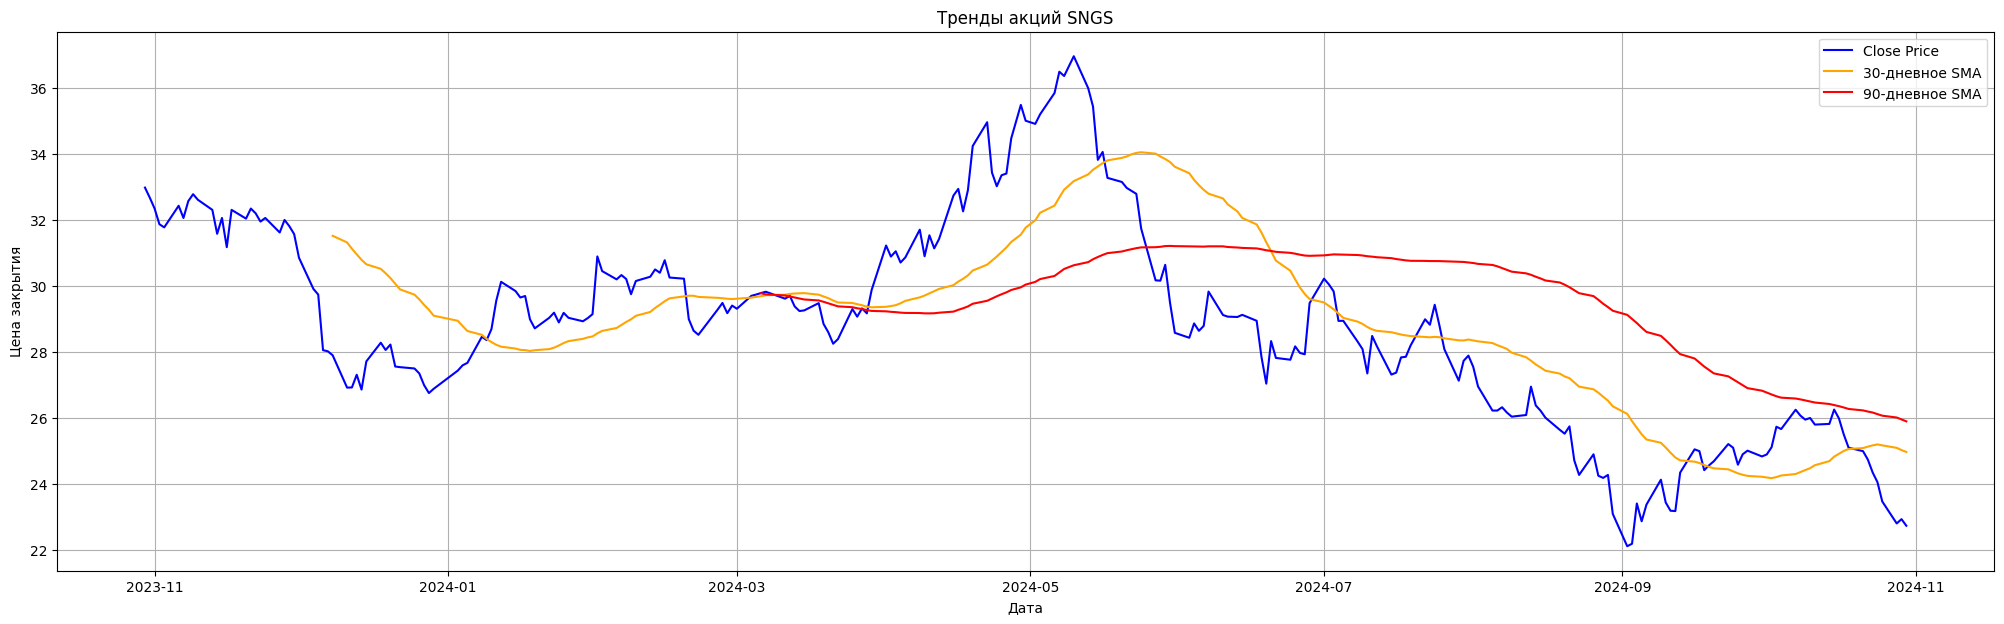

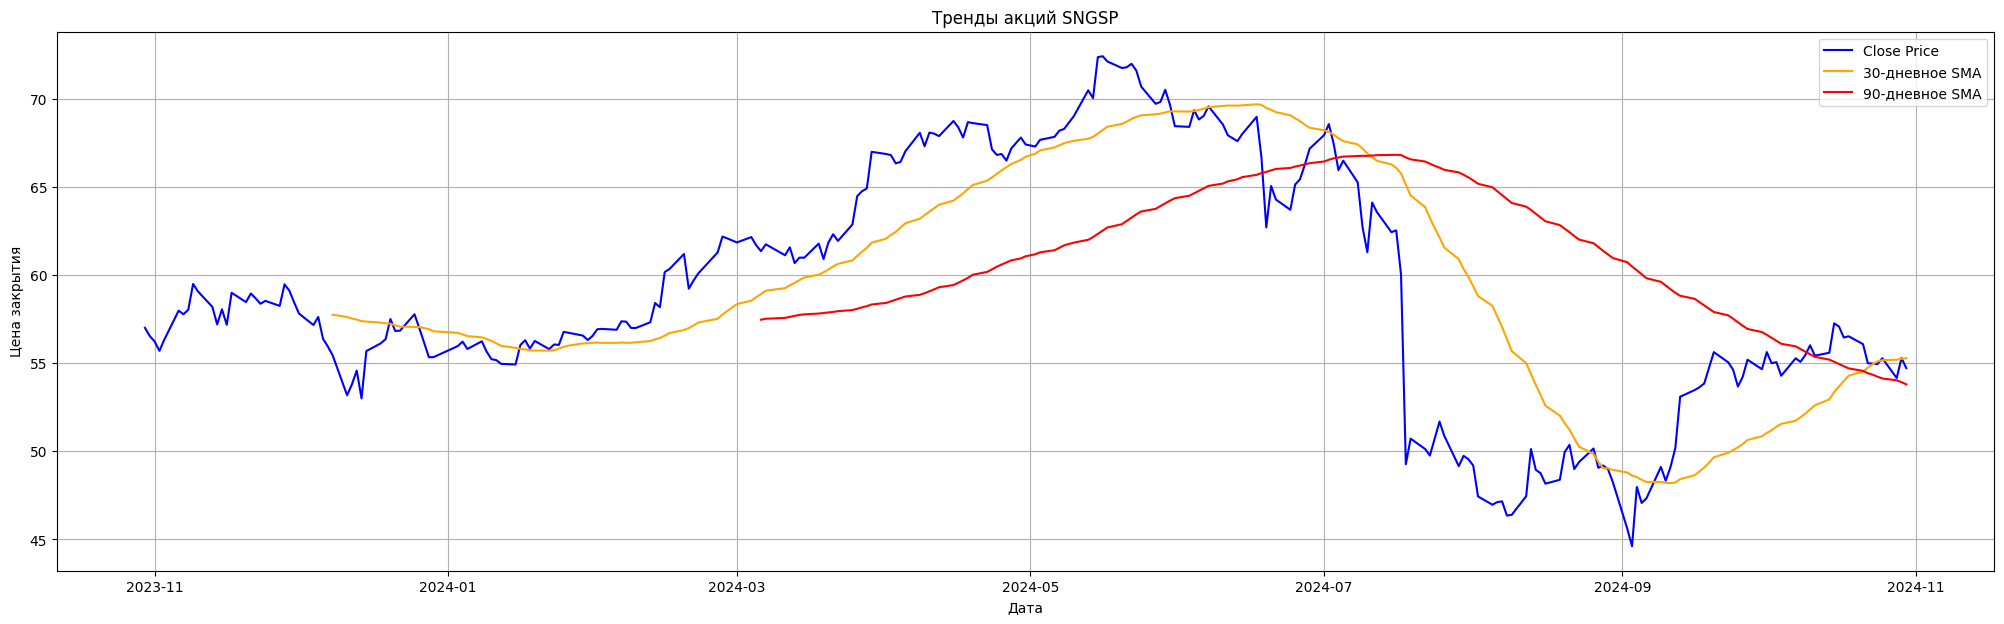

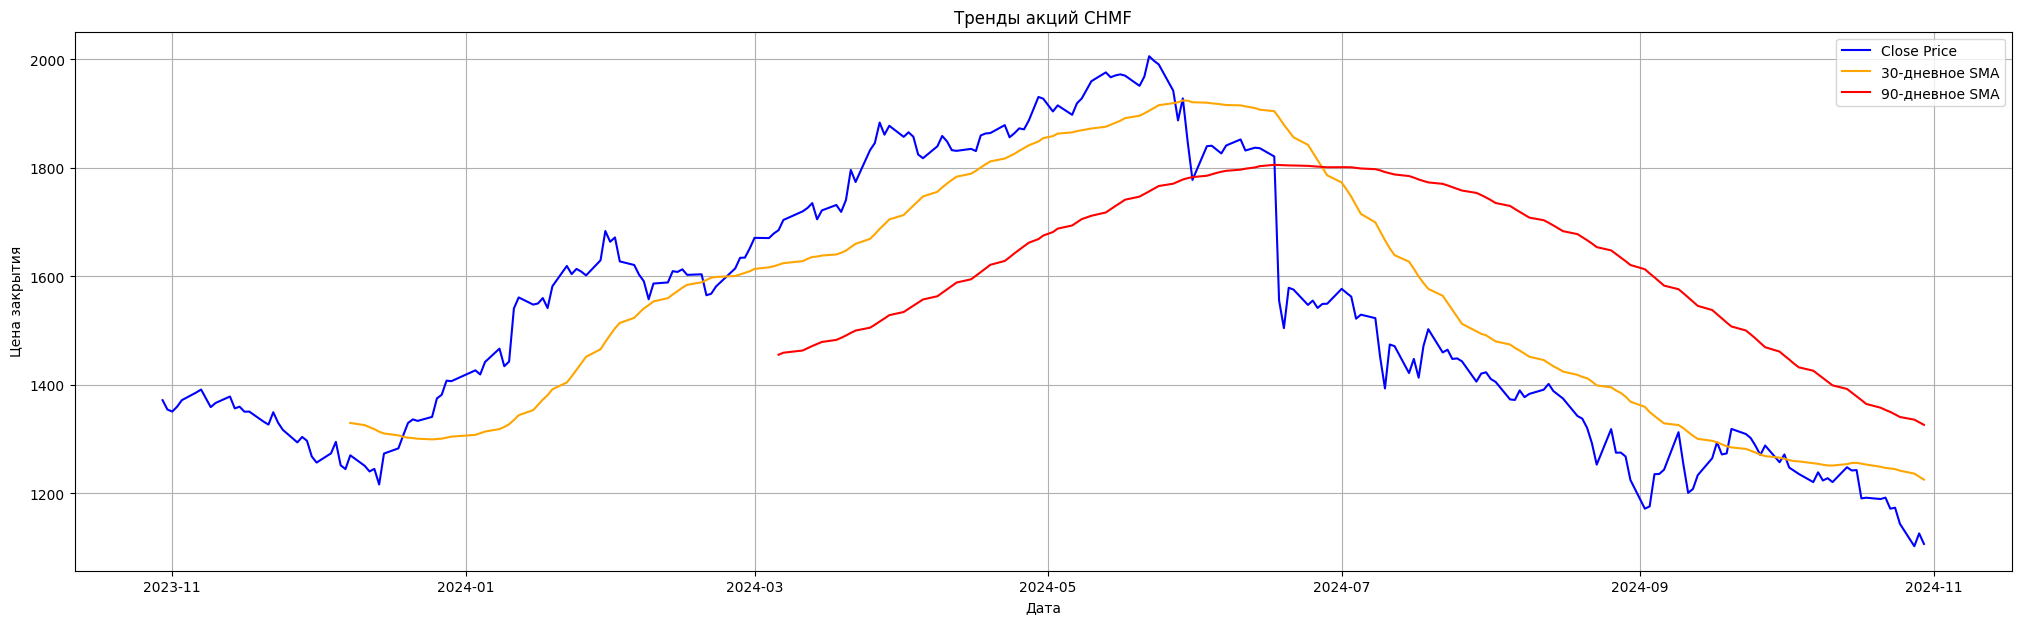

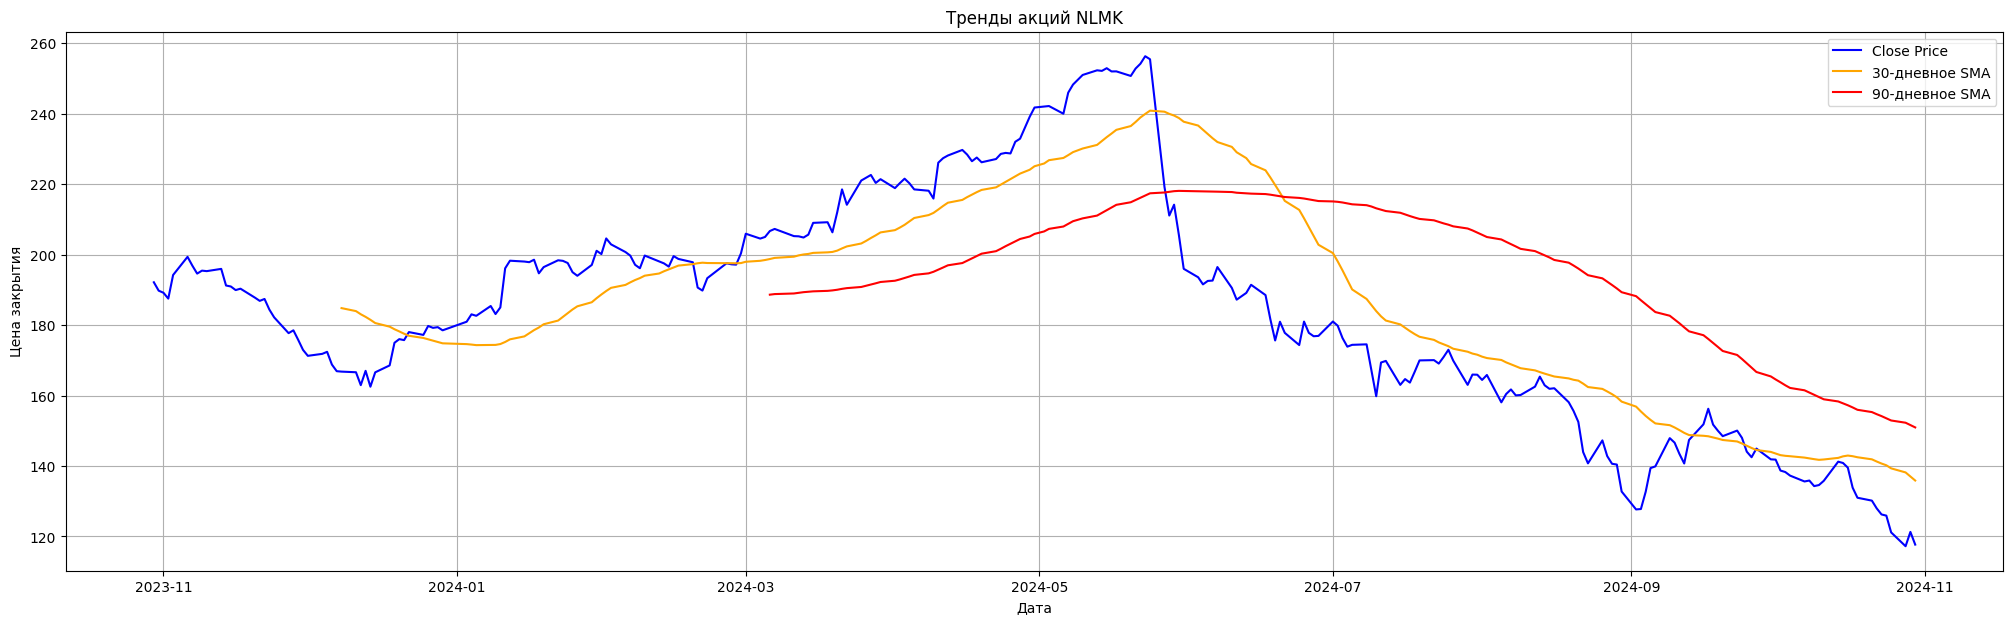

In [97]:
def plot_trend(tickers_data, ticker):
    if ticker not in tickers_data:
        print(f"No data for {ticker}.")
        return

    plt.figure(figsize=(25, 7))
    plt.plot(tickers_data[ticker].index, tickers_data[ticker]['CLOSE'], label='Close Price', color='blue')

    tickers_data[ticker]['SMA_30'] = tickers_data[ticker]['CLOSE'].rolling(window=30).mean()
    tickers_data[ticker]['SMA_90'] = tickers_data[ticker]['CLOSE'].rolling(window=90).mean()

    plt.plot(tickers_data[ticker].index, tickers_data[ticker]['SMA_30'], label='30-дневное SMA', color='orange')
    plt.plot(tickers_data[ticker].index, tickers_data[ticker]['SMA_90'], label='90-дневное SMA', color='red')

    plt.title(f'Тренды акций {ticker}')
    plt.xlabel('Дата')
    plt.ylabel('Цена закрытия')
    plt.grid()
    plt.legend()
    plt.show()

for ticker in top_tickers:
    plot_trend(tickers_data, ticker)


**Сезонность**

<Figure size 1500x1000 with 0 Axes>

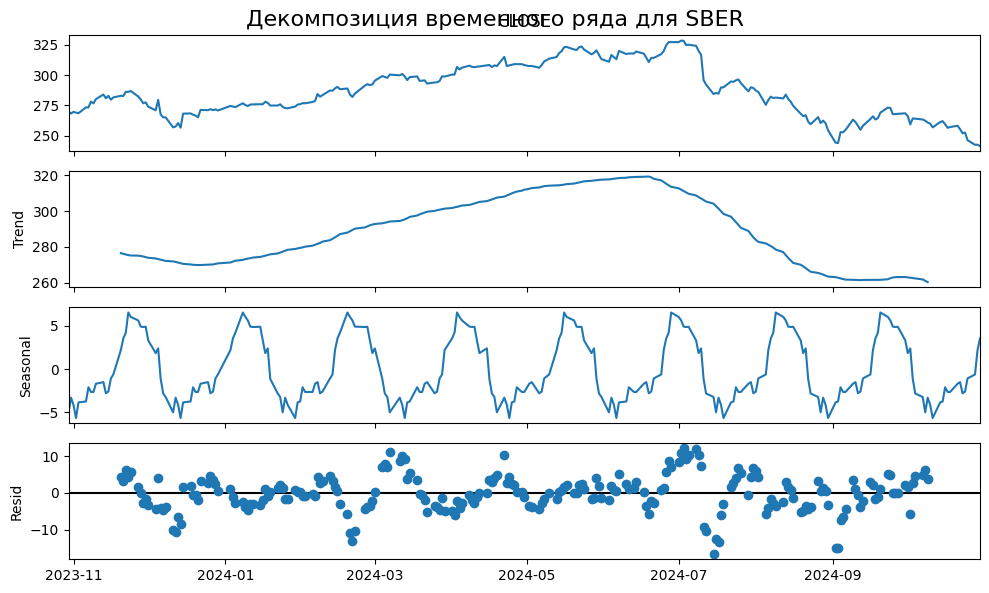

<Figure size 1500x1000 with 0 Axes>

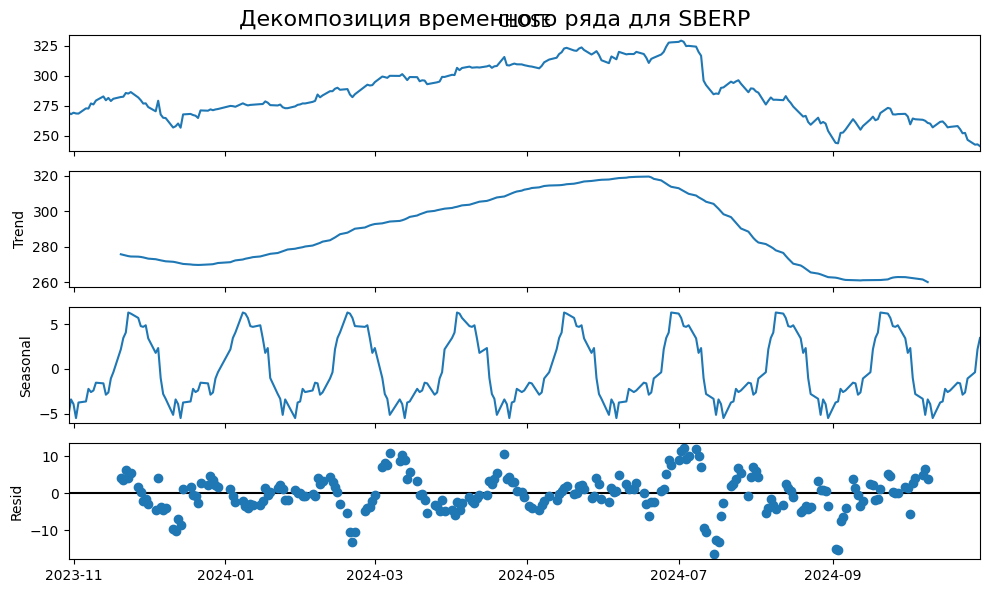

<Figure size 1500x1000 with 0 Axes>

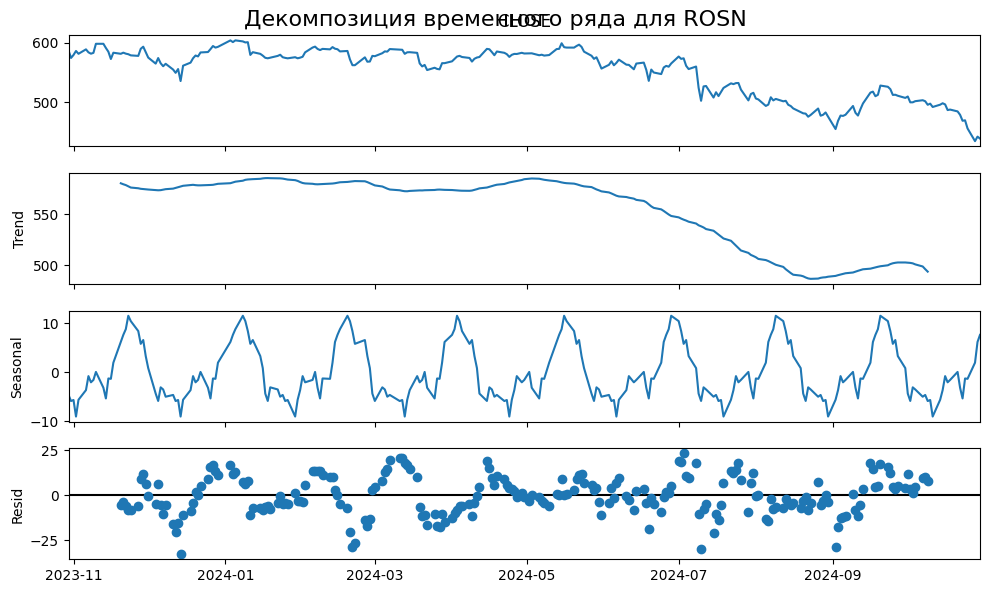

<Figure size 1500x1000 with 0 Axes>

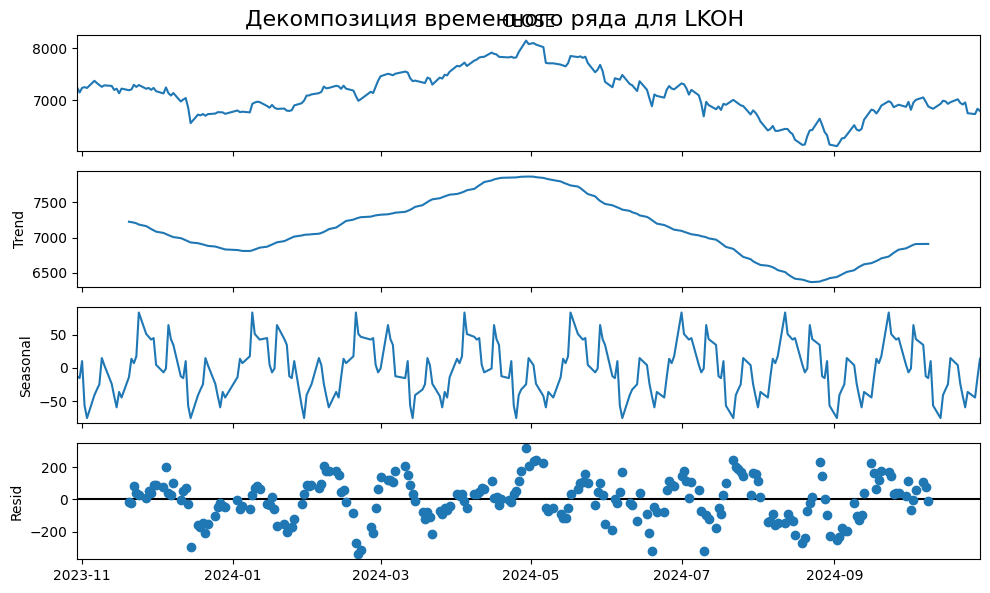

<Figure size 1500x1000 with 0 Axes>

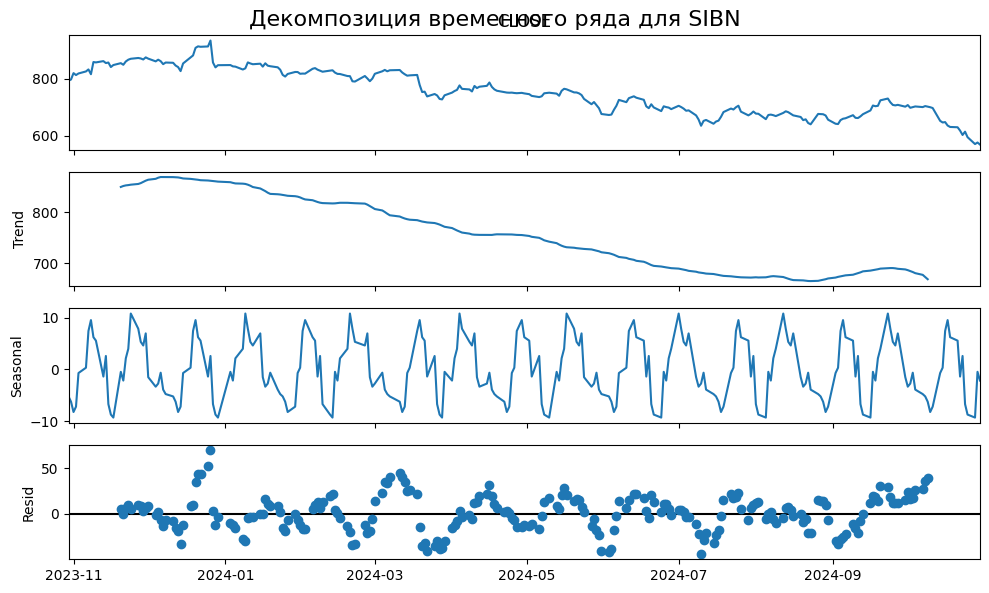

<Figure size 1500x1000 with 0 Axes>

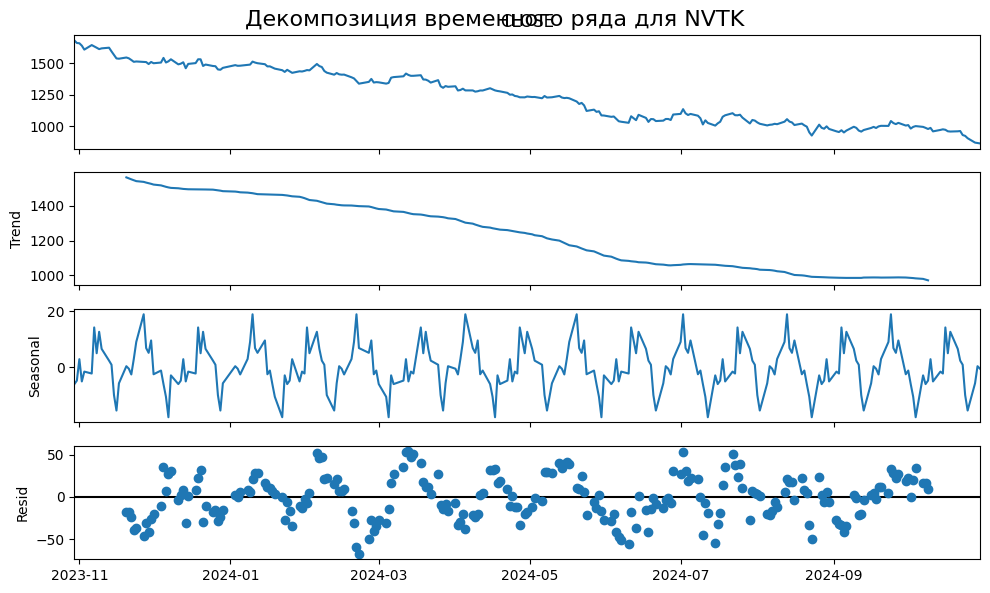

<Figure size 1500x1000 with 0 Axes>

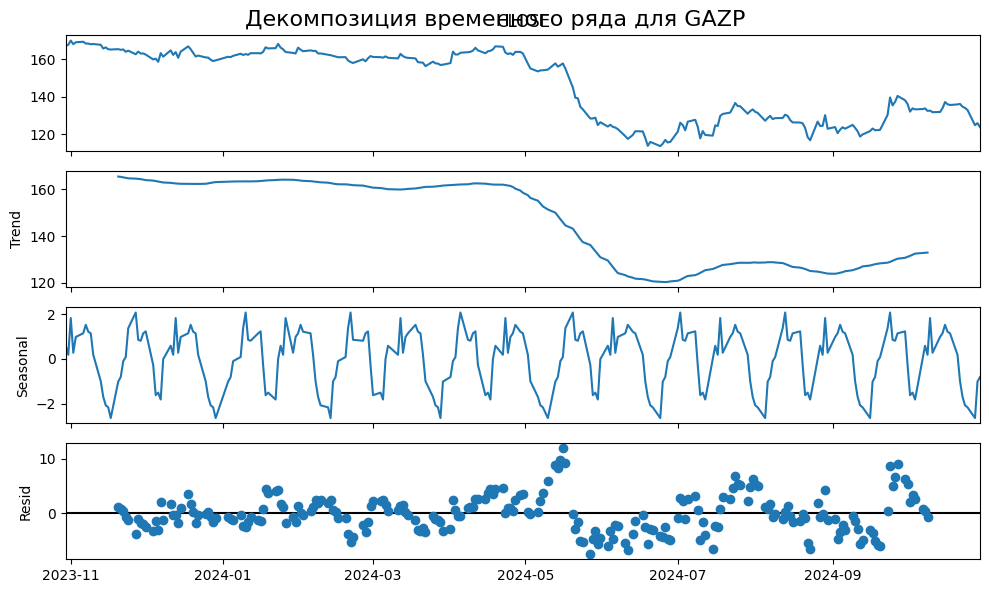

<Figure size 1500x1000 with 0 Axes>

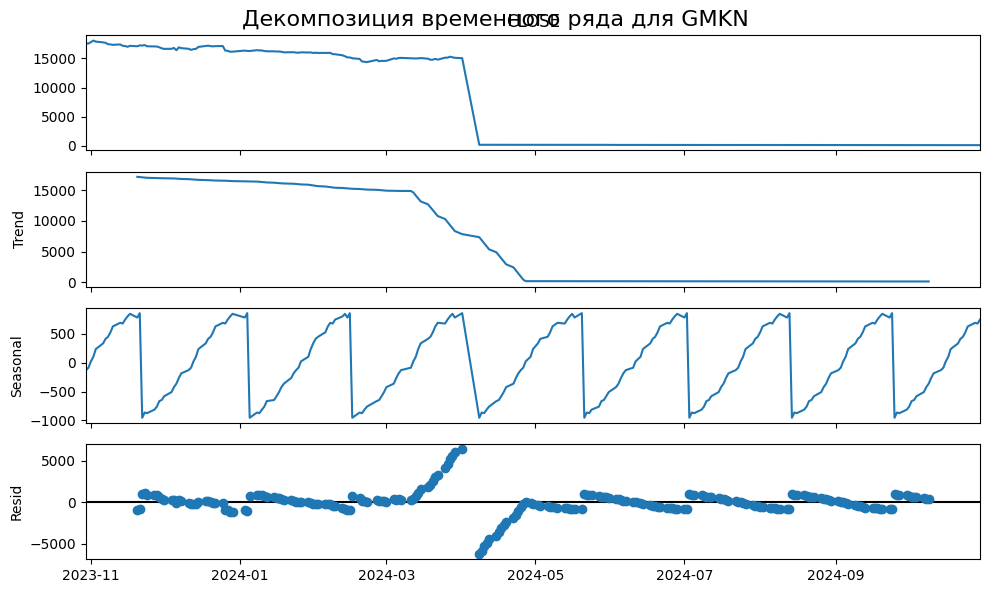

<Figure size 1500x1000 with 0 Axes>

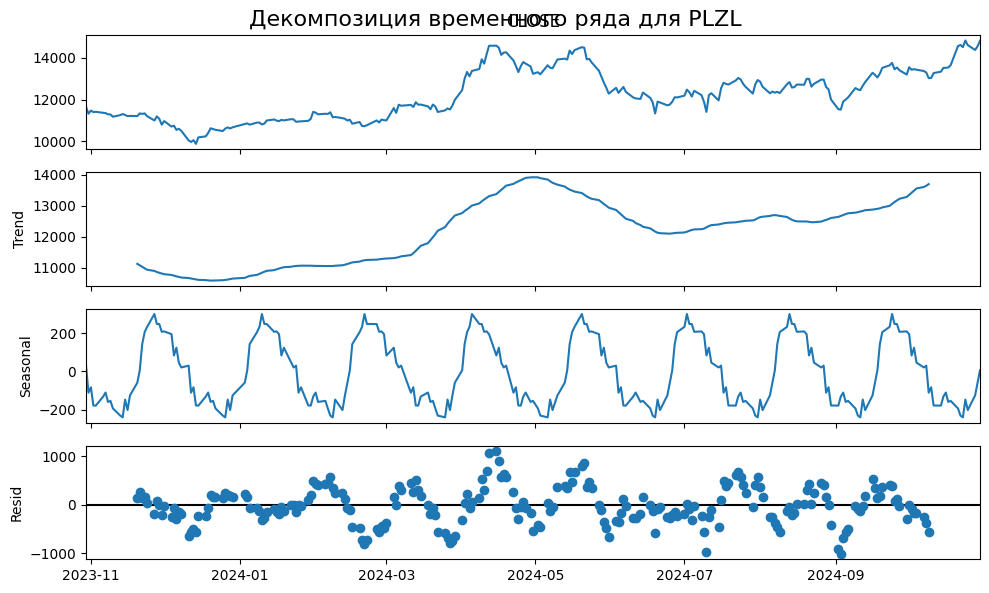

<Figure size 1500x1000 with 0 Axes>

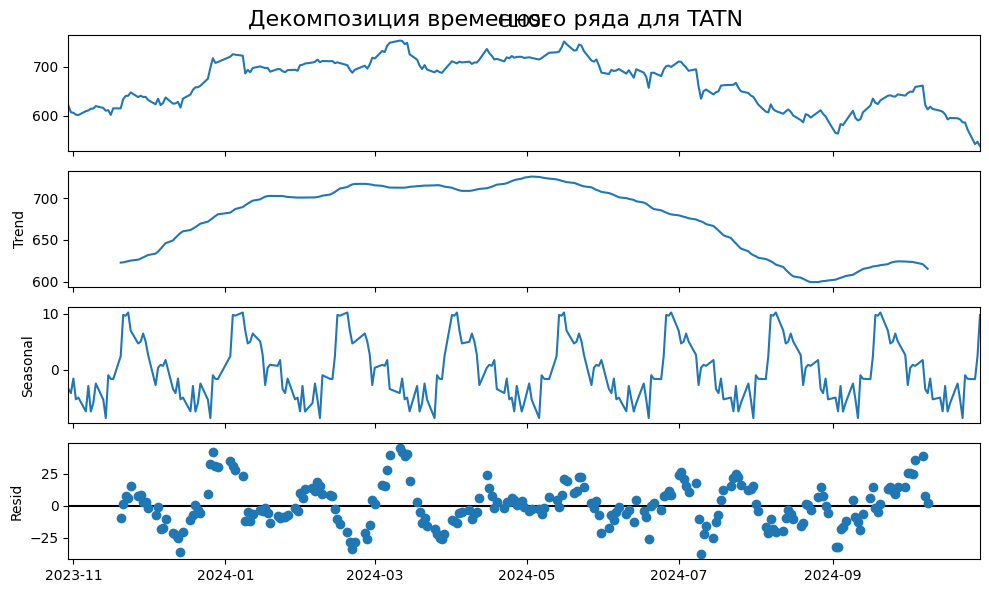

<Figure size 1500x1000 with 0 Axes>

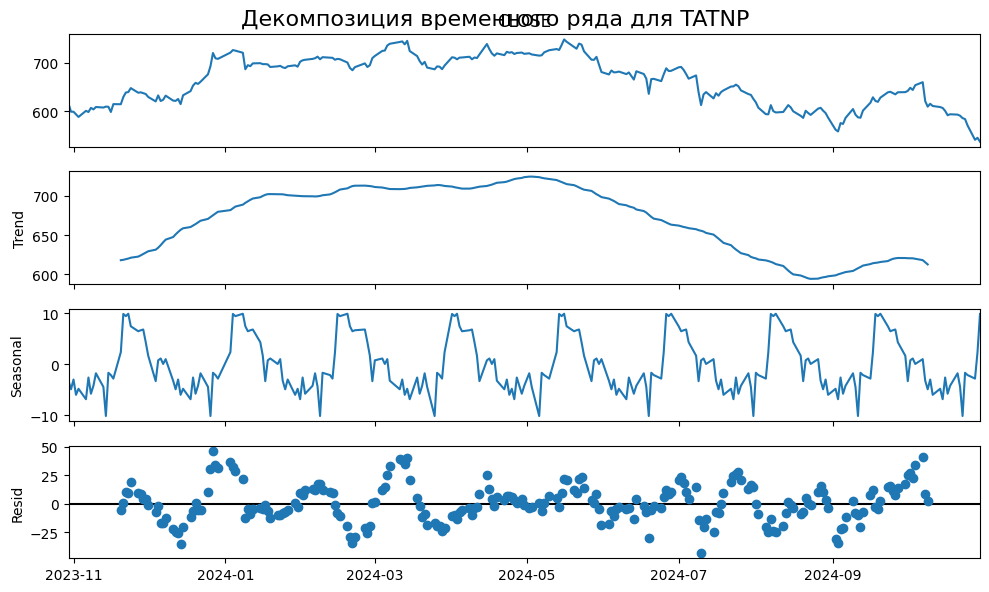

<Figure size 1500x1000 with 0 Axes>

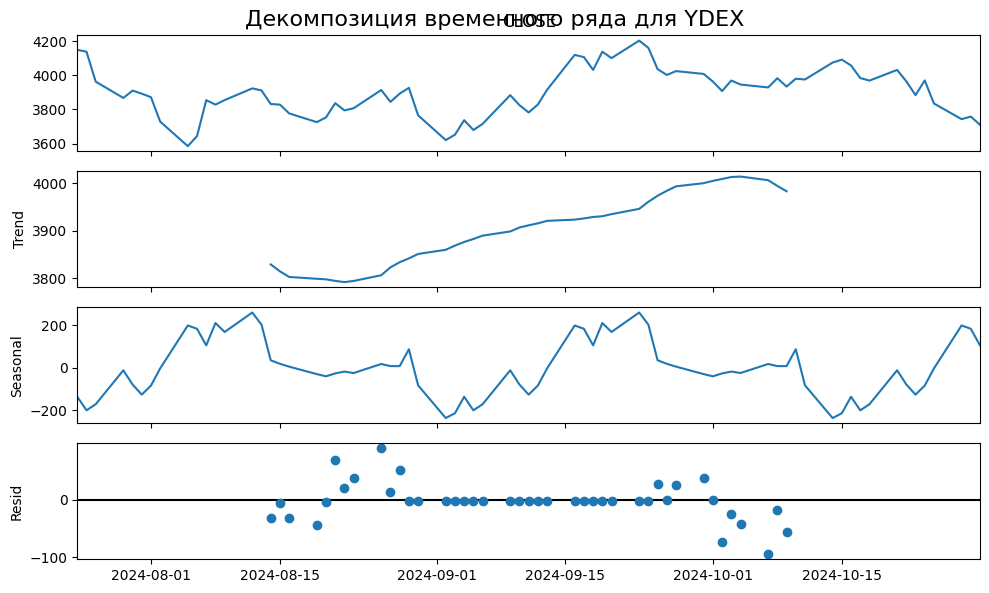

<Figure size 1500x1000 with 0 Axes>

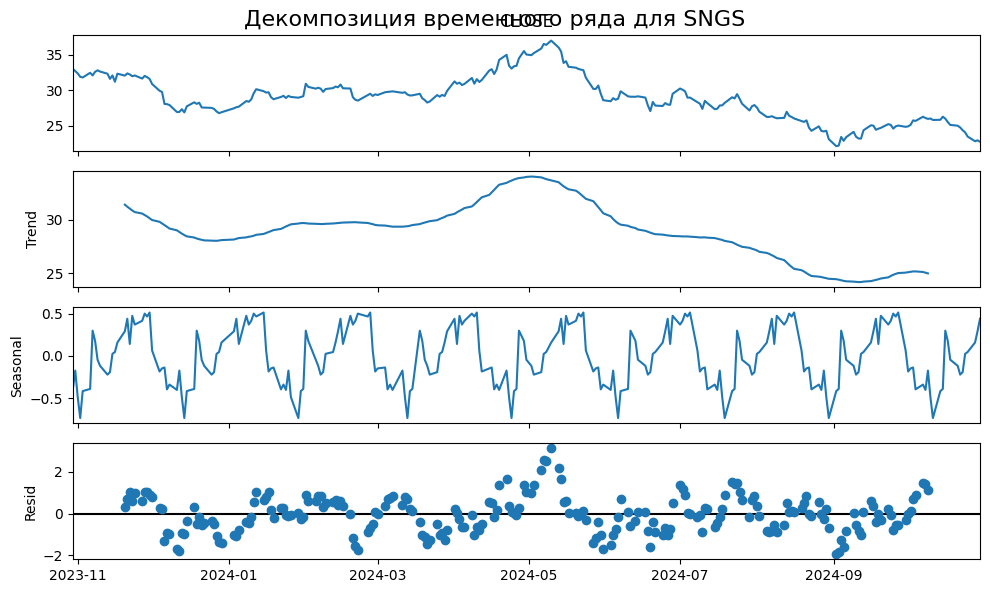

<Figure size 1500x1000 with 0 Axes>

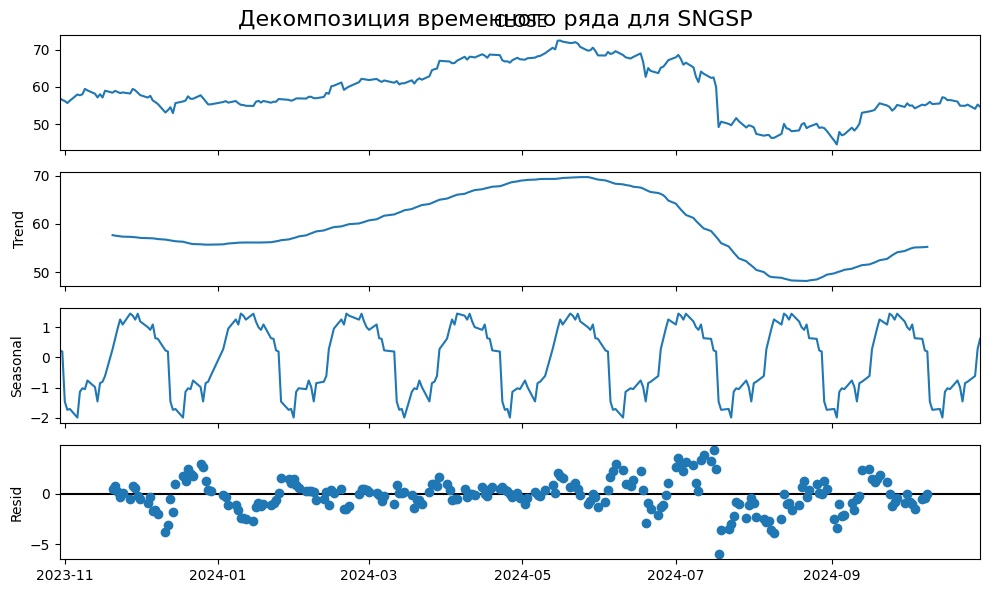

<Figure size 1500x1000 with 0 Axes>

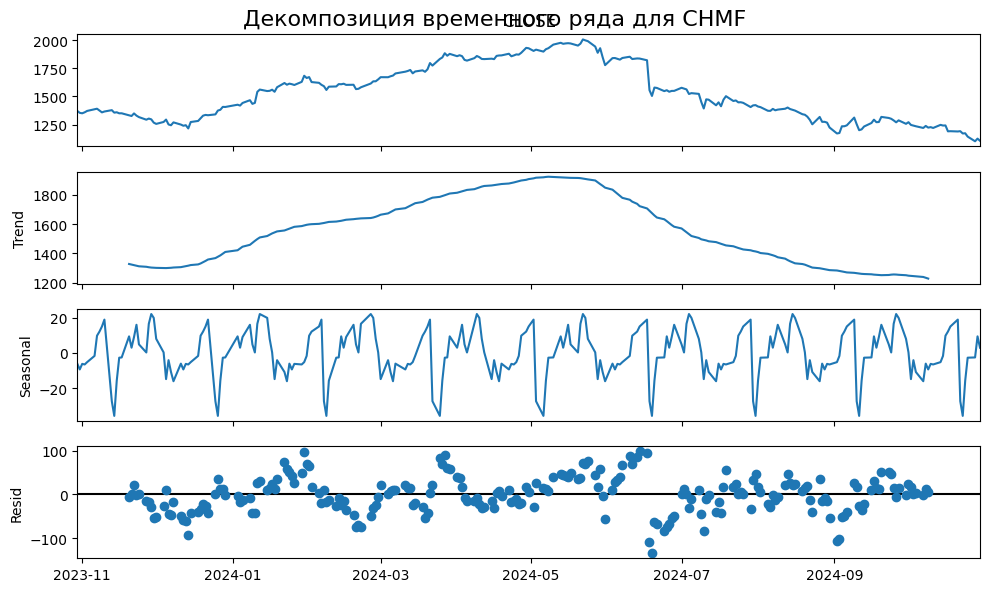

<Figure size 1500x1000 with 0 Axes>

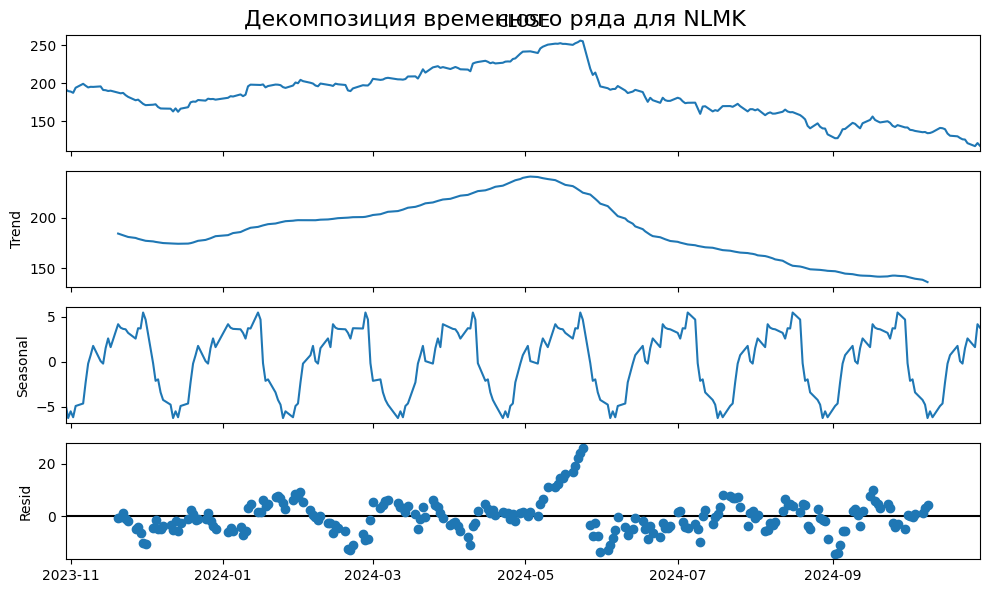

In [103]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

def plot_seasonality(tickers_data, ticker, period=30):
    if ticker not in tickers_data:
        print(f"No data for {ticker}.")
        return

    close_prices = tickers_data[ticker]['CLOSE'].dropna()

    if len(close_prices) < 2 * period:
        print(f"Недостаточно данных для декомпозиции для {ticker}. Необходимо минимум {2 * period} наблюдений.")
        return

    plt.figure(figsize=(15, 10))
    result = seasonal_decompose(close_prices, model='additive', period=period)

    result.plot()
    plt.suptitle(f'Декомпозиция временного ряда для {ticker}', fontsize=16)
    plt.show()

for ticker in top_tickers:
    plot_seasonality(tickers_data, ticker, period=30)


**Выбросы**

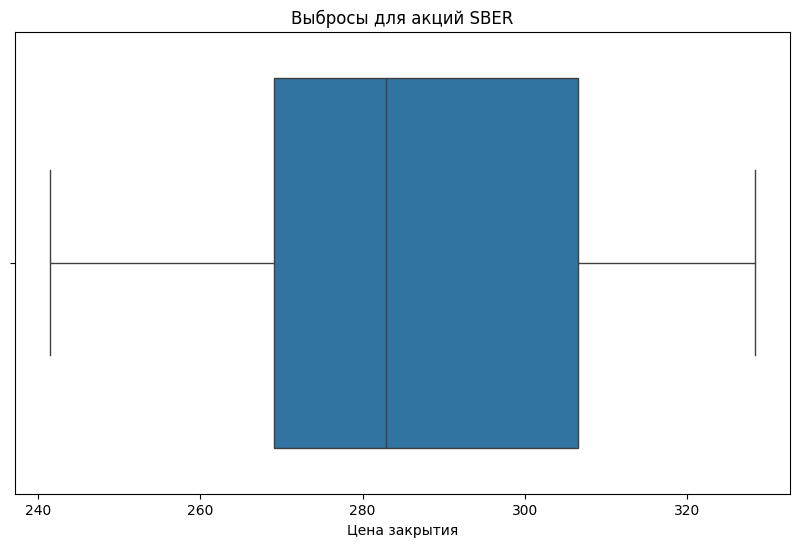

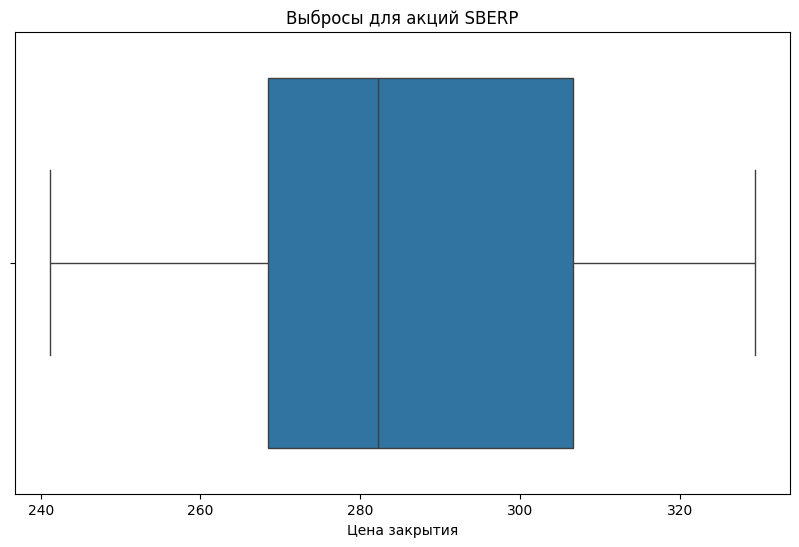

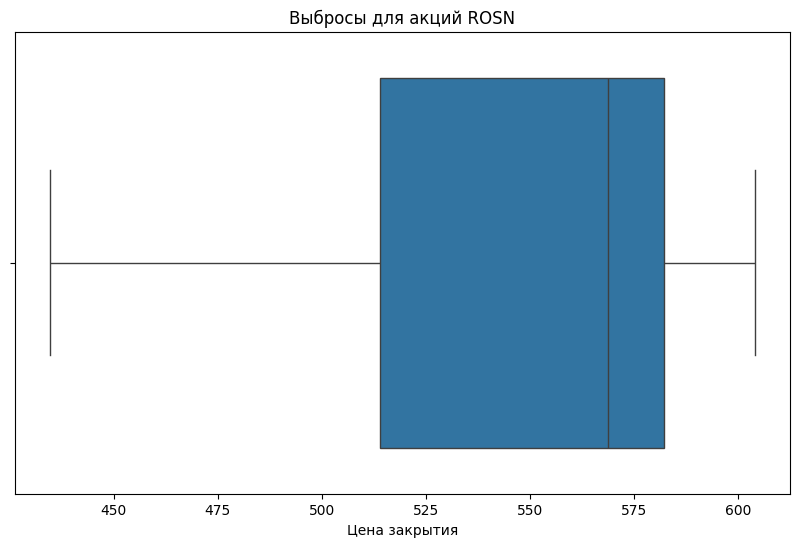

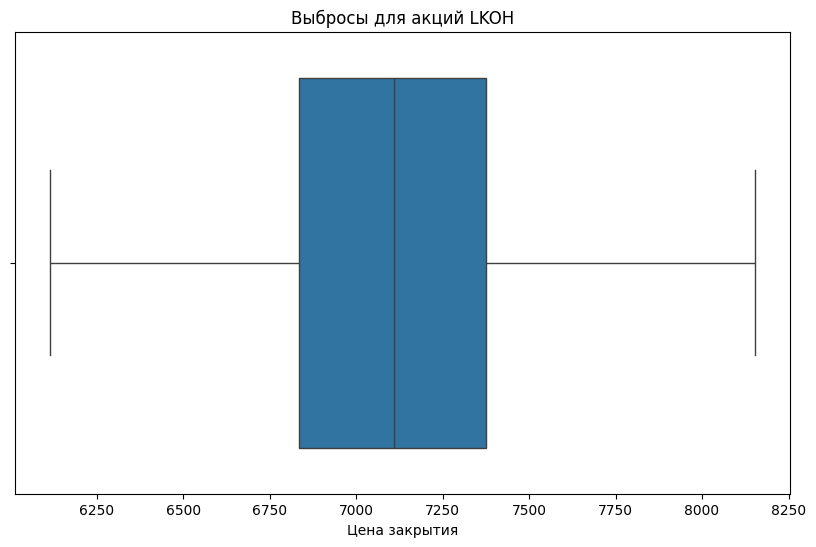

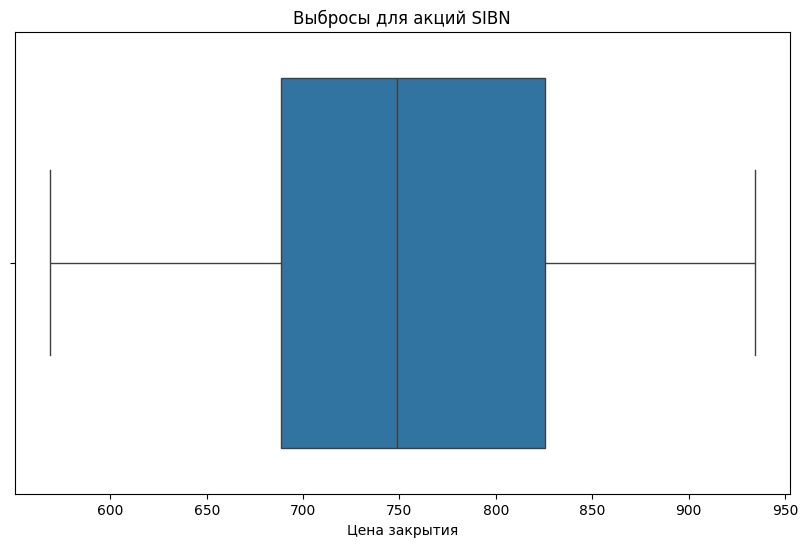

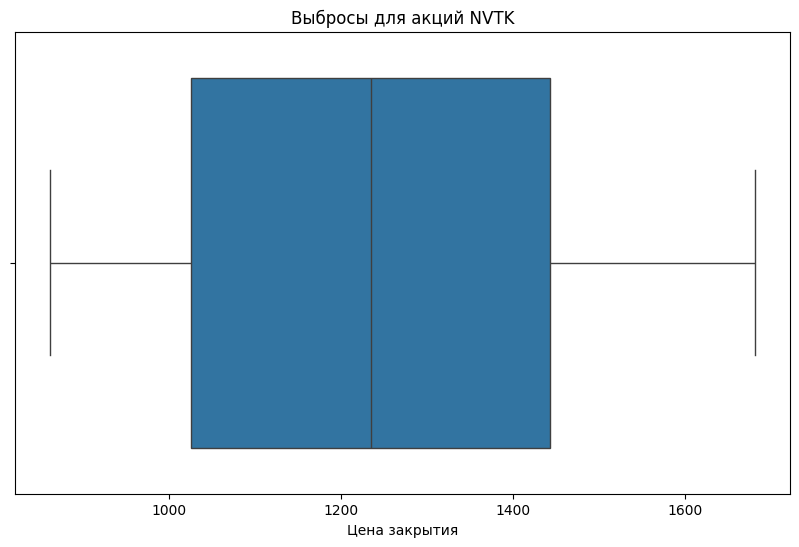

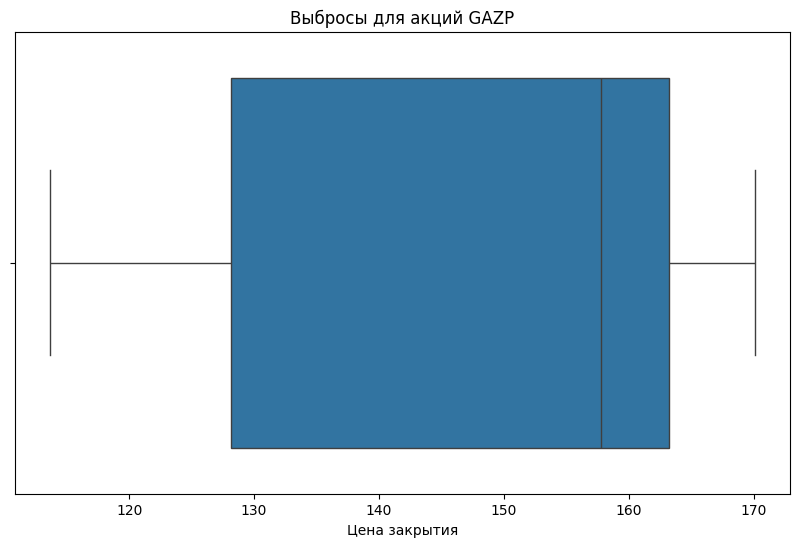

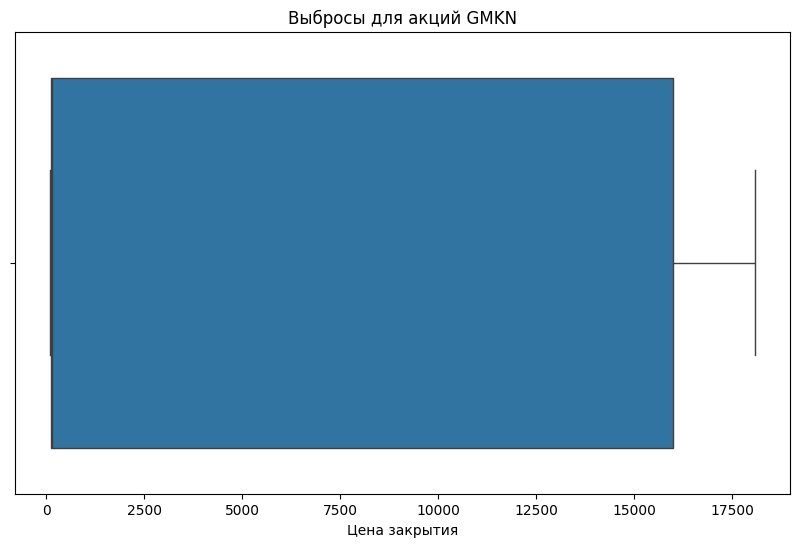

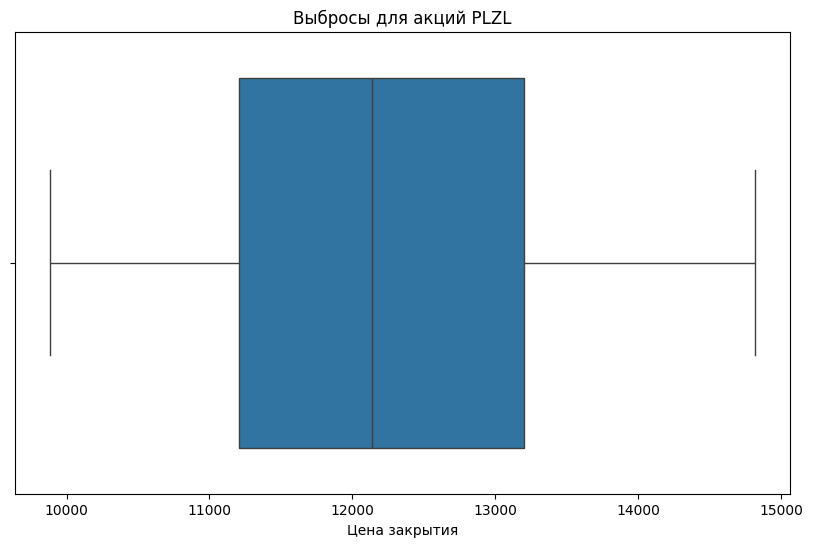

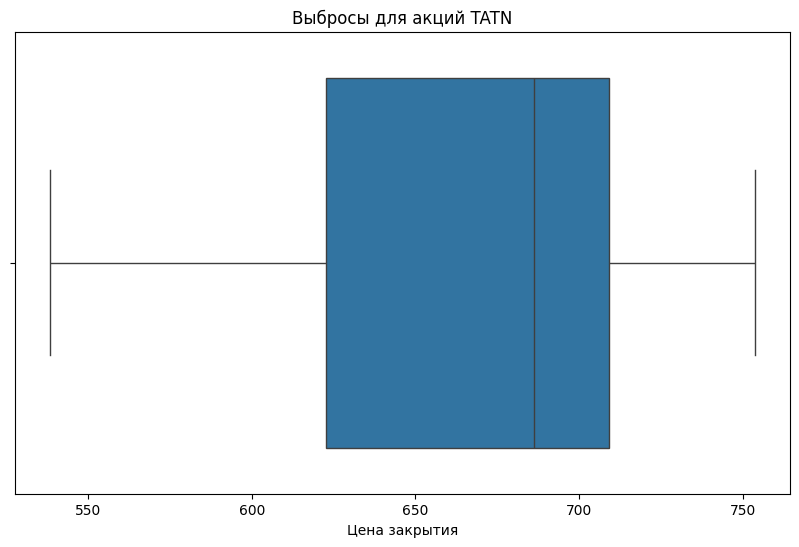

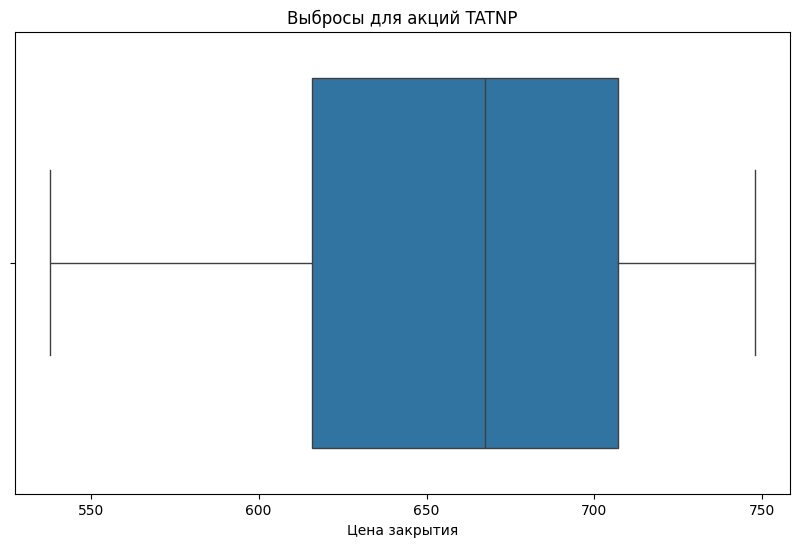

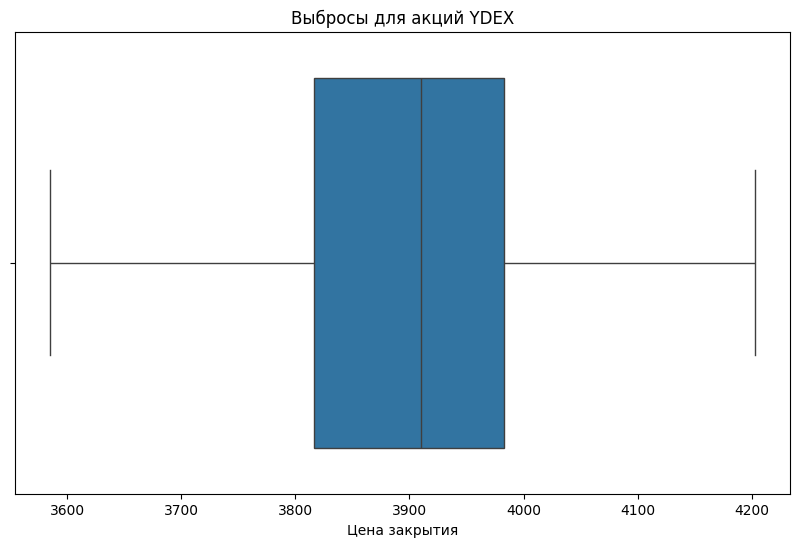

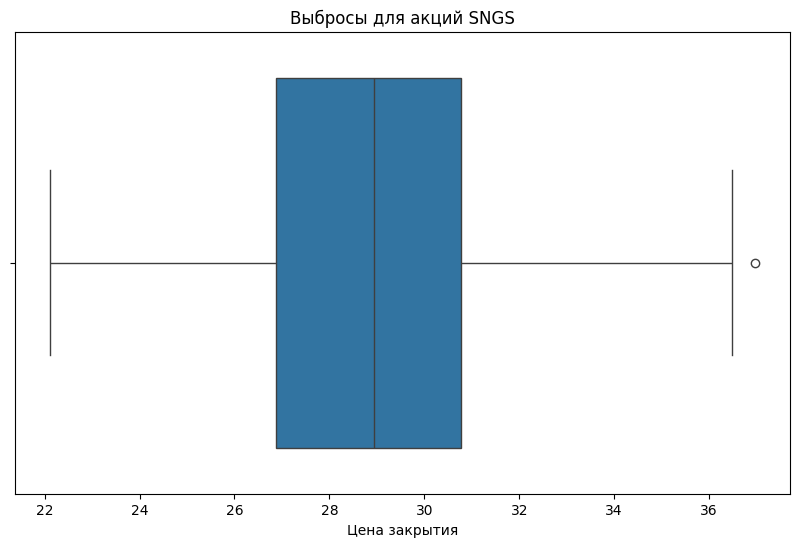

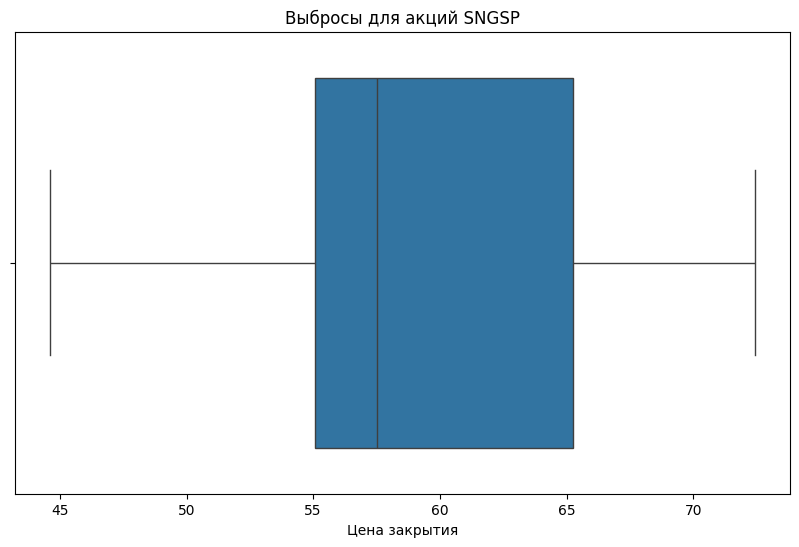

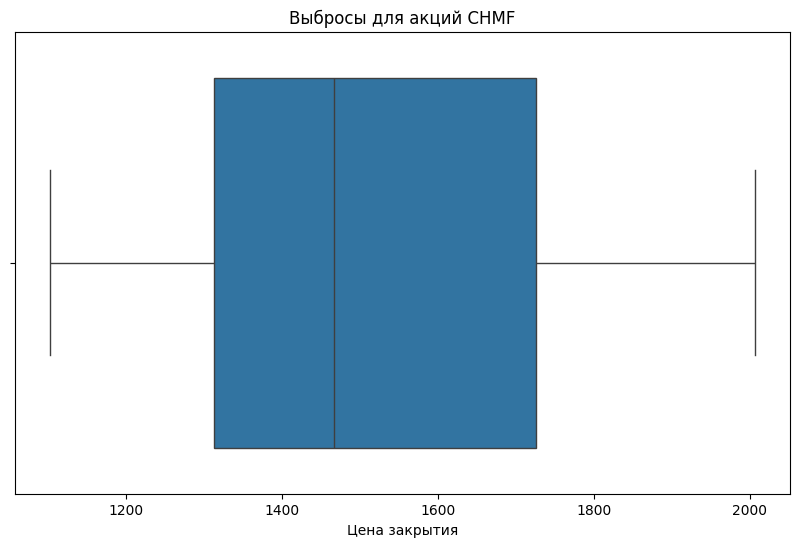

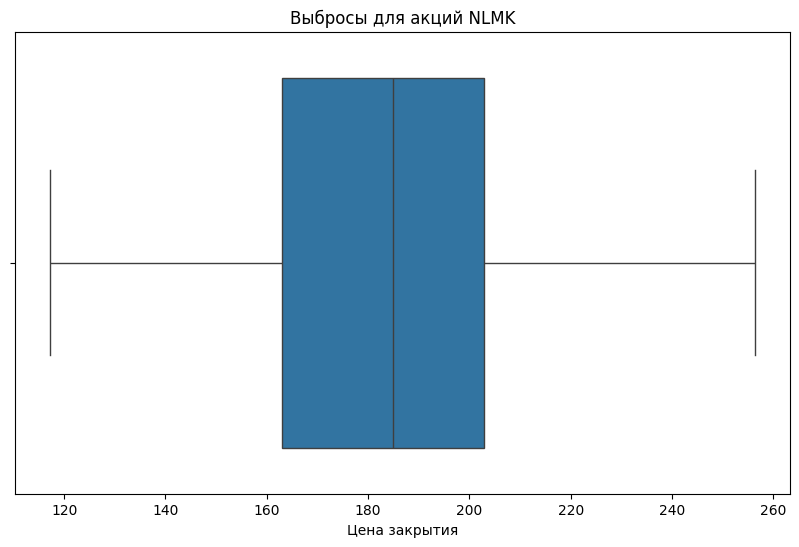

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_outliers(tickers_data, ticker):
    if ticker not in tickers_data:
        print(f"No data for {ticker}.")
        return

    close_prices = tickers_data[ticker]['CLOSE'].dropna()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=close_prices)
    plt.title(f'Выбросы для акций {ticker}')
    plt.xlabel('Цена закрытия')
    plt.show()

for ticker in top_tickers:
    plot_outliers(tickers_data, ticker)


**2.2 Ресэмплирование данных**

Для упрощения анализа трендов можно провести ресэмплирование на недельной основе.

In [36]:
#data.set_index('TRADEDATE', inplace=True)
#weekly_data = data.groupby('TICKER').resample('W').mean().reset_index()

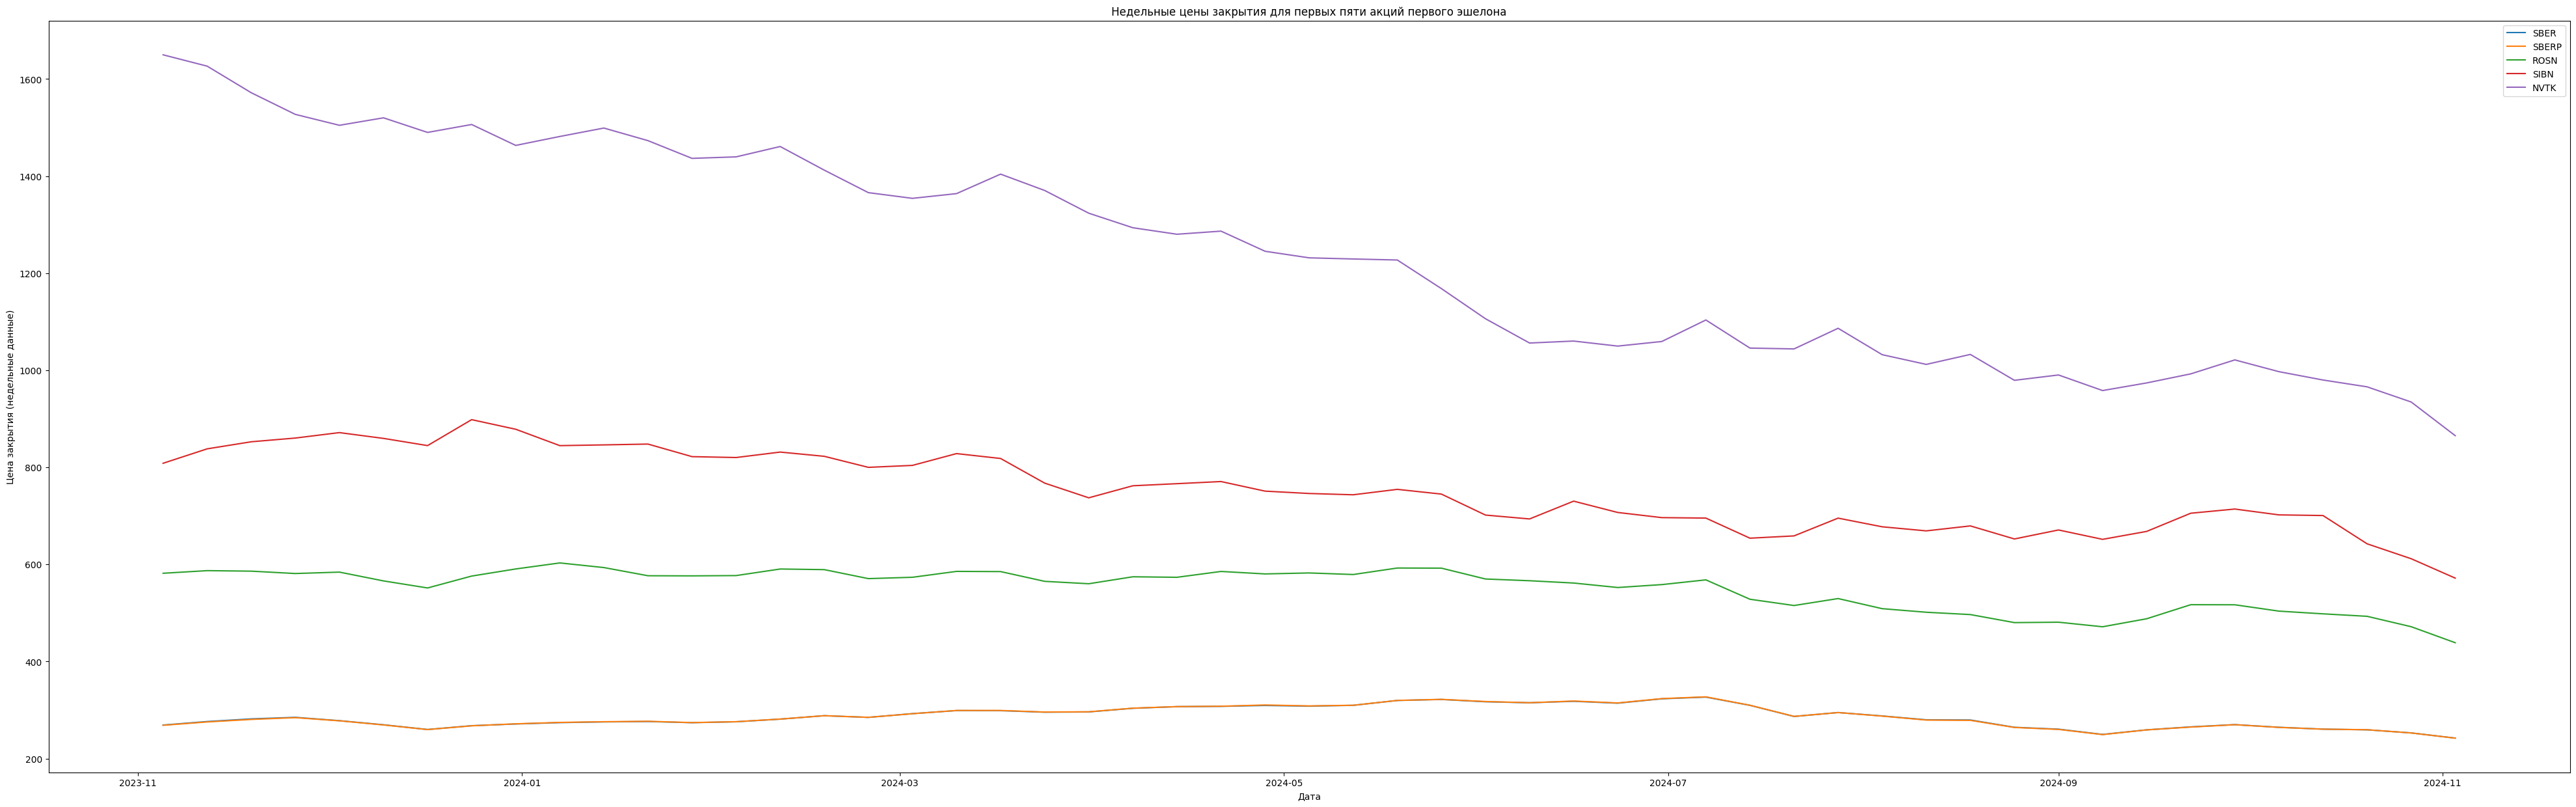

In [162]:
weekly_data = first_tier_data.groupby('TICKER').resample('W').mean().reset_index()

plt.figure(figsize=(50, 15))
for ticker in first_tier_tickers[:5]:
    ticker_data = weekly_data[weekly_data['TICKER'] == ticker]
    plt.plot(ticker_data['TRADEDATE'], ticker_data['CLOSE'], label=ticker)
plt.title('Недельные цены закрытия для первых пяти акций первого эшелона')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия (недельные данные)')
plt.legend()
plt.show()


### 3. Статистические характеристики

**3.1 Основные статистические показатели: медиана, дисперсия и волатильность**

In [50]:
print("Основные статистические показатели:\n", data[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']].describe())

Основные статистические показатели:
                 OPEN           HIGH            LOW          CLOSE  \
count   61427.000000   61427.000000   61427.000000   61427.000000   
mean     2343.490049    2381.416982    2302.517633    2336.842483   
std      8156.296722    8257.001680    8048.401108    8143.095545   
min         0.006682       0.006802       0.006602       0.006682   
25%        12.020000      12.300000      11.735000      11.975000   
50%       133.000000     135.100000     130.200000     132.400000   
75%       844.450000     856.850000     827.700000     841.550000   
max    167000.000000  167950.000000  165550.000000  166850.000000   

             VOLUME  
count  6.308200e+04  
mean   4.021137e+08  
std    6.657310e+09  
min    0.000000e+00  
25%    1.430000e+04  
50%    2.337540e+05  
75%    2.736122e+06  
max    4.615482e+11  


Для всех

In [51]:
ticker_stats = data.groupby('TICKER').agg({
    'CLOSE': ['mean', 'median', 'std', 'min', 'max'],
    'VOLUME': ['mean', 'median', 'std', 'min', 'max']
})
print(ticker_stats)

              CLOSE                                                  VOLUME  \
               mean    median         std       min       max          mean   
TICKER                                                                        
ABIO      97.877821    99.700   11.869624    68.900   122.080  9.048272e+05   
ABRD     255.624903   264.400   33.578118   185.200   312.800  1.739567e+05   
ACKO            NaN       NaN         NaN       NaN       NaN  0.000000e+00   
AFKS      19.676183    18.120    4.100836    12.465    29.829  8.566618e+07   
AFLT      47.412101    49.290    8.425607    34.870    64.400  2.615427e+07   
...             ...       ...         ...       ...       ...           ...   
YRSB    1070.266667  1054.000  219.559884   670.000  1650.000  1.138560e+03   
YRSBP    258.634241   252.000   48.068011   175.000   403.500  3.828716e+03   
ZAYM     184.596831   174.925   26.122673   146.400   243.100  2.502755e+05   
ZILL    3294.377432  3240.000  224.424615  2875.000 

Для первого эшелона

In [63]:
stats = first_tier_data.groupby('TICKER').agg({
    'CLOSE': ['mean', 'median', 'std', 'min', 'max'],
    'VOLUME': ['mean', 'median', 'std', 'min', 'max']
})
print("Статистические характеристики данных:\n", stats)

Статистические характеристики данных:
                CLOSE                                               \
                mean     median          std       min        max   
TICKER                                                              
CHMF     1523.222568   1467.000   244.796035  1102.800   2006.000   
GAZP      146.487626    157.750    18.386198   113.670    170.080   
GMKN     6898.982213    154.440  7948.531235    96.100  18078.000   
LKOH     7115.019455   7109.500   437.668204  6115.000   8152.000   
NLMK      184.381089    185.000    32.297800   117.220    256.300   
NVTK     1237.590661   1235.200   218.355865   862.000   1681.000   
PLZL    12229.558366  12140.000  1183.069453  9885.000  14815.000   
ROSN      551.628599    568.850    40.707404   434.750    604.050   
SBER      286.230623    282.890    21.527522   241.450    328.370   
SBERP     286.224163    282.270    21.735325   241.180    329.400   
SIBN      753.046304    748.900    78.638237   568.750    934.25

1. Цены закрытия (CLOSE)

Сравнение медиан и средних значений:
В большинстве случаев, медианы цен закрытия близки к средним значениям, что указывает на отсутствие сильных выбросов. Однако для акций, таких как GMKN (ГМК Норильский Никель), среднее значение значительно выше медианы, что свидетельствует о наличии экстремально высоких цен в данных (выбросы).

Волатильность (стандартное отклонение):
GMKN демонстрирует наивысшую волатильность (7948.53), что может говорить о значительных колебаниях в цене акций. Это может быть связано с высокой чувствительностью к внешним факторам, таким как изменение цен на металлы.
LKOH и PLZL также показывают высокие значения стандартного отклонения (437.67 и 1183.07 соответственно), что может указывать на значительную неопределенность и возможность больших изменений в ценах.

Минимальные и максимальные значения:
GMKN имеет самый широкий диапазон (от 96.1 до 18078.0), что подтверждает его высокую волатильность. В то же время, акции с меньшими колебаниями, такие как SNGS (от 22.115 до 36.960), показывают более стабильные цены.

2. Объемы торгов (VOLUME)

Общие объемы торгов:
Акции SBER и SNGS имеют наиболее высокие средние объемы торгов (36,579,180 и 51,300,970 соответственно), что может свидетельствовать о высокой ликвидности этих активов.
В то же время, такие акции как PLZL и TATNP показывают значительно меньшие объемы (148,263 и 571,657 соответственно), что может указывать на их низкую ликвидность.

Разброс объемов:
GAZP и SBER демонстрируют большой разброс между минимальными и максимальными объемами торгов (от 4,488,930 до 296,528,780 для GAZP), что может говорить о том, что объем торгов зависит от различных факторов, таких как новости и экономические события.

3. Общие выводы

Выбросы и волатильность:
Некоторые акции имеют значительные выбросы (особенно GMKN), что требует дополнительного внимания при анализе. Это может указывать на необходимость применения более продвинутых методов анализа временных рядов для учета этих выбросов.

Рынок и ликвидность:
Акции с высокой ликвидностью (такие как SBER и SNGS) могут быть более привлекательными для краткосрочных инвесторов, в то время как менее ликвидные активы могут быть интересны для долгосрочных стратегий.

Необходимость дальнейшего анализа:
Дальнейшие шаги могут включать оценку корреляции между активами, анализ сезонных эффектов и стационарности, чтобы глубже понять динамику и риски, связанные с этими акциями. Сравнительный анализ с макроэкономическими показателями может также помочь в выявлении факторов, влияющих на поведение этих акций.

**Анализ волатильности:**

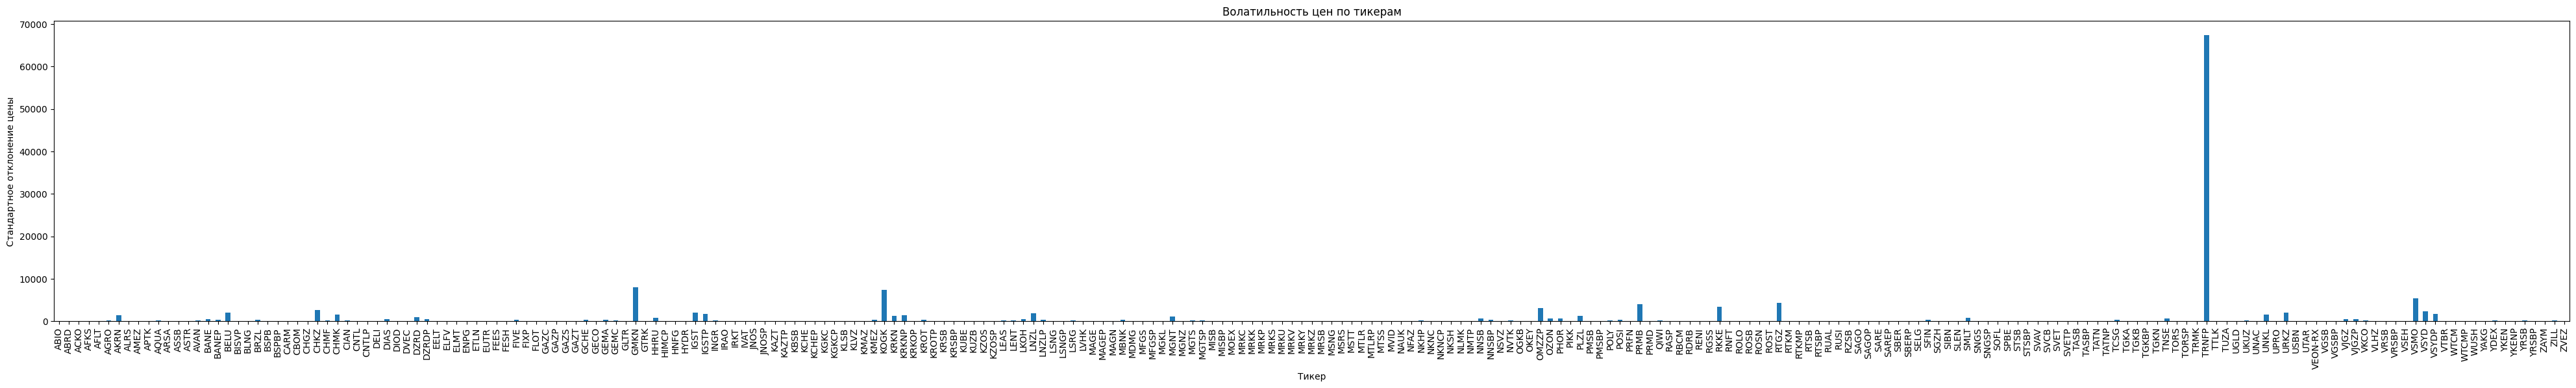

In [52]:
volatility = data.groupby('TICKER')['CLOSE'].std()
plt.figure(figsize=(50, 6))
volatility.plot(kind='bar')
plt.title('Волатильность цен по тикерам')
plt.xlabel('Тикер')
plt.ylabel('Стандартное отклонение цены')
plt.show()

Первый эшелон

In [80]:
volatility_data = first_tier_data.groupby('TICKER')['CLOSE'].std().reset_index()
volatility_data.columns = ['TICKER', 'Volatility']

In [81]:
volatility_data = volatility_data.sort_values(by='Volatility', ascending=False)
print("Таблица волатильности акций первого эшелона:\n", volatility_data)

Таблица волатильности акций первого эшелона:
    TICKER   Volatility
2    GMKN  7948.531235
6    PLZL  1183.069453
3    LKOH   437.668204
0    CHMF   244.796035
5    NVTK   218.355865
15   YDEX   140.937597
10   SIBN    78.638237
14  TATNP    50.110736
13   TATN    49.625226
7    ROSN    40.707404
4    NLMK    32.297800
9   SBERP    21.735325
8    SBER    21.527522
1    GAZP    18.386198
12  SNGSP     6.817593
11   SNGS     3.074158


<ipython-input-82-a9c14ca50b62>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=volatility_data, x='TICKER', y='Volatility', palette="viridis")


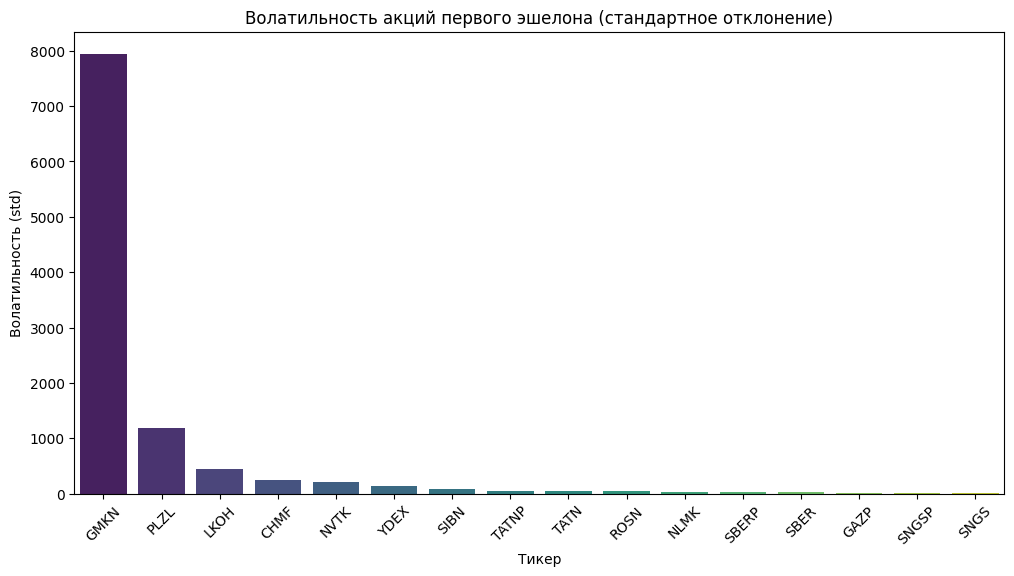

In [82]:
plt.figure(figsize=(12, 6))
sns.barplot(data=volatility_data, x='TICKER', y='Volatility', palette="viridis")
plt.title('Волатильность акций первого эшелона (стандартное отклонение)')
plt.xlabel('Тикер')
plt.ylabel('Волатильность (std)')
plt.xticks(rotation=45)
plt.show()

Акции с более высокой волатильностью могут быть более рискованными, что нужно учитывать при прогнозировании.

Высокая волатильность GMKN:
GMKN (ГМК «Норильский никель») показал наибольшую волатильность среди всех акций первого эшелона с показателем 7948.53.

Разница в волатильности:
Следующей по уровню волатильности является PLZL (ПАО «Полюс») с 1183.07, что также указывает на значительные колебания цен, однако значительно ниже, чем у GMKN.
Акции, такие как LKOH (Лукойл) и CHMF (ЧМК), имеют волатильность в диапазоне от 244.80 до 437.67. Это означает, что эти компании также могут подвергаться колебаниям, но в меньшей степени по сравнению с GMKN и PLZL.

Низкая волатильность SNGS и SNGSP:
Акции SNGS (Сургутнефтегаз) и SNGSP имеют самую низкую волатильность, всего 3.07 и 6.82 соответственно. Это может свидетельствовать о более стабильных ценах и меньшей чувствительности к рыночным колебаниям, что может быть характерно для более крупных и устойчивых компаний.

Наличие средневолатильных акций:
Остальные компании, такие как NLMK, SBER и GAZP, показывают среднюю волатильность, что может указывать на более предсказуемое поведение цен на их акции.


**3.2 Корреляция между активами**

КОрреляция между активами первого эшелона

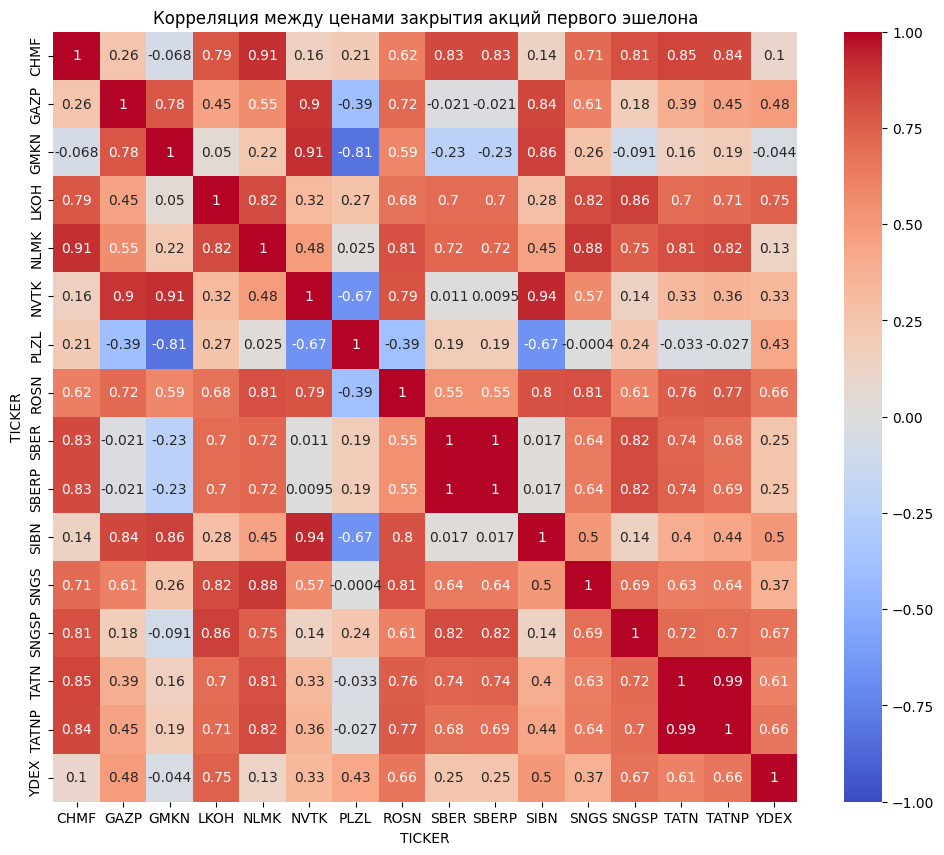

In [64]:
first_tier_close_prices = first_tier_data.pivot_table(index='TRADEDATE', columns='TICKER', values='CLOSE')
correlation_matrix = first_tier_close_prices.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Корреляция между ценами закрытия акций первого эшелона')
plt.show()

In [78]:
first_tier_close_prices = first_tier_data.pivot_table(index='TRADEDATE', columns='TICKER', values='CLOSE')
correlation_table = first_tier_close_prices.corr()

In [79]:
print("Таблица коэффициентов корреляции между акциями первого эшелона:")
correlation_table

Таблица коэффициентов корреляции между акциями первого эшелона:


TICKER      CHMF      GAZP      GMKN      LKOH      NLMK      NVTK      PLZL  \
TICKER                                                                         
CHMF    1.000000  0.257458 -0.068335  0.785643  0.907182  0.157201  0.207201   
GAZP    0.257458  1.000000  0.783418  0.449866  0.554942  0.897382 -0.391478   
GMKN   -0.068335  0.783418  1.000000  0.049606  0.218894  0.909512 -0.814581   
LKOH    0.785643  0.449866  0.049606  1.000000  0.822880  0.319226  0.265500   
NLMK    0.907182  0.554942  0.218894  0.822880  1.000000  0.484944  0.025028   
NVTK    0.157201  0.897382  0.909512  0.319226  0.484944  1.000000 -0.665755   
PLZL    0.207201 -0.391478 -0.814581  0.265500  0.025028 -0.665755  1.000000   
ROSN    0.618111  0.715557  0.587057  0.675758  0.808263  0.792979 -0.389985   
SBER    0.830320 -0.021080 -0.227665  0.697585  0.722111  0.011171  0.187551   
SBERP   0.833355 -0.020866 -0.228371  0.699092  0.722798  0.009512  0.188282   
SIBN    0.144293  0.841718  0.861878  0.280638  0.446620  0.937162 -0.670495   
SNGS    0.706764  0.610872  0.258458  0.824384  0.882997  0.572567 -0.000396   
SNGSP   0.811542  0.180241 -0.090913  0.864395  0.752020  0.141211  0.240402   
TATN    0.845007  0.389876  0.159146  0.699504  0.812431  0.327689 -0.032532   
TATNP   0.839636  0.451947  0.194772  0.705729  0.823070  0.361863 -0.026855   
YDEX    0.100672  0.484949 -0.044486  0.745431  0.126787  0.329995  0.425267   

TICKER      ROSN      SBER     SBERP      SIBN      SNGS     SNGSP      TATN  \
TICKER                                                                         
CHMF    0.618111  0.830320  0.833355  0.144293  0.706764  0.811542  0.845007   
GAZP    0.715557 -0.021080 -0.020866  0.841718  0.610872  0.180241  0.389876   
GMKN    0.587057 -0.227665 -0.228371  0.861878  0.258458 -0.090913  0.159146   
LKOH    0.675758  0.697585  0.699092  0.280638  0.824384  0.864395  0.699504   
NLMK    0.808263  0.722111  0.722798  0.446620  0.882997  0.752020  0.812431   
NVTK    0.792979  0.011171  0.009512  0.937162  0.572567  0.141211  0.327689   
PLZL   -0.389985  0.187551  0.188282 -0.670495 -0.000396  0.240402 -0.032532   
ROSN    1.000000  0.545029  0.545649  0.801794  0.809070  0.611767  0.764938   
SBER    0.545029  1.000000  0.999799  0.017483  0.642375  0.821039  0.737818   
SBERP   0.545649  0.999799  1.000000  0.016631  0.640452  0.823587  0.743363   
SIBN    0.801794  0.017483  0.016631  1.000000  0.504035  0.136611  0.398412   
SNGS    0.809070  0.642375  0.640452  0.504035  1.000000  0.688297  0.631530   
SNGSP   0.611767  0.821039  0.823587  0.136611  0.688297  1.000000  0.715960   
TATN    0.764938  0.737818  0.743363  0.398412  0.631530  0.715960  1.000000   
TATNP   0.771253  0.684194  0.690015  0.435076  0.637010  0.699026  0.992839   
YDEX    0.663832  0.248395  0.251964  0.504042  0.369642  0.674530  0.612152   

TICKER     TATNP      YDEX  
TICKER                      
CHMF    0.839636  0.100672  
GAZP    0.451947  0.484949  
GMKN    0.194772 -0.044486  
LKOH    0.705729  0.745431  
NLMK    0.823070  0.126787  
NVTK    0.361863  0.329995  
PLZL   -0.026855  0.425267  
ROSN    0.771253  0.663832  
SBER    0.684194  0.248395  
SBERP   0.690015  0.251964  
SIBN    0.435076  0.504042  
SNGS    0.637010  0.369642  
SNGSP   0.699026  0.674530  
TATN    0.992839  0.612152  
TATNP   1.000000  0.661467  
YDEX    0.661467  1.000000

**Выводы из таблицы корреляций для акций первого эшелона**
1. Высокая корреляция среди акций в пределах одной отрасли:

* SBER и SBERP (превелигированные акции) имеют практически идеальную корреляцию (0.9998), что ожидаемо, так как их ценовое поведение тесно связано.
* TATN и TATNP также демонстрируют очень высокую корреляцию (0.9928), что объясняется аналогичной динамикой между обычными и превелигированными акциями одного эмитента.

2. Сильная положительная корреляция среди энергетических и нефтяных компаний:

Акции таких компаний, как ROSN (Роснефть), TATN (Татнефть), LKOH (Лукойл), демонстрируют высокие коэффициенты корреляции друг с другом (например, ROSN и TATN имеют корреляцию 0.7649).
Это говорит о том, что активы реагируют схожим образом на внешние факторы, такие как изменение цен на нефть, санкции и макроэкономическую политику.

3. Металлургия и сырьевые компании:

Компании металлургического сектора также демонстрируют высокую корреляцию: CHMF (Северсталь) и NLMK (НЛМК) коррелируют на уровне 0.9071. Это связано с общими рыночными факторами и состоянием металлургической отрасли.
GMKN (Норникель) выделяется среди других, показывая меньшую корреляцию с металлургическими компаниями, возможно, из-за диверсификации и специфики своих операций в добыче редких металлов, что отличает её от других активов сектора.

4. Слабая или отрицательная корреляция у золота и IT-сектора:

PLZL (Полюс) — компания, занимающаяся добычей золота, демонстрирует слабую или отрицательную корреляцию с большинством других акций. Это объясняется тем, что золото обычно является "защитным активом", чьи цены могут повышаться в периоды рыночной нестабильности, тогда как другие активы падают.
YDEX (Яндекс) показывает низкие уровни корреляции с сырьевыми компаниями и финансовыми секторами. Как компания в секторе технологий, YDEX реагирует на другие рыночные драйверы, такие как развитие интернет-рынка и спрос на цифровые услуги.

5. Факторы глобального и макроэкономического влияния:

Высокая корреляция между многими активами, такими как ROSN, GAZP (Газпром), и другими крупными компаниями, свидетельствует о том, что российские акции сильно зависят от макроэкономических факторов и геополитической ситуации.
Секторные и межотраслевые взаимосвязи также говорят о том, что акции, тесно коррелирующие с нефтяными и металлургическими активами, подвержены глобальным колебаниям, связанным с изменением цен на сырьевые товары и нефть.

Резюме
* Группы активов: Акции можно условно разделить на группы по степени корреляции, что может быть полезно при выборе активов для диверсификации портфеля.
* Независимые активы: PLZL и YDEX могут рассматриваться как частично независимые активы из-за их низкой корреляции с большинством других акций, что может быть полезно для хеджирования портфеля.
*  Моделирование и прогноз: При моделировании и прогнозировании необходимо учитывать высокую корреляцию между некоторыми активами, так как их поведение сильно взаимосвязано, а также можно сократить количество переменных, исключив тесно коррелирующие активы.

### 4. Специальные тесты TS

**4.1 Тест на стационарность (ADF)** тест Дики-Фуллера (ADF) для оценки стационарности временных рядов.

Тикеры первого эшелона

топ 5

In [66]:
from statsmodels.tsa.stattools import adfuller

adf_results = {}
for ticker in first_tier_tickers[:5]:
    ticker_data = first_tier_close_prices[ticker].dropna()
    adf_test = adfuller(ticker_data)
    adf_results[ticker] = adf_test[1]

print("Результаты ADF-теста (p-value):\n", adf_results)

Результаты ADF-теста (p-value):
 {'SBER': 0.8801524867412315, 'SBERP': 0.8901282079273445, 'ROSN': 0.9463482237756178, 'SIBN': 0.9592365044457709, 'NVTK': 0.7872673288663258}


Все

In [65]:
from statsmodels.tsa.stattools import adfuller

stationarity_results = {}
for ticker in top_tickers:
    ticker_data = data[data['TICKER'] == ticker]['CLOSE'].dropna()
    adf_result = adfuller(ticker_data)
    stationarity_results[ticker] = adf_result[1]

print("Результаты ADF-теста (p-value):")
print(stationarity_results)


Результаты ADF-теста (p-value):
{'SBER': 0.8801524867412315, 'SBERP': 0.8901282079273445, 'ROSN': 0.9463482237756178, 'LKOH': 0.503651505567719, 'SIBN': 0.9592365044457709, 'NVTK': 0.7872673288663258, 'GAZP': 0.7613123700157141, 'GMKN': 0.6618107813414544, 'PLZL': 0.821281152489131, 'TATN': 0.8725695992375556, 'TATNP': 0.7609675408643066, 'YDEX': 0.19887365226791065, 'SNGS': 0.709057690640108, 'SNGSP': 0.564426957035334, 'CHMF': 0.9216136618996348, 'NLMK': 0.9372089144541879}


Случайные тикеры

In [15]:
from statsmodels.tsa.stattools import adfuller


stationarity_results = {}
for ticker in sample_tickers:
    ticker_data = data[data['TICKER'] == ticker]['CLOSE']
    adf_result = adfuller(ticker_data.dropna())
    stationarity_results[ticker] = adf_result[1]  # p-value

print("Результаты ADF-теста (p-value):")
print(stationarity_results)

Результаты ADF-теста (p-value):
{'SVET': 0.6336343476708485, 'BSPBP': 0.01738105219045725, 'VSYDP': 0.40567479920982524, 'NAUK': 0.7189676757825838, 'POSI': 0.7321016518840651}


Тест Дики-Фуллера оценивает гипотезу о наличии единичного корня, что указывает на нестационарность временного ряда. Результат теста ADF предоставляет p-value, которое интерпретируется следующим образом:

Если p-value < 0.05, гипотеза о нестационарности отвергается, и ряд считается стационарным.
Если p-value > 0.05, гипотезу о нестационарности отвергнуть не удаётся, и ряд считается нестационарным.

**Вывод:** Все тикеры, кроме YDEX, имеют p-value > 0.05, что указывает на нестационарность этих временных рядов. Для нестационарных временных рядов с таким результатом часто требуется дополнительная обработка для приведения к стационарности.
YDEX имеет p-value = 0.1989, что указывает на более низкий уровень нестационарности, но ряд также не является уверенно стационарным (p-value все еще больше 0.05, но заметно ниже остальных). Это может указывать на некоторые устойчивые временные характеристики, но с точки зрения строгого подхода, этот ряд также требует стационаризации.

Нестационарность рядов: Большинство временных рядов акций нестационарны, что можно объяснить общим трендом роста или снижения в их ценах, сезонностью и другими факторами.

Приведение к стационарности: Для дальнейшего анализа и моделирования временных рядов, особенно с применением моделей ARIMA или SARIMA, необходимо привести ряды к стационарному виду. Для этого можно использовать методы, такие как:

* Первое разностное преобразование: Вычитание значения предыдущего периода (лаг=1) из текущего значения (то есть y_t - y_(t-1)).

* Логарифмическое преобразование и разностное преобразование для случаев, когда присутствуют экспоненциальные тренды.

* Анализ стационарных и нестационарных характеристик: Нестационарные ряды также могут быть полезны для анализа долгосрочных тенденций, в то время как стационарные компоненты можно использовать для краткосрочных прогнозов.

4.2 Автокорреляция и частичная автокорреляция (ACF/PACF)

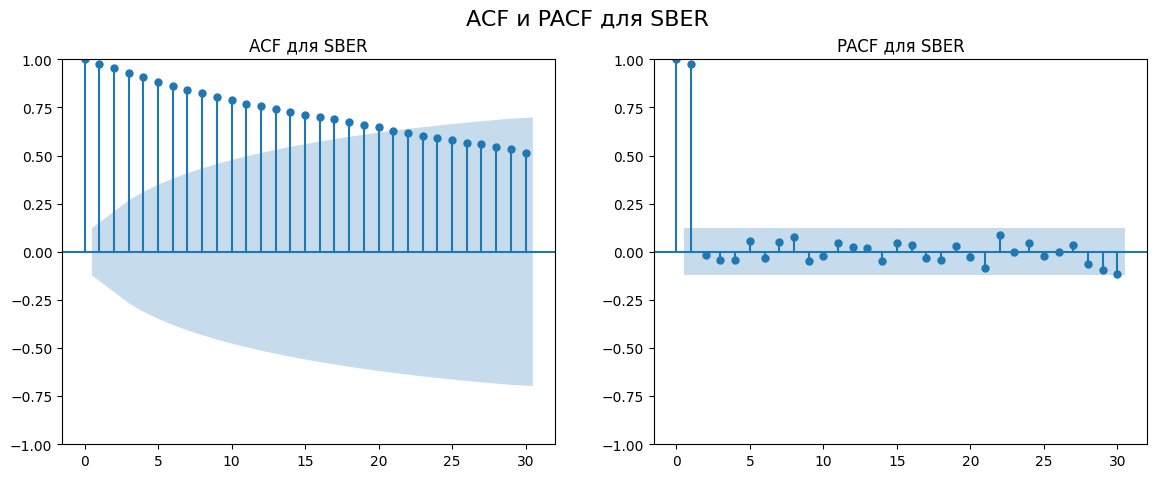

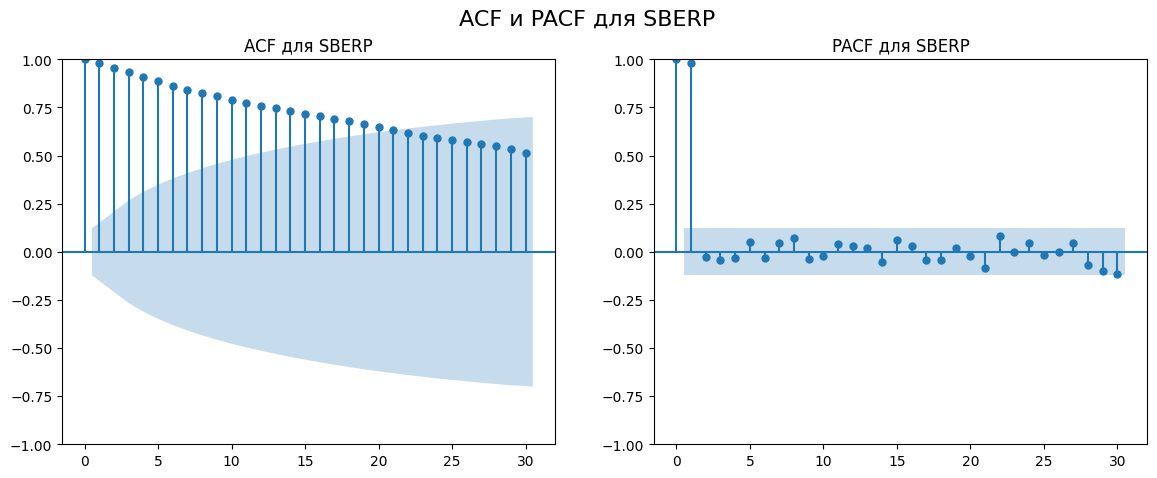

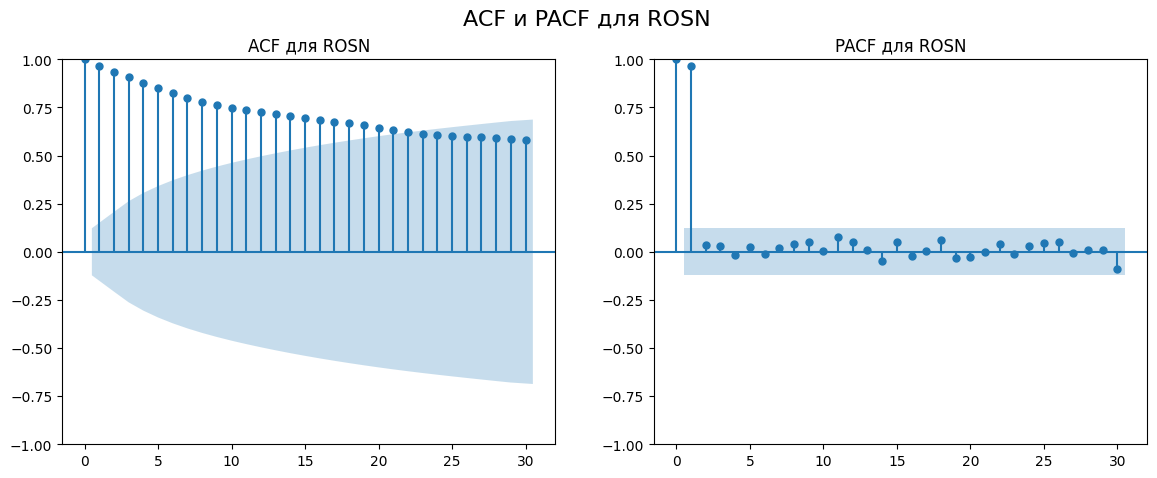

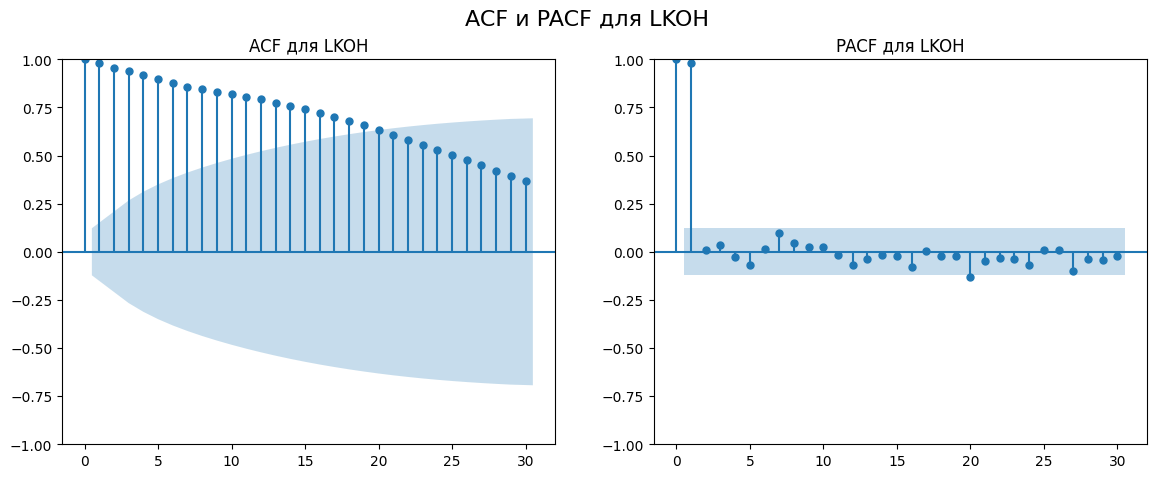

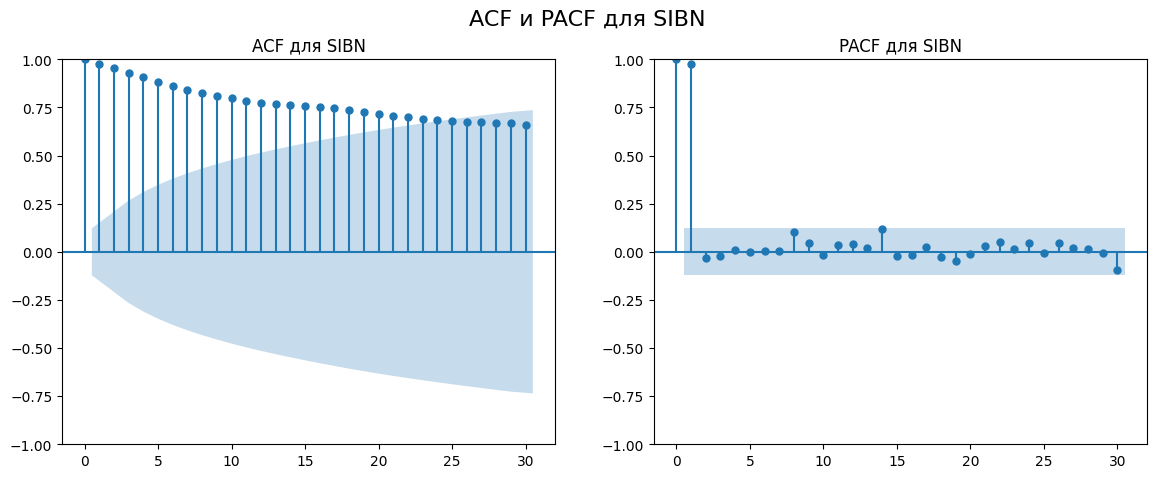

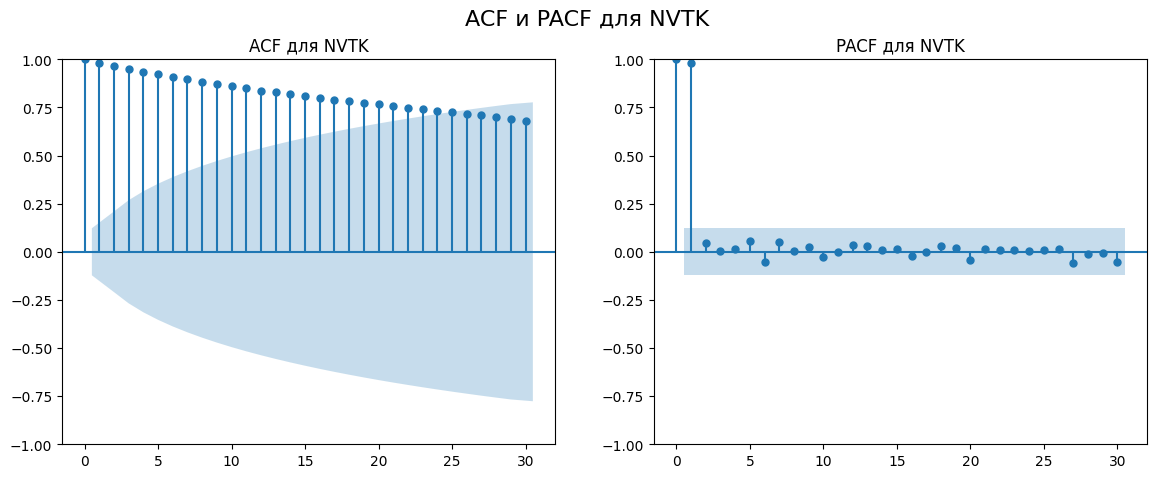

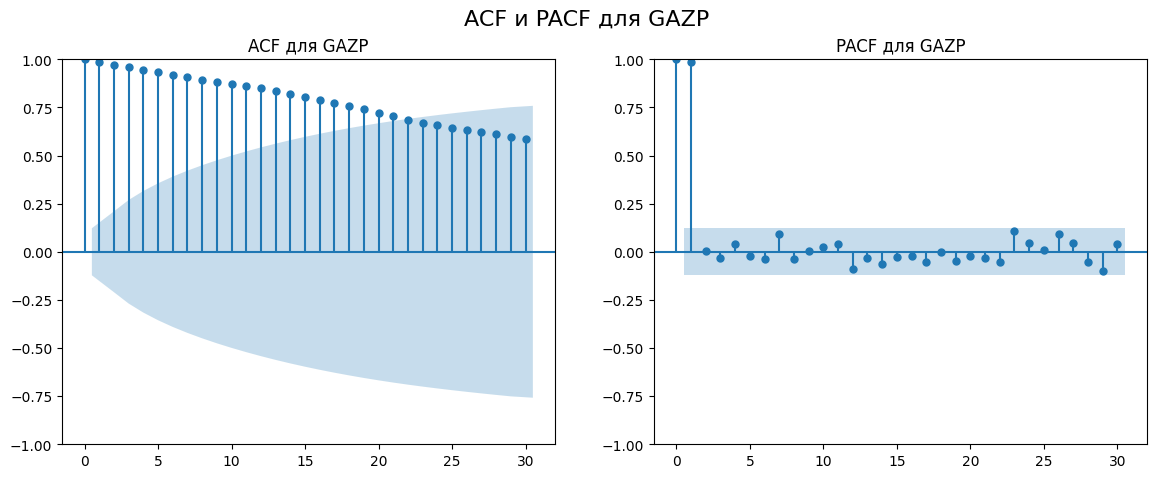

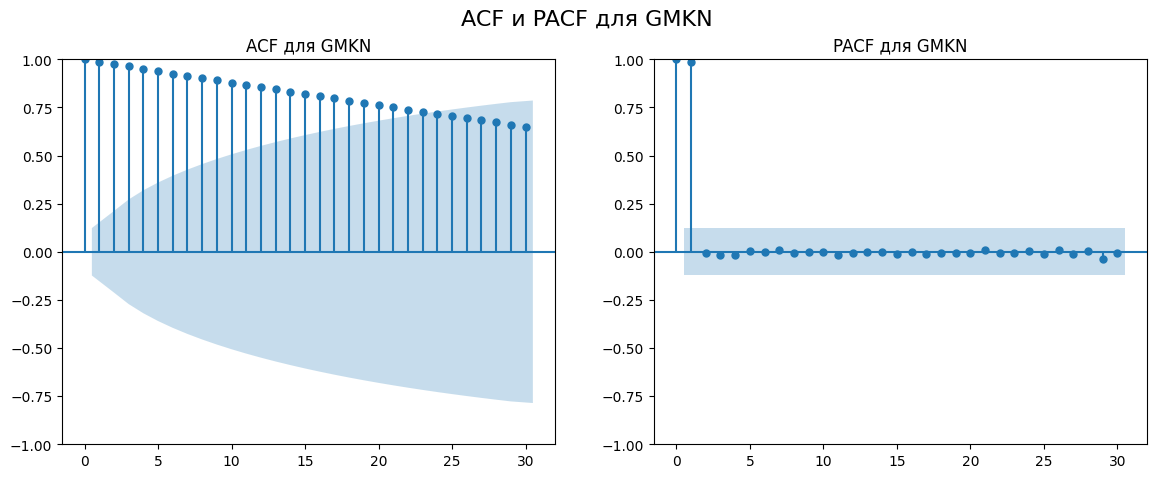

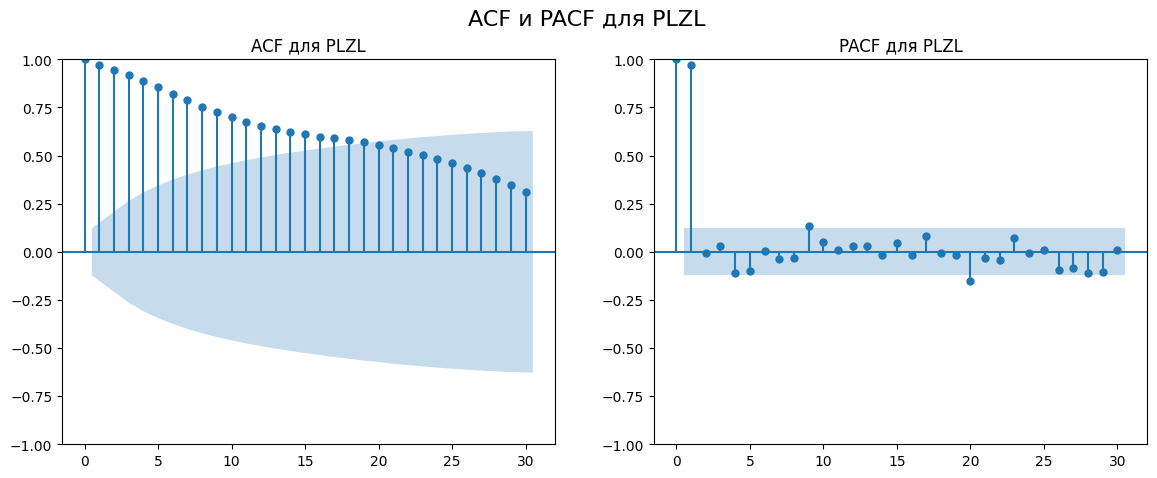

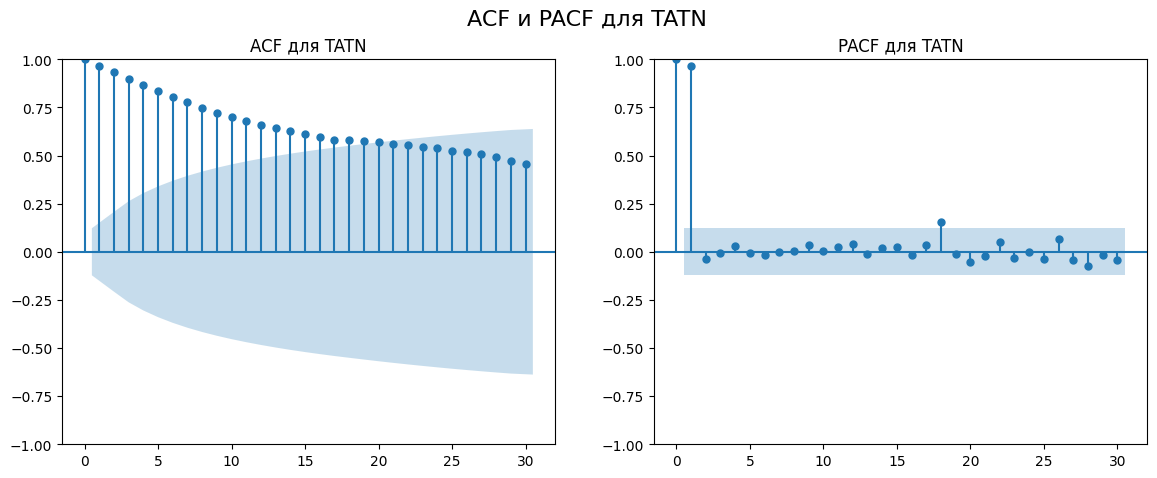

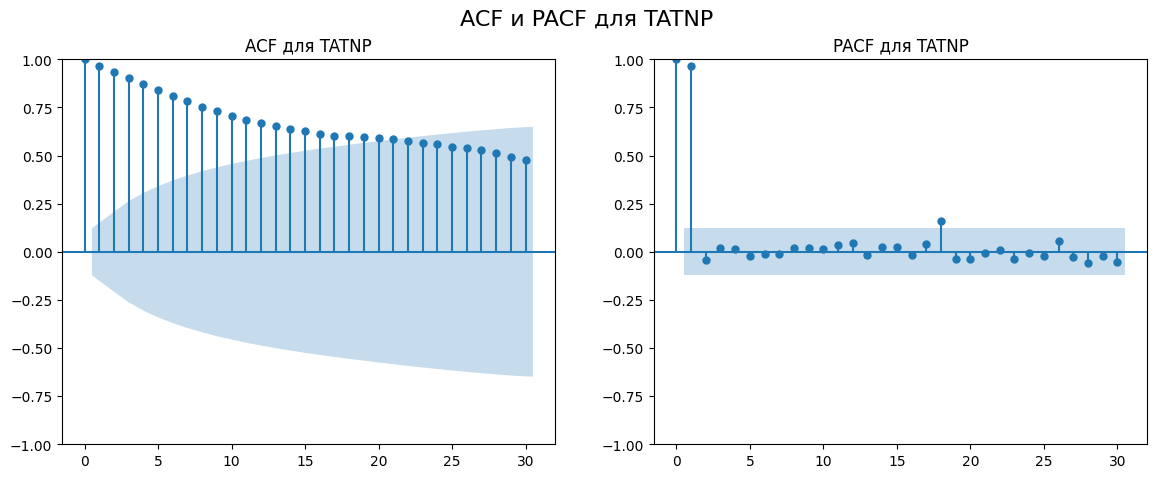

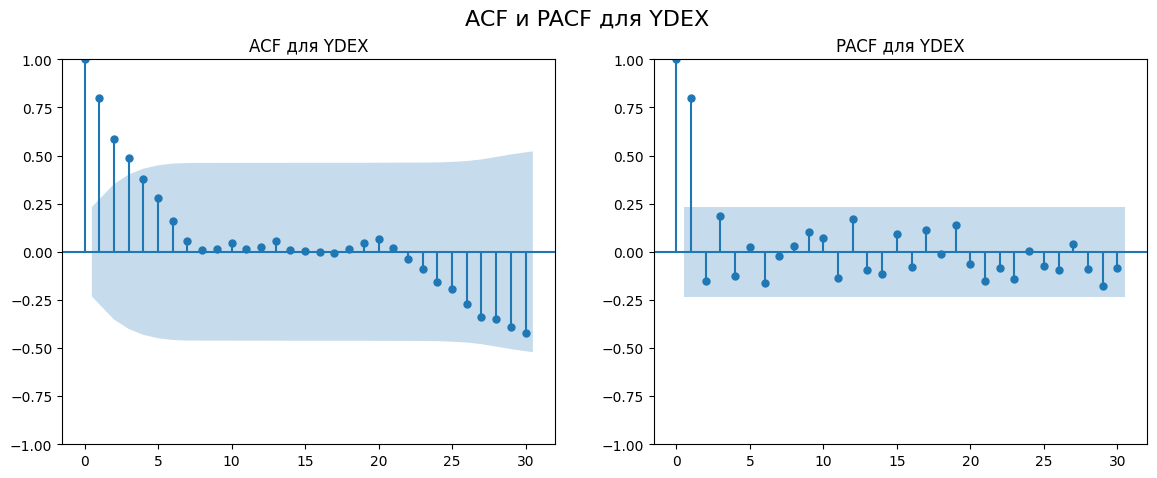

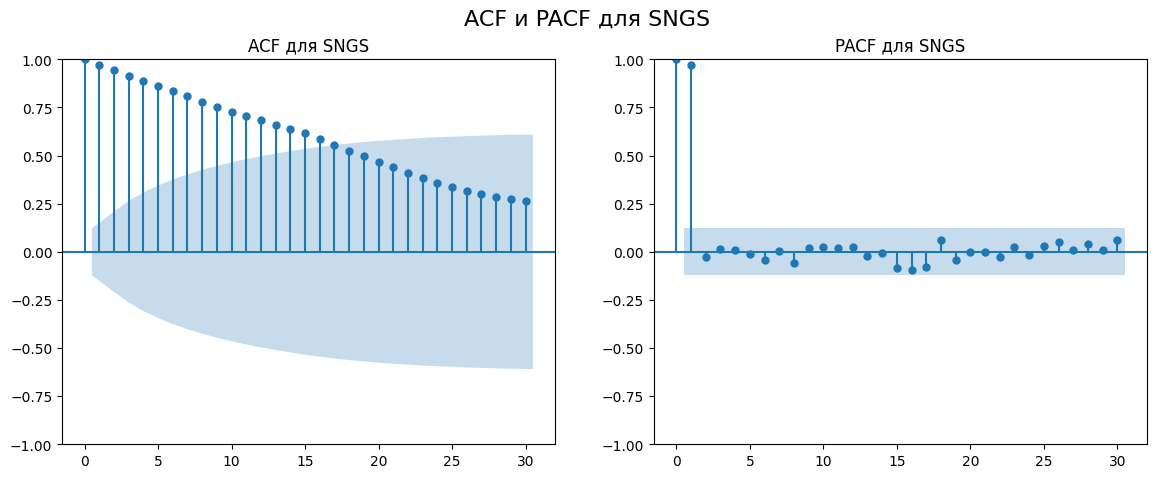

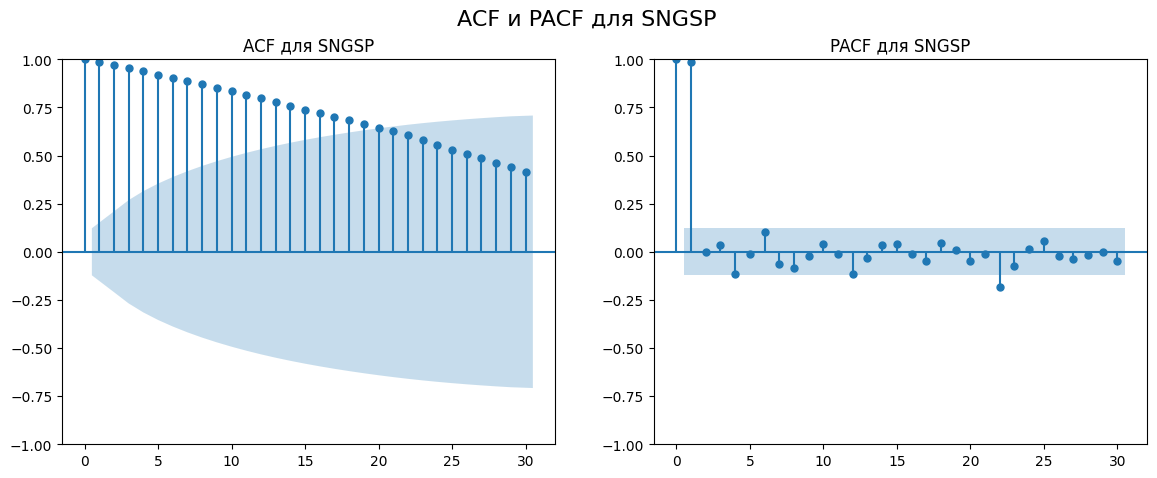

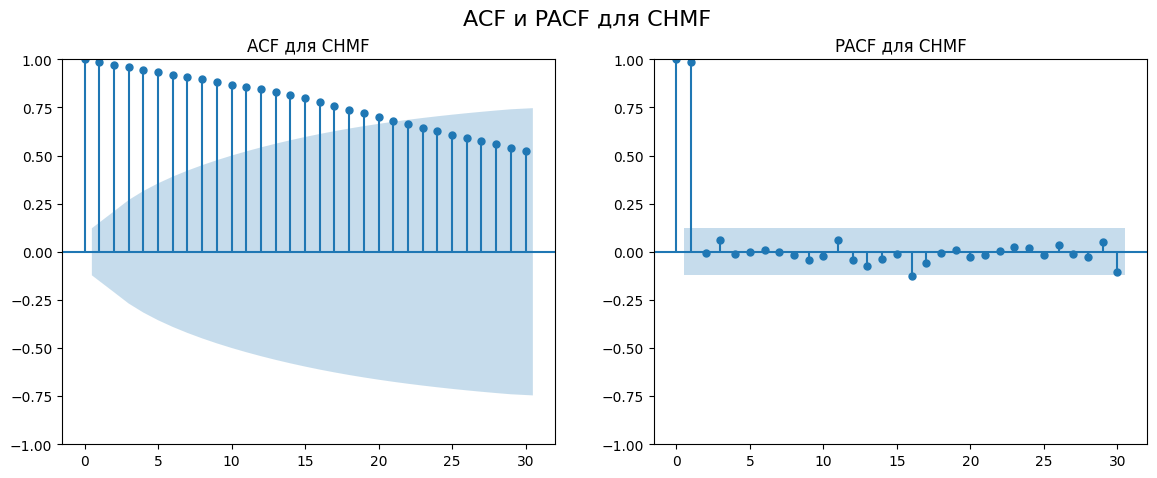

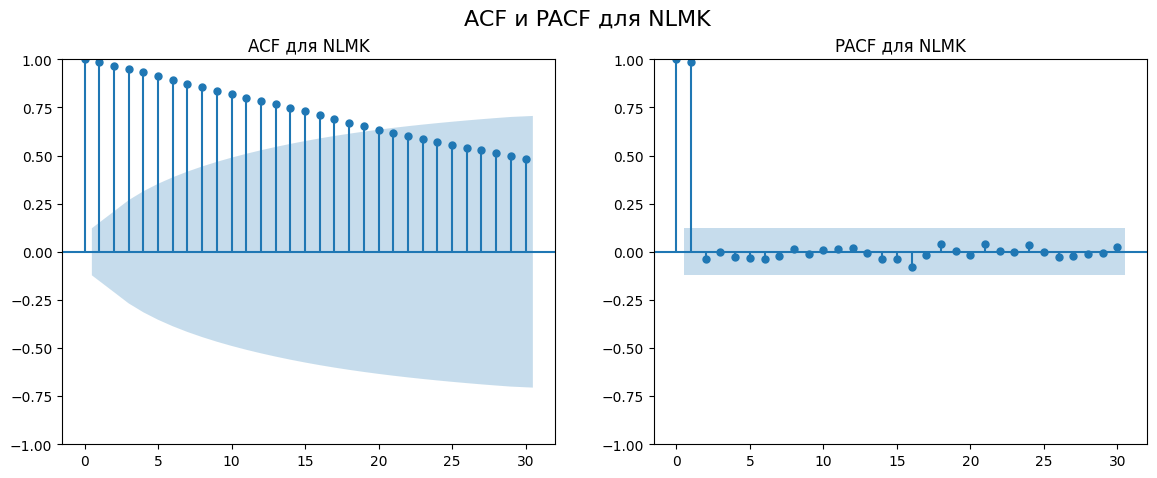

In [67]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

first_tier_tickers = ["SBER", "SBERP", "ROSN", "LKOH", "SIBN", "NVTK",
                      "GAZP", "GMKN", "PLZL", "TATN", "TATNP", "YDEX",
                      "SNGS", "SNGSP", "CHMF", "NLMK"]

plt.rcParams["figure.figsize"] = (10, 6)

for ticker in first_tier_tickers:
    ticker_data = first_tier_close_prices[ticker].dropna()

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f'ACF и PACF для {ticker}', fontsize=16)

    plot_acf(ticker_data, lags=30, ax=axes[0])
    axes[0].set_title(f'ACF для {ticker}')

    plot_pacf(ticker_data, lags=30, ax=axes[1])
    axes[1].set_title(f'PACF для {ticker}')

    plt.show()

In [77]:
from statsmodels.tsa.stattools import acf, pacf

n_lags = 10

acf_pacf_results = pd.DataFrame()

for ticker in first_tier_tickers:
    ticker_data = first_tier_close_prices[ticker].dropna()

    acf_values = acf(ticker_data, nlags=n_lags)
    pacf_values = pacf(ticker_data, nlags=n_lags)

    ticker_acf_pacf = pd.DataFrame({
        'Ticker': ticker,
        'Lag': range(n_lags + 1),
        'ACF': acf_values,
        'PACF': pacf_values
    })

    acf_pacf_results = pd.concat([acf_pacf_results, ticker_acf_pacf], ignore_index=True)

acf_pacf_results.head(44)


Ticker  Lag       ACF      PACF
0    SBER    0  1.000000  1.000000
1    SBER    1  0.977473  0.981291
2    SBER    2  0.954785 -0.017796
3    SBER    3  0.930769 -0.049920
4    SBER    4  0.905465 -0.049728
5    SBER    5  0.883123  0.067766
6    SBER    6  0.859773 -0.040369
7    SBER    7  0.839290  0.061001
8    SBER    8  0.822743  0.092529
9    SBER    9  0.804526 -0.057921
10   SBER   10  0.786255 -0.031571
11  SBERP    0  1.000000  1.000000
12  SBERP    1  0.978244  0.982065
13  SBERP    2  0.955795 -0.032674
14  SBERP    3  0.932011 -0.051187
15  SBERP    4  0.907256 -0.040987
16  SBERP    5  0.885064  0.060990
17  SBERP    6  0.862120 -0.036629
18  SBERP    7  0.841831  0.058845
19  SBERP    8  0.825134  0.086527
20  SBERP    9  0.807246 -0.050208
21  SBERP   10  0.789243 -0.029945
22   ROSN    0  1.000000  1.000000
23   ROSN    1  0.965133  0.968904
24   ROSN    2  0.933973  0.041233
25   ROSN    3  0.905878  0.036063
26   ROSN    4  0.877402 -0.017031
27   ROSN    5  0.851483  0.027583
28   ROSN    6  0.825336 -0.015276
29   ROSN    7  0.801227  0.021943
30   ROSN    8  0.780460  0.044684
31   ROSN    9  0.763469  0.062581
32   ROSN   10  0.746752  0.006758
33   LKOH    0  1.000000  1.000000
34   LKOH    1  0.978072  0.981892
35   LKOH    2  0.957009  0.011197
36   LKOH    3  0.937956  0.044446
37   LKOH    4  0.918168 -0.030123
38   LKOH    5  0.895876 -0.081610
39   LKOH    6  0.874794  0.015182
40   LKOH    7  0.858537  0.120202
41   LKOH    8  0.844227  0.059097
42   LKOH    9  0.830648  0.031893
43   LKOH   10  0.818566  0.032182

**выводы **

Для тикеров (SBER, SBERP,ROSN, LKOH) значения ACF на первых нескольких лагах (от 1 до 5) остаются высокими, но постепенно снижаются.
Значения ACF, близкие к 1 на начальных лагах, указывают на наличие сильной автокорреляции в данных, что характерно для временных рядов с выраженной сезонностью или трендом.

В ряде тикеров, таких как SBER, SBERP, и LKOH, наблюдается медленное убывание значений ACF, что может свидетельствовать о наличии долгосрочного тренда в данных.
Это может потребовать применения дифференцирования данных при моделировании (например  ARIMA), чтобы сделать ряд стационарным.

Для таких тикеров, как SBER, SBERP, и ROSN, наблюдаются отрицательные значения PACF на отдельных лагах (например, на 3 и 4 для SBER), что может указывать на наличие колебательных процессов или инверсию тренда на этих уровнях.

Отрицательные значения PACF показывают, что на определенных лагах существует обратная зависимость от предыдущих значений, что может быть полезным для настройки авторегрессионного порядка в моделях ARIMA.

Для большинства тикеров PACF быстро снижается к нулю уже после первых 2-3 лагов (например, SBER и ROSN).
Это указывает на то, что в модели может быть полезен небольшой авторегрессионный порядок, например, AR(1) или AR(2), где значимые зависимости находятся в пределах первых 1-2 лагов.

Медленное убывание значений ACF на первых лагах, а затем более резкое снижение ближе к 10 лагу, как в случае с LKOH и ROSN, может свидетельствовать о слабой сезонности, хотя это требует дополнительного анализа.
Если присутствуют сезонные эффекты, может понадобиться применение сезонной модели, такой как SARIMA.

**Рекомендации для моделирования:**
* Для большинства тикеров показано использование авторегрессионного порядка 1 или 2:

Поскольку значения PACF быстро уменьшаются, модели с малым авторегрессионным порядком (AR) могут быть подходящими для прогнозирования.
* Дифференцирование для устранения тренда:

Медленное убывание ACF указывает на тренд, который можно скорректировать с помощью первого дифференцирования, если данные будут анализироваться с моделью ARIMA.
* Необходимость стационарности:

Для тикеров, где ACF убывает медленно, предварительное преобразование данных в стационарные (например, путем дифференцирования) может улучшить результаты модели.

# 6. Выводы


1. Общее количество данных и структура
- В вашем наборе данных содержится 63082 записи, что указывает на значительный объем информации. Данные включают следующие колонки: TRADEDATE, OPEN, HIGH, LOW, CLOSE, VOLUME, TICKER. Это позволяет проводить всесторонний анализ временных рядов по акциям.

2. Пропуски в данных
Общее количество пропусков:

- В столбце TRADEDATE — 213 пропусков (33.76%).
- В столбцах OPEN, HIGH, LOW, и CLOSE по 1655 пропусков в каждом (по 2.62%).
- Вывод: Высокий процент пропусков в дате (TRADEDATE) критически важен для временного анализа, так как без дат невозможно корректно агрегировать данные. Пропуски в ценах также могут повлиять на статистические вычисления и модели.

3. Уникальные тикеры
- Набор данных включает 250 уникальных тикеров, что позволяет анализировать разнообразные акции и их поведение на рынке.

4. Основные статистические показатели
- Цены (OPEN, HIGH, LOW, CLOSE):

- Средние значения колеблются от 2343.49 до 2381.42.
- Наблюдаются значительные стандартные отклонения, указывающие на высокую волатильность цен (например, максимальное значение CLOSE — 166850).
- Объем торгов (VOLUME):

- Средний объем торгов составляет около 402,113,700, с максимальным значением до 461,548,200,000.

5. Волатильность акций первого эшелона
- Наибольшая волатильность:

- GMKN (ГМК Норильский Никель) — 7948.53, что указывает на значительные колебания в цене акций.
- PLZL (ПАО Полюс) — 1183.07, также показывает высокую волатильность.
- Низкая волатильность:

- Акции SNGS (Сургутнефтегаз) и SNGSP имеют самую низкую волатильность — 3.07 и 6.82 соответственно, что указывает на более стабильные цены.

6. Корреляция между акциями
- Коэффициенты корреляции показывают, что:

- CHMF и GAZP имеют положительную корреляцию (0.257), что может указывать на некоторую степень зависимости в движениях цен.
- GMKN и NVTK имеют высокую корреляцию с другими тикерами, что может свидетельствовать о том, что их поведение может быть связано с общими рыночными факторами.

7. Выводы
Необходимость дополнительного анализа: Высокая волатильность некоторых акций (особенно GMKN) требует применения более продвинутых методов анализа временных рядов, чтобы учесть выбросы и колебания.
Ликвидность: Акции с высоким объемом торгов (например, SBER) могут быть более привлекательными для краткосрочных инвесторов, в то время как менее ликвидные активы могут представлять интерес для долгосрочных стратегий.
Анализ взаимосвязей: Для глубокого понимания динамики рынка будет полезно провести анализ корреляции между акциями и сравнить результаты с макроэкономическими показателями.
Таким образом, результаты анализа подчеркивают важность мониторинга волатильности и ликвидности акций, а также необходимость учета выбросов и зависимостей при планировании инвестиционных стратегий.